# Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as msno
import sweetviz as sw
import dtale
import scipy.stats as stats
from re import search
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.hashing import HashingEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


import time

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [4]:
def apply_evl(name,model,param_grid,X_train,X_test,y_train,y_test):
    test_metrics_dict={}
    train_metrics_dict={}
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
    from sklearn.model_selection import GridSearchCV
    print(name)
    if param_grid!=None:    
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=4)
        gs=grid_search.fit(X_train,y_train)
        print("--------------------Best Parameters--------------------")
        print(gs.best_params_)
        best_model=gs.best_estimator_
        print()
        print()
        print("--------------------Best Model Params--------------------")
        print(best_model)
        print()
        print()
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    elif param_grid == None:
        best_model=model
        best_model.fit(X_train,y_train)
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    
    print("Train Accuracy Score for model {} is {}".format(model,accuracy_score(y_train,ytrain_predict)))
    print()
    print()
    print("--------------------Classification Report - Train Data--------------------")
    print(classification_report(y_train,ytrain_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Train Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.title('Train Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        
#     train_metrics_dict.update({"Accuracy":accuracy_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Precision":precision_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Recall":recall_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"F1":f1_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"AUC":roc_auc_score(y_train,probs)})
#     train_metrics_df=pd.DataFrame(train_metrics_dict,index=[name+"_Train"]).T

    train_metrics_dict.update({name+"_Train":[accuracy_score(y_train,ytrain_predict),precision_score(y_train,ytrain_predict),
                                                recall_score(y_train,ytrain_predict),f1_score(y_train,ytrain_predict),
                                                roc_auc_score(y_train,probs),fpr_train,tpr_train]})
    train_metrics_df=pd.DataFrame(train_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR',
                                                            'TPR'])
    
    
    print()
    print()
    
    print("Test Accuracy Score for model {} is {}".format(model,accuracy_score(y_test,ytest_predict)))
    print()
    print()
    print("--------------------Classification Report - Test Data--------------------")
    print(classification_report(y_test,ytest_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_test, tpr_test, marker='.')
    plt.title('Test Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
       
    
    test_metrics_dict.update({name+"_Test":[accuracy_score(y_test,ytest_predict),precision_score(y_test,ytest_predict),
                                            recall_score(y_test,ytest_predict),f1_score(y_test,ytest_predict),
                                            roc_auc_score(y_test,probs),fpr_test,tpr_test]})
    test_metrics_df=pd.DataFrame(test_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR','TPR'])
    return pd.concat([train_metrics_df,test_metrics_df],axis=1),best_model

In [5]:
def tweak_threshold(model,X_train,X_test,y_train,y_test,step=0.1):
    
    dict_metrics={"AUC":[],
         "Accuracy":[],
         "Recall":[],
         "Precision":[],
         "F1_Score":[],
                  "Threshold":[],
         "Test/Train":[]}
    pred_prob_train = model.predict_proba(X_train)
    pred_prob_test = model.predict_proba(X_test)  
    #print("--------------- TRAIN DATA-----------------")
    for j in np.arange(0.1,1,step):
        custom_prob = j #defining the cut-off value of our choice
        custom_cutoff_data=[]#defining an empty list
        for i in range(0,len(y_train)):#defining a loop for the length of the test data
            if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
                #greater than the custom cutoff value
                a=1#if the probability values are greater than the custom cutoff then the value should be 1
            else:
                a=0#if the probability values are less than the custom cutoff then the value should be 0
            custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
        #print(round(j,3),'\n')
        #print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
        #print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
        #plt.figure(figsize=(6,4))
        #print('Confusion Matrix')
        #sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt="d"),'\n\n'
        #plt.show()
        
        dict_metrics["AUC"].append(round(metrics.roc_auc_score(y_train,custom_cutoff_data),4))
        dict_metrics["Accuracy"].append(round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
        dict_metrics["Recall"].append(round(metrics.recall_score(y_train,custom_cutoff_data),4))
        dict_metrics["Precision"].append(round(metrics.precision_score(y_train,custom_cutoff_data),4))
        dict_metrics["F1_Score"].append(round(metrics.f1_score(y_train,custom_cutoff_data),4))
        dict_metrics["Threshold"].append(j)
        dict_metrics["Test/Train"].append("Train")
        
    #print("--------------- TEST DATA-----------------")
    for j in np.arange(0.1,1,step):
        custom_prob = j #defining the cut-off value of our choice
        custom_cutoff_data=[]#defining an empty list
        for i in range(0,len(y_test)):#defining a loop for the length of the test data
            if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
                #greater than the custom cutoff value
                a=1#if the probability values are greater than the custom cutoff then the value should be 1
            else:
                a=0#if the probability values are less than the custom cutoff then the value should be 0
            custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
        print(round(j,3),'\n')
        #print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
        #print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
        #plt.figure(figsize=(6,4))
        #print('Confusion Matrix')
        sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='d'),'\n\n'
        plt.show()
        dict_metrics["AUC"].append(round(metrics.roc_auc_score(y_test,custom_cutoff_data),4))
        dict_metrics["Accuracy"].append(round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
        dict_metrics["Recall"].append(round(metrics.recall_score(y_test,custom_cutoff_data),4))
        dict_metrics["Precision"].append(round(metrics.precision_score(y_test,custom_cutoff_data),4))
        dict_metrics["F1_Score"].append(round(metrics.f1_score(y_test,custom_cutoff_data),4))
        dict_metrics["Threshold"].append(j)
        dict_metrics["Test/Train"].append("Test")
    temp_df=pd.DataFrame(dict_metrics)
    return temp_df

In [6]:
df_Linear = pd.read_csv('Cleaned_Data_Linear.csv')
df_Tree = pd.read_csv('Cleaned_Data_Tree.csv')

In [7]:
df_Tree.shape

(22728, 68)

In [8]:
df_Linear = df_Linear.set_index('Customer_ID')
df_Tree = df_Tree.set_index('Customer_ID')

In [9]:
sc = StandardScaler()
df_Linear_sc=sc.fit_transform(df_Linear)


In [10]:
df_Linear_sc.shape

(22728, 177)

In [11]:
X_Linear= df_Linear.drop(['churn'],axis=1)
X_Tree = df_Tree.drop(['churn'],axis=1)
X_Tree

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  \
Customer_ID                                                               
1000010        25.500000        29.99       5.70       83.0   59.500000   
1000012        24.250000        34.98       0.63       39.0   19.750000   
1000019      1212.750000        49.99       5.07      311.0  169.250000   
1000029       608.000000        94.99      33.00      768.0 -563.000000   
1000030        34.500000        29.99       0.54       58.0   32.500000   
...                  ...          ...        ...        ...         ...   
1099911       100.333333        29.99       7.00       71.0   45.666667   
1099933        71.000000        29.99       0.00        0.0    0.000000   
1099955       321.000000        30.00       0.00        0.0    0.000000   
1099986       724.000000        70.00       3.25       77.0  -40.000000   
1099994      1745.000000        84.99      31.88      244.0  122.000000   

             drop_blk_Mean  drop_vce_Range  owylis_vce_Range  mou_opkv_Range  \
Customer_ID                                                                    
1000010           1.000000             0.0               0.0            5.80   
1000012           0.000000             0.0               5.0            1.68   
1000019           8.666667             7.0              61.0          346.16   
1000029           9.000000            17.0              20.0          153.37   
1000030           0.000000             0.0               1.0            0.00   
...                    ...             ...               ...             ...   
1099911           1.333333             2.0              10.0            9.95   
1099933           8.333333             2.0               4.0           46.84   
1099955           0.000000             0.0               0.0            0.00   
1099986          15.333333             5.0              24.0           18.90   
1099994          17.333333             4.0              23.0           54.11   

             months  ...  age2  models  hnd_price  actvsubs  uniqsubs  \
Customer_ID          ...                                                
1000010        57.0  ...    21       1          4         2         1   
1000012        53.0  ...     9       2          4         3         2   
1000019        52.0  ...     0       3          1         1         0   
1000029        56.0  ...     0       2          5         4         4   
1000030        52.0  ...     0       1          3         1         0   
...             ...  ...   ...     ...        ...       ...       ...   
1099911        30.0  ...    18       0          1         1         0   
1099933        31.0  ...     0       1          1         1         0   
1099955        31.0  ...     0       2          0         2         1   
1099986        30.0  ...    22       0          1         1         0   
1099994        29.0  ...    16       1          7         1         0   

             forgntvl  mtrcycle  truck  car_buy  csa  
Customer_ID                                           
1000010             1         0      0        0   49  
1000012             0         0      0        0   53  
1000019             0         0      0        1   49  
1000029             0         0      0        1   49  
1000030             0         0      0        1   53  
...               ...       ...    ...      ...  ...  
1099911             0         0      0        1   49  
1099933             0         0      0        0   49  
1099955             0         0      0        1   49  
1099986             0         0      0        1   49  
1099994             0         0      0        0   49  

[22728 rows x 66 columns]

In [12]:
X_Linear

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  \
Customer_ID                                                               
1000010        25.500000        29.99       5.70       83.0   59.500000   
1000012        24.250000        34.98       0.63       39.0   19.750000   
1000019      1212.750000        49.99       5.07      311.0  169.250000   
1000029       608.000000        94.99      33.00      768.0 -563.000000   
1000030        34.500000        29.99       0.54       58.0   32.500000   
...                  ...          ...        ...        ...         ...   
1099911       100.333333        29.99       7.00       71.0   45.666667   
1099933        71.000000        29.99       0.00        0.0    0.000000   
1099955       321.000000        30.00       0.00        0.0    0.000000   
1099986       724.000000        70.00       3.25       77.0  -40.000000   
1099994      1745.000000        84.99      31.88      244.0  122.000000   

             drop_blk_Mean  drop_vce_Range  owylis_vce_Range  mou_opkv_Range  \
Customer_ID                                                                    
1000010           1.000000             0.0               0.0            5.80   
1000012           0.000000             0.0               5.0            1.68   
1000019           8.666667             7.0              61.0          346.16   
1000029           9.000000            17.0              20.0          153.37   
1000030           0.000000             0.0               1.0            0.00   
...                    ...             ...               ...             ...   
1099911           1.333333             2.0              10.0            9.95   
1099933           8.333333             2.0               4.0           46.84   
1099955           0.000000             0.0               0.0            0.00   
1099986          15.333333             5.0              24.0           18.90   
1099994          17.333333             4.0              23.0           54.11   

             months  ...  csa__PHXPHX602  csa__SANAUS512  csa__SANMCA210  \
Customer_ID          ...                                                   
1000010        57.0  ...               0               0               0   
1000012        53.0  ...               0               0               1   
1000019        52.0  ...               0               0               0   
1000029        56.0  ...               0               0               0   
1000030        52.0  ...               0               0               1   
...             ...  ...             ...             ...             ...   
1099911        30.0  ...               0               0               0   
1099933        31.0  ...               0               0               0   
1099955        31.0  ...               0               0               0   
1099986        30.0  ...               0               0               0   
1099994        29.0  ...               0               0               0   

             csa__SANSAN210  csa__SEASEA206  csa__SFROAK510  csa__SFRSCL408  \
Customer_ID                                                                   
1000010                   0               0               0               0   
1000012                   0               0               0               0   
1000019                   0               0               0               0   
1000029                   0               0               0               0   
1000030                   0               0               0               0   
...                     ...             ...             ...             ...   
1099911                   0               0               0               0   
1099933                   0               0               0               0   
1099955                   0               0               0               0   
1099986                   0               0               0               0   
1099994                   0               0               0   

In [13]:
y_Linear=pd.DataFrame(df_Linear['churn'])
y_Tree = pd.DataFrame(df_Tree['churn'])
y_Tree

churn
Customer_ID       
1000010          0
1000012          0
1000019          0
1000029          1
1000030          0
...            ...
1099911          1
1099933          0
1099955          0
1099986          0
1099994          0

[22728 rows x 1 columns]

In [ ]:
# Compare Algorithms(Add the library)


# prepare configuration for cross validation test harness
seed = 42

# prepare models(add the model)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('XGBoost',XGBClassifier()))
models.append(('ADABoost',AdaBoostClassifier()))
models.append(('SVM',SVC()))

print("Algorithm: Average Accuracy (Average Standard deviation) ")
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    
    if name == 'LR' or name =='LDA' or name == 'KNN'  or name == 'NB' or name == 'SVM' :
        X=X_Linear
        y=y_Linear
    elif name == 'DT' or name == 'Random Forest' or name == 'XGBoost' or name=='ADABoost':
        X=X_Tree
        y=y_Tree
        
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    
    
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)        
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg,"Processing time",":{0:.2f} seconds".format(time.time() - start_time))

# boxplot algorithm comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Train Test Split

## Original Data Sets

In [15]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_Linear, y_Linear, test_size=0.33,
                                                                                random_state=42,stratify=y)

In [16]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_Tree, y_Tree, test_size=0.33,random_state=42,
                                                                       stratify=y)

## Standardized Data Sets

In [17]:
sc = StandardScaler()
X_train_linear_sc = sc.fit_transform(X_train_linear)
X_test_linear_sc = sc.transform(X_test_linear)

y_train_linear_sc=y_train_linear.copy()
y_test_linear_sc=y_test_linear.copy()

In [18]:
sc = StandardScaler()
X_train_tree_sc = sc.fit_transform(X_train_tree)
X_test_tree_sc = sc.transform(X_test_tree)

y_train_tree_sc=y_train_tree.copy()
y_test_tree_sc=y_test_tree.copy()

## Smote Data Sets

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [20]:
X_train_linear_smote, y_train_linear_smote = sm.fit_sample(X_train_linear, np.array(y_train_linear).ravel())
X_train_tree_smote, y_train_tree_smote = sm.fit_sample(X_train_tree, np.array(y_train_tree).ravel())

In [21]:
X_test_linear_smote=X_test_linear.copy()
y_test_linear_smote=y_test_linear.copy()

X_test_tree_smote=X_test_tree.copy()
y_test_tree_smote=y_test_tree.copy()

## Standardized SMOTE

In [22]:
sc = StandardScaler()
X_train_linear_smote_sc = sc.fit_transform(X_train_linear_sc)
X_test_linear_smote_sc = sc.transform(X_test_linear_sc)

y_train_linear_smote_sc=y_train_linear_sc.copy()
y_test_linear_smote_sc=y_test_linear_sc.copy()

In [23]:
sc = StandardScaler()
X_train_tree_smote_sc = sc.fit_transform(X_train_tree_sc)
X_test_tree_smote_sc = sc.transform(X_test_tree_sc)

y_train_tree_smote_sc=y_train_tree_sc.copy()
y_test_tree_smote_sc=y_test_tree_sc.copy()

# Logit - Linear Unscaled

In [142]:
param_grid={#'penalty':['l1','l2', 'elasticnet', 'none'],
      #'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001],#,0.00000001],
      'max_iter':[100,200],#,300],
               'random_state':[0]}#,1,21,23]}

Logit_Linear_Unscaled
--------------------Best Parameters--------------------
{'max_iter': 100, 'random_state': 0, 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.7599658501346293


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11578
           1       0.46      0.01      0.02      3649

    accuracy                           0.76     15227
   macro avg       0.61      0.50      0.44     15227
weighted avg       0.69      0.76      0.66     15227

------------------------------------------------------------




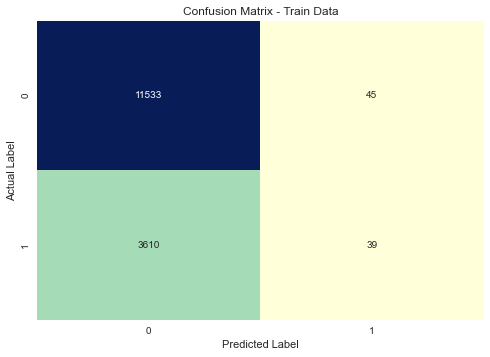



------------------------------------------------------------
AUC: 0.582


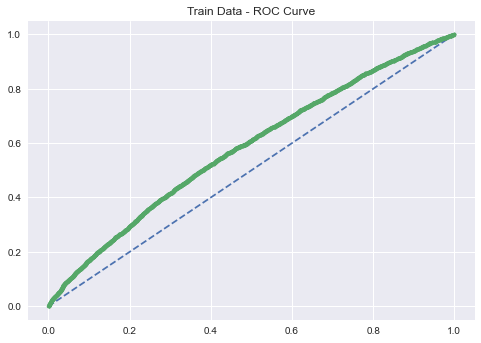



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.7602986268497534


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5704
           1       0.49      0.01      0.02      1797

    accuracy                           0.76      7501
   macro avg       0.62      0.50      0.44      7501
weighted avg       0.70      0.76      0.66      7501

------------------------------------------------------------




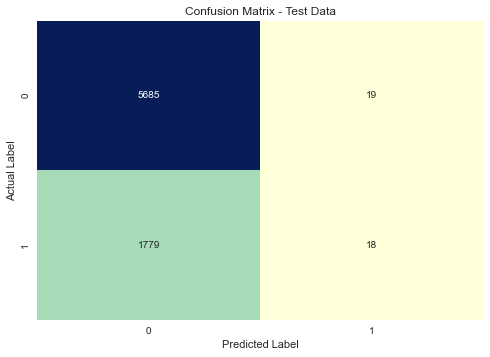



------------------------------------------------------------
AUC: 0.570


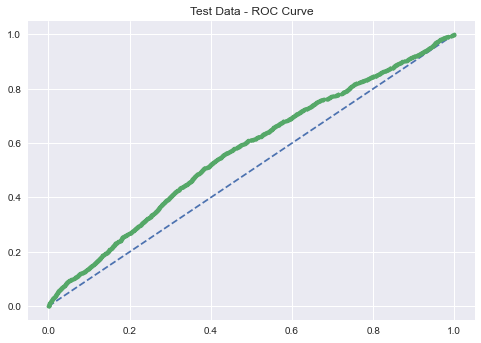



------------------------------------------------------------


In [143]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
df_metrics_logit_linear_unscaled,best_model_logit_linear_unscaled=apply_evl("Logit_Linear_Unscaled",lr,
                                                              param_grid,
                                     X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [145]:
df_metrics_logit_linear_unscaled

Logit_Linear_Unscaled_Train  \
Accuracy                                            0.759966   
Precision                                           0.464286   
Recall                                             0.0106879   
F1                                                 0.0208947   
AUC                                                 0.582134   
FPR        [0.0, 8.637070305752289e-05, 8.637070305752289...   
TPR        [0.0, 0.0, 0.000822143052891203, 0.00082214305...   

                                  Logit_Linear_Unscaled_Test  
Accuracy                                            0.760299  
Precision                                           0.486486  
Recall                                             0.0100167  
F1                                                 0.0196292  
AUC                                                 0.569646  
FPR        [0.0, 0.0, 0.0003506311360448808, 0.0003506311...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



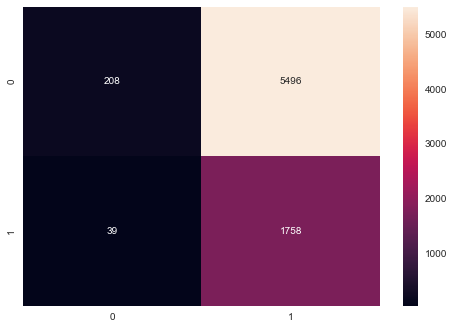

0.2 



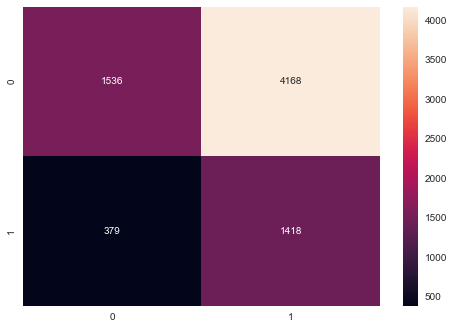

0.3 



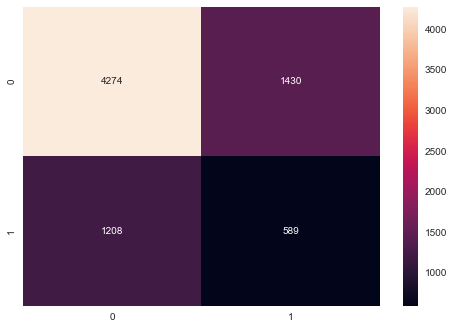

0.4 



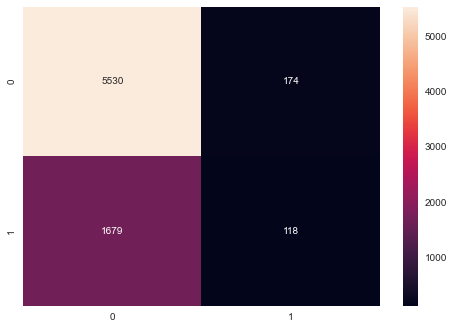

0.5 



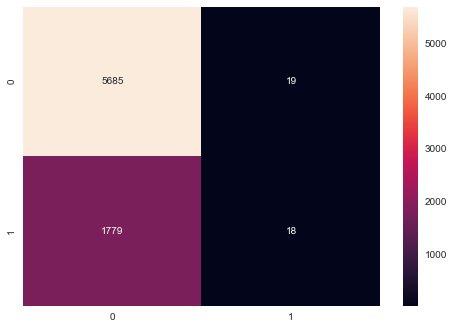

0.6 



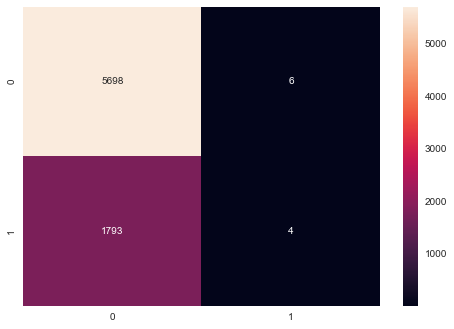

0.7 



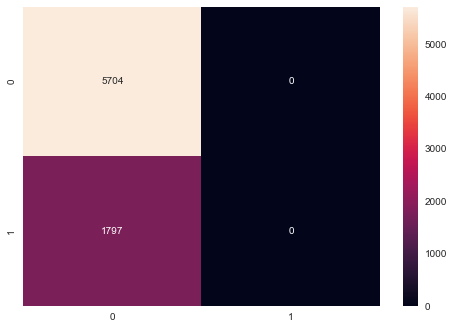

0.8 



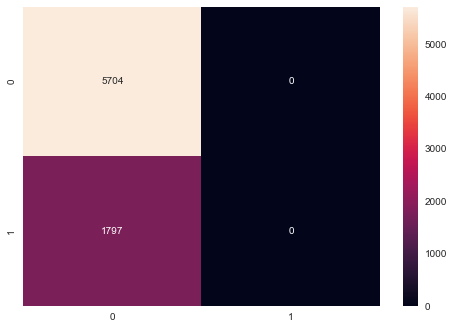

0.9 



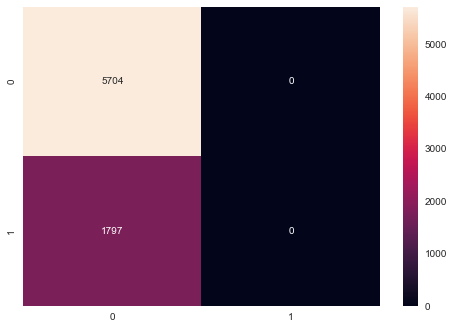

In [214]:
df_tweak_logit_linear_unscaled = tweak_threshold(best_model_logit_linear_unscaled,X_train_linear,X_test_linear,
                                                 y_train_linear,y_test_linear)

In [215]:
df_tweak_logit_linear_unscaled[df_tweak_logit_linear_unscaled['Test/Train']=='Test']

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5074    0.2621  0.9783     0.2423    0.3885        0.1       Test
10  0.5292    0.3938  0.7891     0.2538    0.3841        0.2       Test
11  0.5385    0.6483  0.3278     0.2917    0.3087        0.3       Test
12  0.5176    0.7530  0.0657     0.4041    0.1130        0.4       Test
13  0.5033    0.7603  0.0100     0.4865    0.0196        0.5       Test
14  0.5006    0.7602  0.0022     0.4000    0.0044        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# Logit - Linear Scaled

Logit_Linear_scaled
--------------------Best Parameters--------------------
{'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


Train Accuracy Score for model LogisticRegression() is 0.7593747947724437


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     11578
           1       0.47      0.03      0.06      3649

    accuracy                           0.76     15227
   macro avg       0.62      0.51      0.46     15227
weighted avg       0.69      0.76      0.67     15227

------------------------------------------------------------




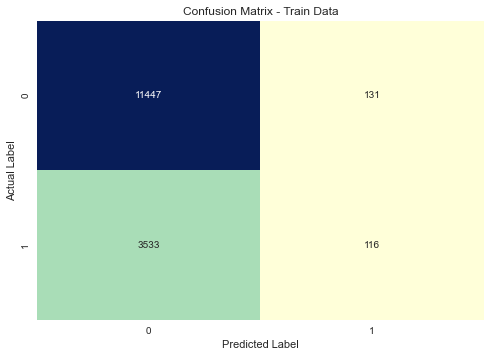



------------------------------------------------------------
AUC: 0.659


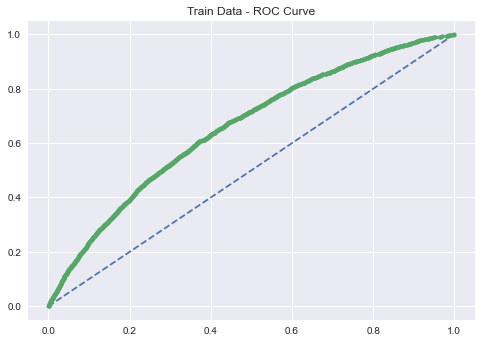



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.7613651513131583


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5704
           1       0.54      0.03      0.05      1797

    accuracy                           0.76      7501
   macro avg       0.65      0.51      0.46      7501
weighted avg       0.71      0.76      0.67      7501

------------------------------------------------------------




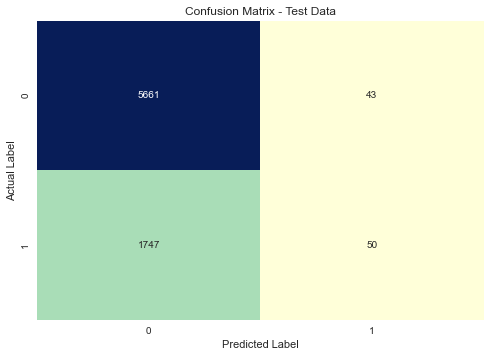



------------------------------------------------------------
AUC: 0.614


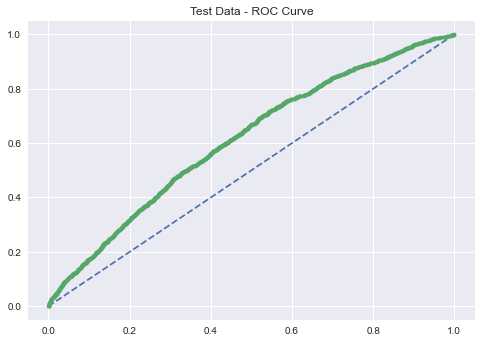



------------------------------------------------------------


In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
df_metrics_logit_linear_scaled,best_model_logit_linear_scaled=apply_evl("Logit_Linear_scaled",lr,
                                                              param_grid,
                                     X_train_linear_sc,X_test_linear_sc,y_train_linear_sc,y_test_linear_sc)

In [146]:
df_metrics_logit_linear_scaled

Logit_Linear_scaled_Train  \
Accuracy                                            0.759375   
Precision                                           0.469636   
Recall                                             0.0317895   
F1                                                 0.0595483   
AUC                                                 0.658624   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.000822143052891...   

                                    Logit_Linear_scaled_Test  
Accuracy                                            0.761365  
Precision                                           0.537634  
Recall                                             0.0278242  
F1                                                 0.0529101  
AUC                                                 0.614036  
FPR        [0.0, 0.0001753155680224404, 0.000350631136044...  
TPR        [0.0, 0.0, 0.0, 0.0011129660545353367, 0.00111...

## Tweaking Threshold

0.1 



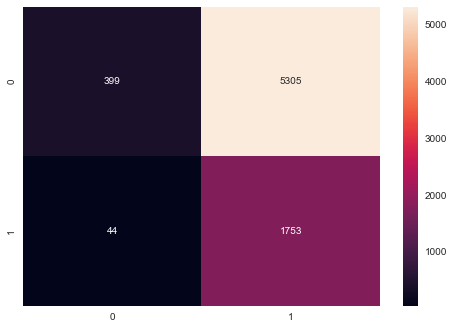

0.2 



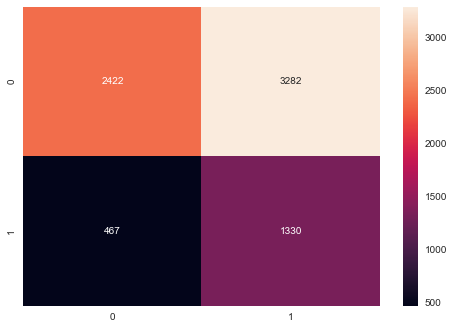

0.3 



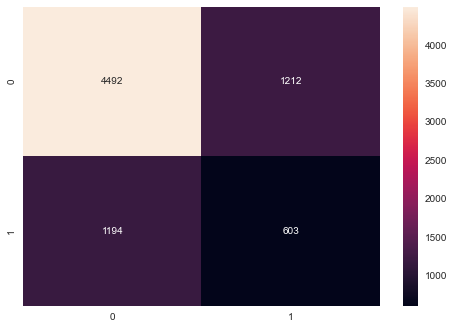

0.4 



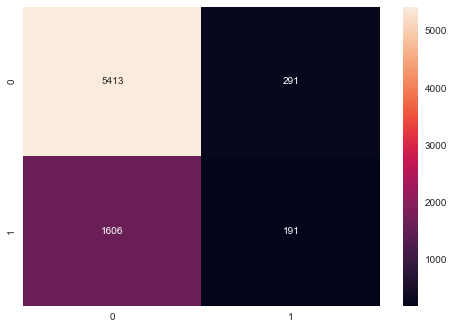

0.5 



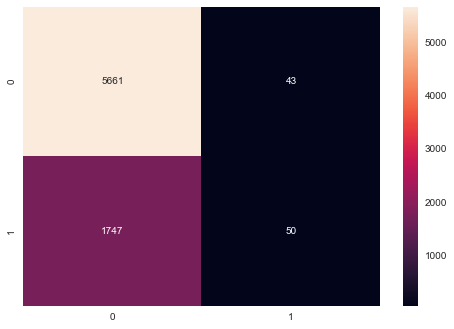

0.6 



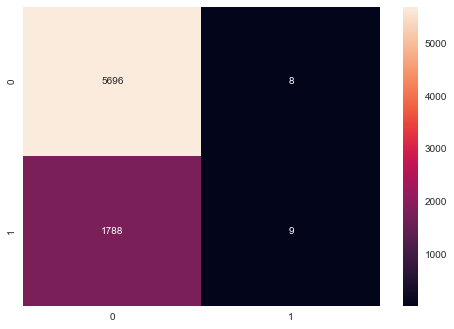

0.7 



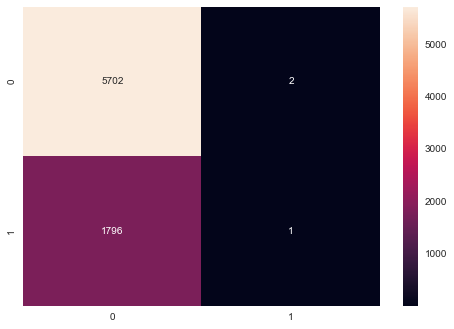

0.8 



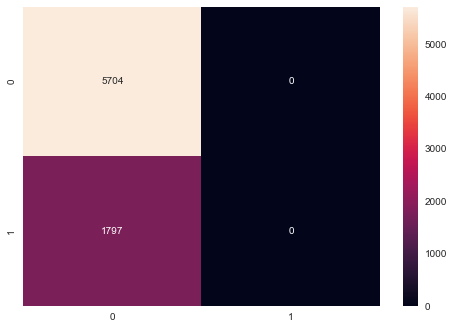

0.9 



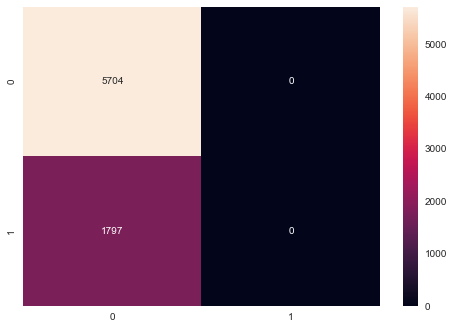

In [216]:
df_tweak_logit_linear_scaled = tweak_threshold(best_model_logit_linear_scaled,X_train_linear_sc,X_test_linear_sc,
                                               y_train_linear_sc,y_test_linear_sc)

In [218]:
df_tweak_logit_linear_scaled[df_tweak_logit_linear_scaled['Test/Train']=='Test']

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5227    0.2869  0.9755     0.2484    0.3959        0.1       Test
10  0.5824    0.5002  0.7401     0.2884    0.4150        0.2       Test
11  0.5615    0.6792  0.3356     0.3322    0.3339        0.3       Test
12  0.5276    0.7471  0.1063     0.3963    0.1676        0.4       Test
13  0.5101    0.7614  0.0278     0.5376    0.0529        0.5       Test
14  0.5018    0.7606  0.0050     0.5294    0.0099        0.6       Test
15  0.5001    0.7603  0.0006     0.3333    0.0011        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# Logit - Linear SMOTE Unscaled

Logit_Linear_SMOTE_Unscaled
--------------------Best Parameters--------------------
{'max_iter': 200, 'random_state': 0, 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=200, random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.6029106926930385


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.61      0.58      0.60     11578
           1       0.60      0.62      0.61     11578

    accuracy                           0.60     23156
   macro avg       0.60      0.60      0.60     23156
weighted avg       0.60      0.60      0.60     23156

------------------------------------------------------------




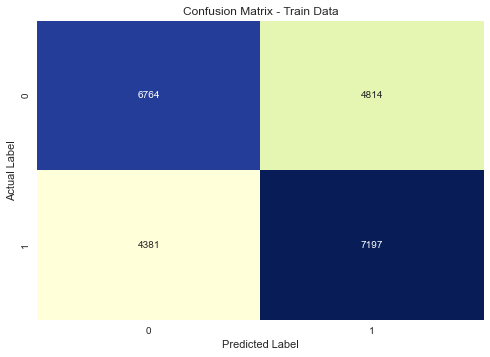



------------------------------------------------------------
AUC: 0.635


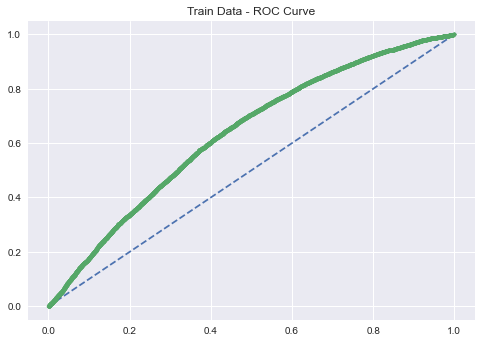



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.5792560991867751


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.58      0.68      5704
           1       0.30      0.57      0.39      1797

    accuracy                           0.58      7501
   macro avg       0.56      0.58      0.54      7501
weighted avg       0.69      0.58      0.61      7501

------------------------------------------------------------




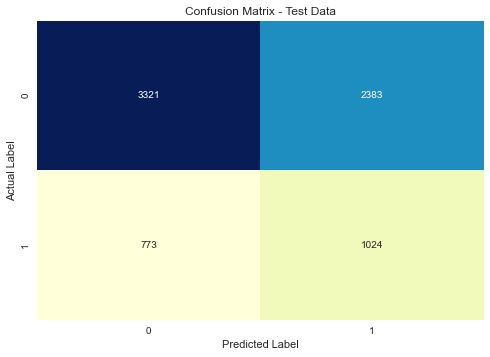



------------------------------------------------------------
AUC: 0.605


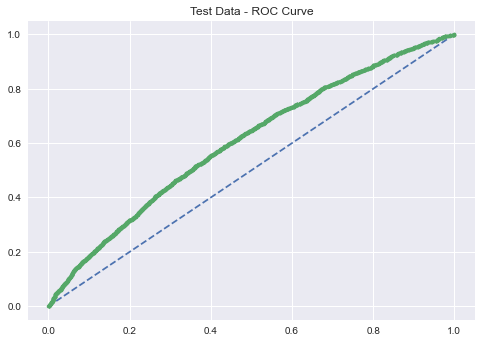



------------------------------------------------------------


In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
df_metrics_logit_linear_smote_unscaled,best_model_logit_linear_smote_unscaled=apply_evl("Logit_Linear_SMOTE_Unscaled",lr,
                                                              param_grid,
                                     X_train_linear_smote,X_test_linear_smote,y_train_linear_smote,y_test_linear_smote)

In [147]:
df_metrics_logit_linear_smote_unscaled

Logit_Linear_SMOTE_Unscaled_Train  \
Accuracy                                            0.602911   
Precision                                           0.599201   
Recall                                               0.62161   
F1                                                    0.6102   
AUC                                                 0.635371   
FPR        [0.0, 8.637070305752289e-05, 8.637070305752289...   
TPR        [0.0, 0.0, 8.637070305752289e-05, 8.6370703057...   

                            Logit_Linear_SMOTE_Unscaled_Test  
Accuracy                                            0.579256  
Precision                                           0.300558  
Recall                                              0.569839  
F1                                                  0.393543  
AUC                                                 0.604523  
FPR        [0.0, 0.0001753155680224404, 0.000701262272089...  
TPR        [0.0, 0.0, 0.0, 0.0005564830272676684, 0.00055...

## Tweaking threshold

0.1 



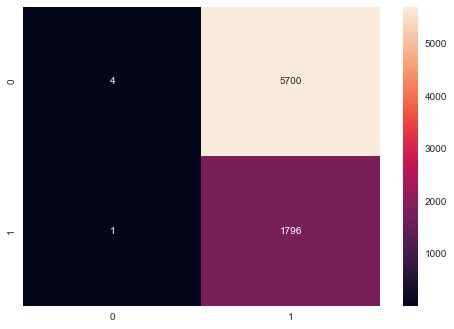

0.2 



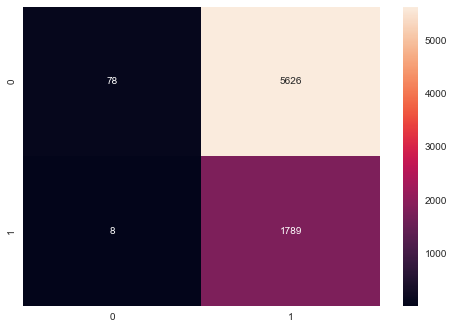

0.3 



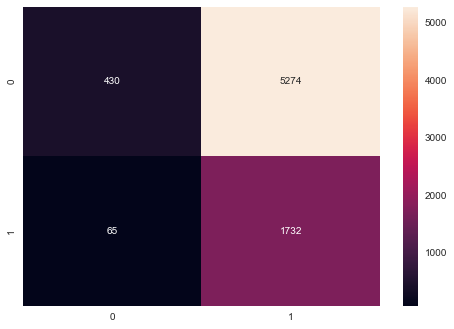

0.4 



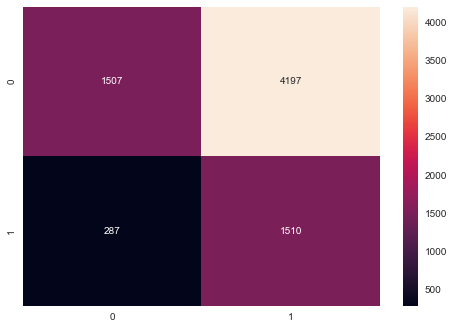

0.5 



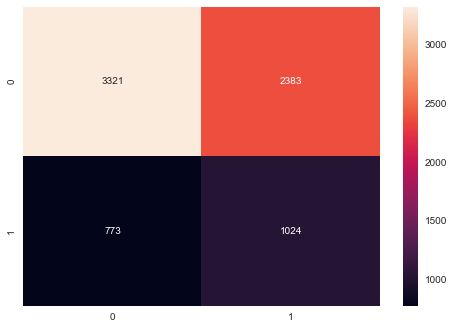

0.6 



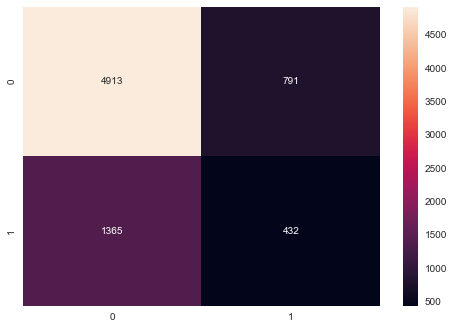

0.7 



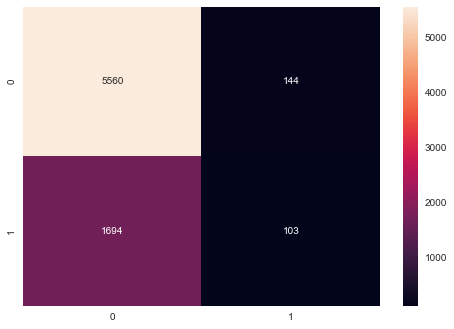

0.8 



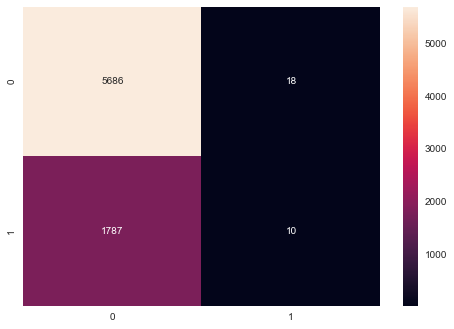

0.9 



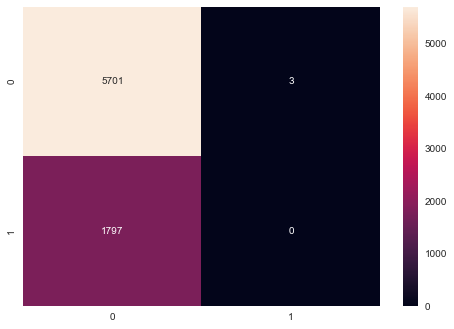

In [219]:
df_tweak_logit_linear_smote_unscaled = tweak_threshold(best_model_logit_linear_smote_unscaled,X_train_linear_smote,X_test_linear_smote,
               y_train_linear_smote,y_test_linear_smote)

In [220]:
df_tweak_logit_linear_smote_unscaled[df_tweak_logit_linear_smote_unscaled['Test/Train']=='Test']

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5001    0.2400  0.9994     0.2396    0.3865        0.1       Test
10  0.5046    0.2489  0.9955     0.2413    0.3884        0.2       Test
11  0.5196    0.2882  0.9638     0.2472    0.3935        0.3       Test
12  0.5522    0.4022  0.8403     0.2646    0.4025        0.4       Test
13  0.5760    0.5793  0.5698     0.3006    0.3935        0.5       Test
14  0.5509    0.7126  0.2404     0.3532    0.2861        0.6       Test
15  0.5160    0.7550  0.0573     0.4170    0.1008        0.7       Test
16  0.5012    0.7594  0.0056     0.3571    0.0110        0.8       Test
17  0.4997    0.7600  0.0000     0.0000    0.0000        0.9       Test

# Logit  - Linear SMOTE Scaled

Logit_Linear_SMOTE_Scaled
--------------------Best Parameters--------------------
{'max_iter': 100, 'random_state': 0, 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.7590464306823406


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     11578
           1       0.46      0.03      0.06      3649

    accuracy                           0.76     15227
   macro avg       0.61      0.51      0.46     15227
weighted avg       0.69      0.76      0.67     15227

------------------------------------------------------------




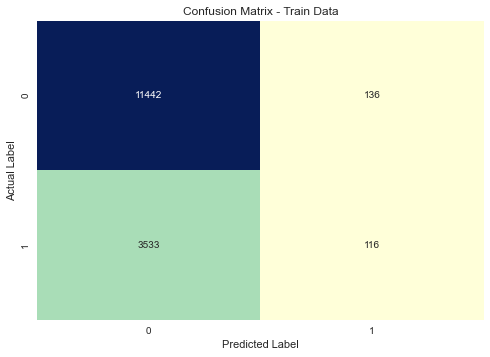



------------------------------------------------------------
AUC: 0.659


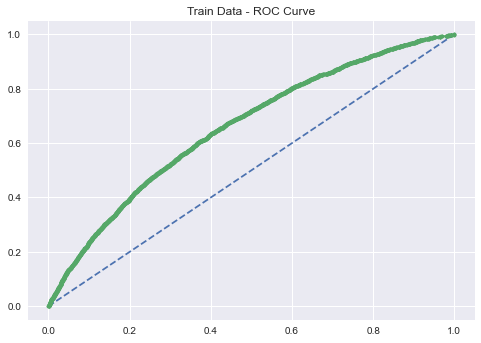



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.7610985201973071


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5704
           1       0.53      0.03      0.05      1797

    accuracy                           0.76      7501
   macro avg       0.64      0.51      0.46      7501
weighted avg       0.71      0.76      0.67      7501

------------------------------------------------------------




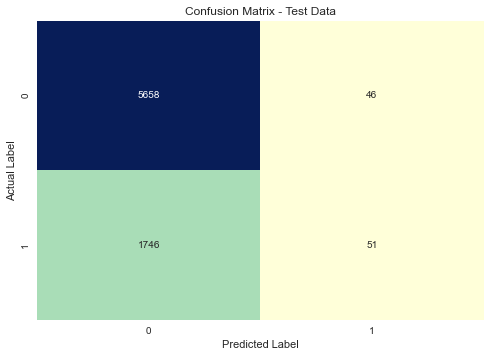



------------------------------------------------------------
AUC: 0.614


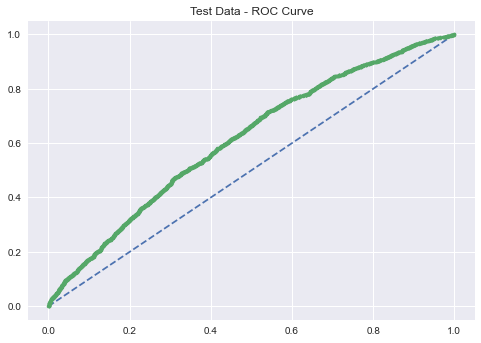



------------------------------------------------------------


In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
df_metrics_logit_linear_smote_scaled,best_model_logit_linear_smote_scaled=apply_evl("Logit_Linear_SMOTE_Scaled",lr,
                                                              param_grid,
                                     X_train_linear_smote_sc,X_test_linear_smote_sc,y_train_linear_smote_sc,
                                                                                    y_test_linear_smote_sc)

In [99]:
df_metrics_logit_linear_smote_scaled

Logit_Linear_SMOTE_Scaled_Train  \
Accuracy                                            0.759046   
Precision                                           0.460317   
Recall                                             0.0317895   
F1                                                 0.0594719   
AUC                                                 0.658641   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.000822143052891...   

                              Logit_Linear_SMOTE_Scaled_Test  
Accuracy                                            0.761099  
Precision                                           0.525773  
Recall                                             0.0283806  
F1                                                 0.0538543  
AUC                                                 0.613638  
FPR        [0.0, 0.0001753155680224404, 0.000350631136044...  
TPR        [0.0, 0.0, 0.0, 0.001669449081803005, 0.001669...

## Tweaking Threshold

0.1 



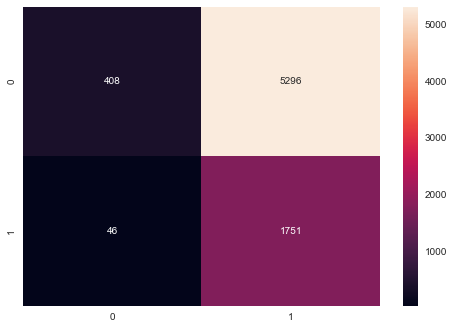

0.2 



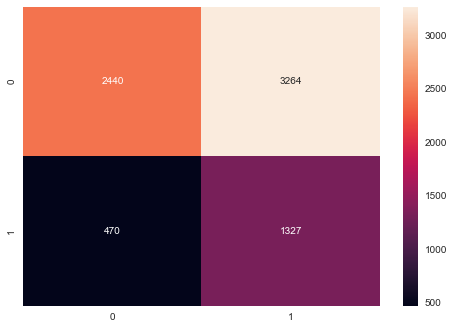

0.3 



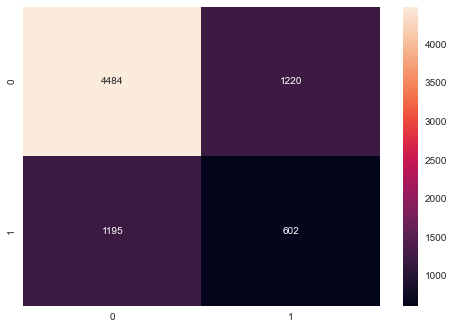

0.4 



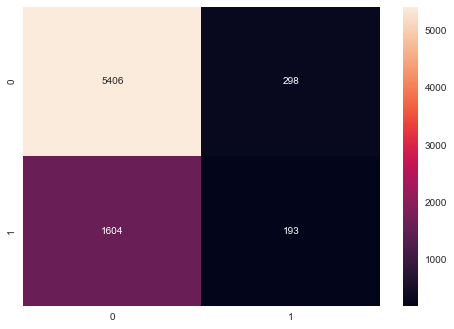

0.5 



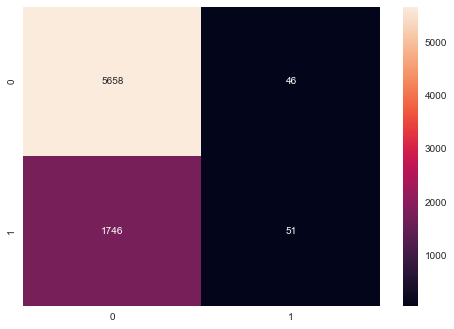

0.6 



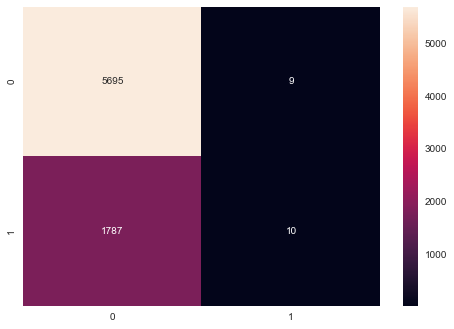

0.7 



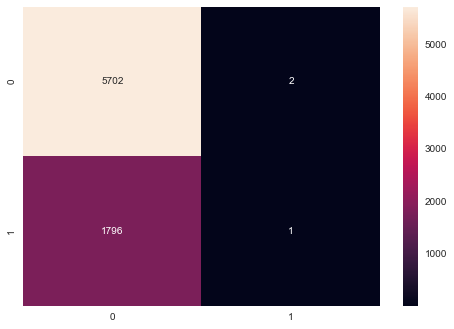

0.8 



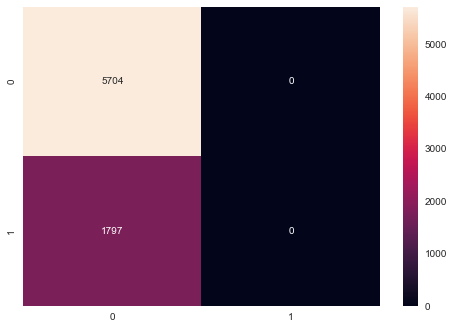

0.9 



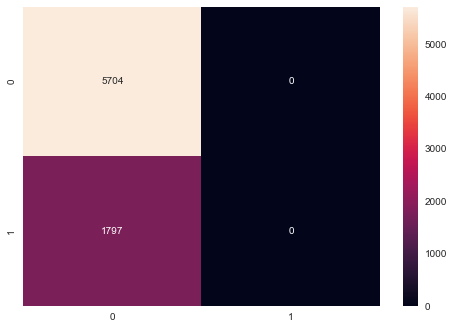

In [221]:
df_tweak_logit_linear_smote_scaled = tweak_threshold(best_model_logit_linear_smote_scaled,X_train_linear_smote_sc,
                                                     X_test_linear_smote_sc,y_train_linear_smote_sc,y_test_linear_smote_sc)

In [224]:
df_tweak_logit_linear_smote_scaled[df_tweak_logit_linear_smote_scaled['Test/Train']=='Test']

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5230    0.2878  0.9744     0.2485    0.3960        0.1       Test
10  0.5831    0.5022  0.7385     0.2890    0.4155        0.2       Test
11  0.5606    0.6780  0.3350     0.3304    0.3327        0.3       Test
12  0.5276    0.7464  0.1074     0.3931    0.1687        0.4       Test
13  0.5102    0.7611  0.0284     0.5258    0.0539        0.5       Test
14  0.5020    0.7606  0.0056     0.5263    0.0110        0.6       Test
15  0.5001    0.7603  0.0006     0.3333    0.0011        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# KNN - Tree Scaled

In [100]:
param_grid_knn = {'n_neighbors': [5, 50, 100, 200, 250, 300],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [2, 3, 4, 5, 6, 7, 8, 10],
              'metric': ['minkowski'],
             }

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
df_metrics_KNN_tree_scaled,best_model_knn=apply_evl("KNN_Tree_Scaled",knn_model,param_grid_knn,
                                             X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

KNN_Tree_Scaled


KeyboardInterrupt: 

In [ ]:
df_metrics_KNN_tree_scaled

# KNN - Tree SMOTE Scaled

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
df_metrics_KNN_tree_smote_scaled,best_model_tree_smote_knn=apply_evl("KNN_Tree_SMOTE_Scaled",knn_model,param_grid_knn,
                                             X_train_tree_smote_sc,X_test_tree_smote_sc,y_train_tree_smote_sc,
                                                                     y_test_tree_smote_sc)

In [ ]:
df_metrics_KNN_tree_smote_scaled

# Gaussian Navie Bayes - Linear Unscaled - best so far

NB_Linear_Unscaled
Train Accuracy Score for model GaussianNB() is 0.547251592565837


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.52      0.64     11578
           1       0.29      0.62      0.40      3649

    accuracy                           0.55     15227
   macro avg       0.55      0.57      0.52     15227
weighted avg       0.69      0.55      0.58     15227

------------------------------------------------------------




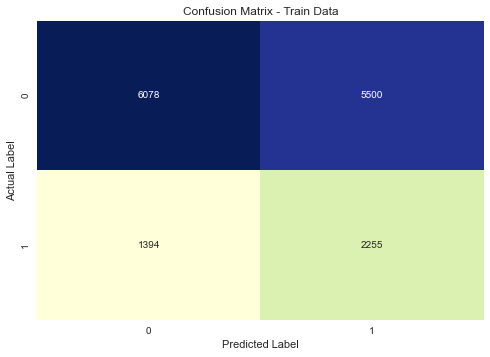



------------------------------------------------------------
AUC: 0.599


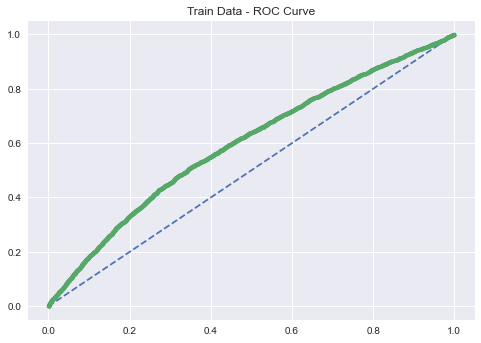



------------------------------------------------------------


Test Accuracy Score for model GaussianNB() is 0.5460605252632982


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.52      0.64      5704
           1       0.29      0.62      0.39      1797

    accuracy                           0.55      7501
   macro avg       0.55      0.57      0.52      7501
weighted avg       0.69      0.55      0.58      7501

------------------------------------------------------------




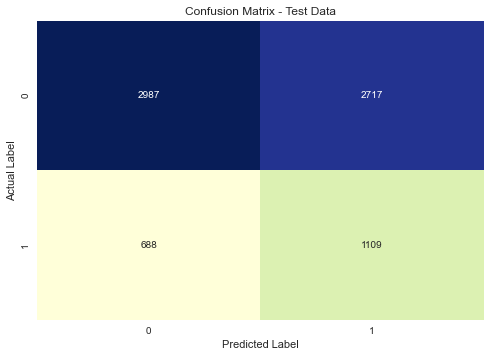



------------------------------------------------------------
AUC: 0.587


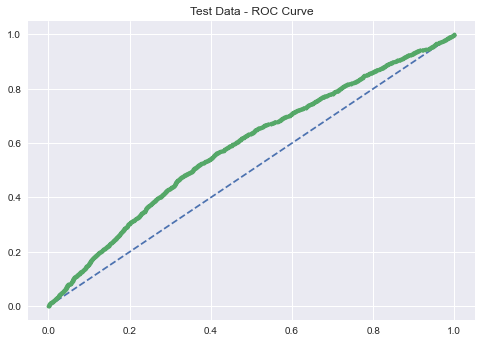



------------------------------------------------------------


In [181]:
from sklearn.linear_model import LogisticRegression
nb=GaussianNB()
df_metrics_NB_linear_unscaled,best_model_NB_linear_unscaled=apply_evl("NB_Linear_Unscaled",nb,
                                                              None,
                                     X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [182]:
df_metrics_NB_linear_unscaled

NB_Linear_Unscaled_Train  \
Accuracy                                            0.547252   
Precision                                            0.29078   
Recall                                              0.617978   
F1                                                  0.395475   
AUC                                                 0.599233   
FPR        [0.0, 0.0, 8.637070305752289e-05, 8.6370703057...   
TPR        [0.0, 0.0002740476842970677, 0.000274047684297...   

                                     NB_Linear_Unscaled_Test  
Accuracy                                            0.546061  
Precision                                           0.289859  
Recall                                               0.61714  
F1                                                  0.394451  
AUC                                                 0.586783  
FPR        [0.0, 0.0, 0.0001753155680224404, 0.0001753155...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



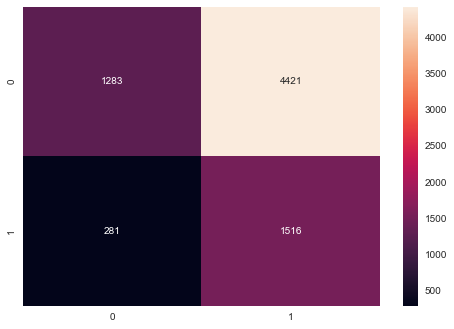

0.2 



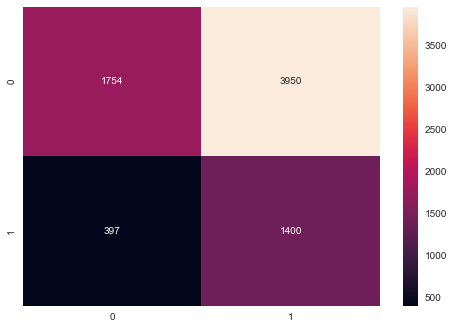

0.3 



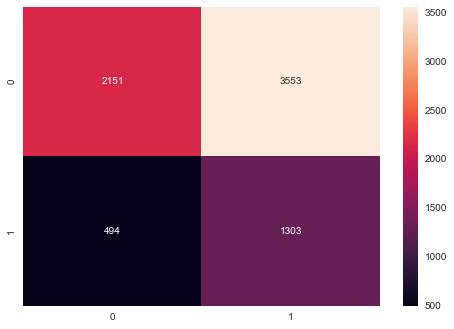

0.4 



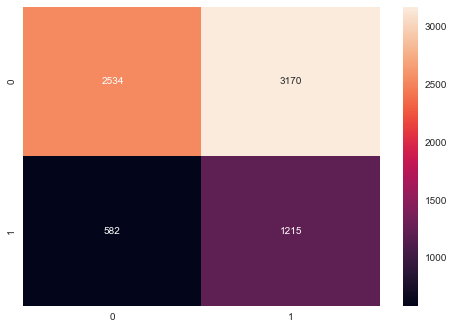

0.5 



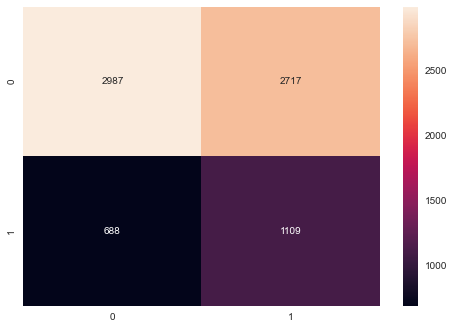

0.6 



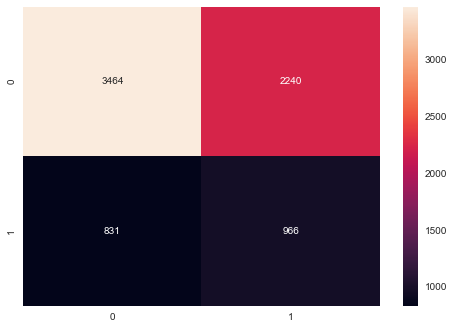

0.7 



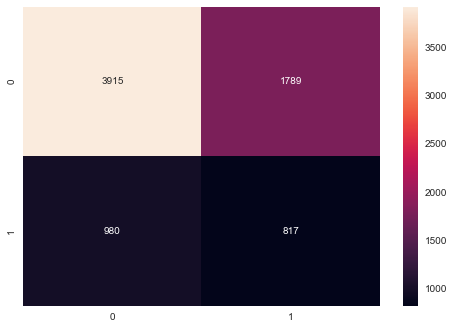

0.8 



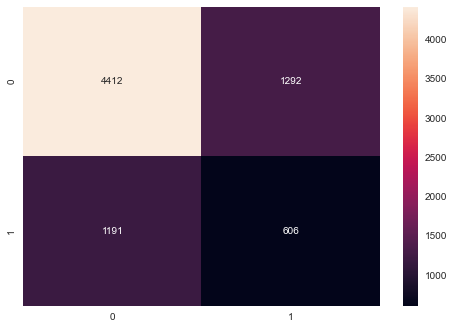

0.9 



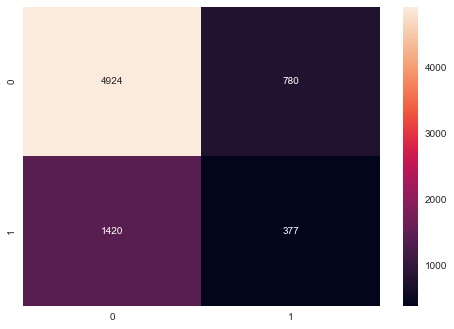

In [225]:
df_tweak_NB_linear_unscaled = tweak_threshold(best_model_NB_linear_unscaled,X_train_linear,X_test_linear,y_train_linear,y_test_linear,step=0.1)

In [226]:
df_tweak_NB_linear_unscaled[df_tweak_NB_linear_unscaled['Test/Train']=='Test'].head(50)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5343    0.3732  0.8436     0.2553    0.3920        0.1       Test
10  0.5433    0.4205  0.7791     0.2617    0.3918        0.2       Test
11  0.5511    0.4605  0.7251     0.2683    0.3917        0.3       Test
12  0.5602    0.4998  0.6761     0.2771    0.3931        0.4       Test
13  0.5704    0.5461  0.6171     0.2899    0.3945        0.5       Test
14  0.5724    0.5906  0.5376     0.3013    0.3862        0.6       Test
15  0.5705    0.6308  0.4546     0.3135    0.3711        0.7       Test
16  0.5554    0.6690  0.3372     0.3193    0.3280        0.8       Test
17  0.5365    0.7067  0.2098     0.3258    0.2552        0.9       Test

# Gaussian Navie Bayes - Linear Scaled

NB_Linear_Scaled
Train Accuracy Score for model GaussianNB() is 0.5160570040060419


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.48      0.60     11578
           1       0.28      0.64      0.39      3649

    accuracy                           0.52     15227
   macro avg       0.54      0.56      0.49     15227
weighted avg       0.68      0.52      0.55     15227

------------------------------------------------------------




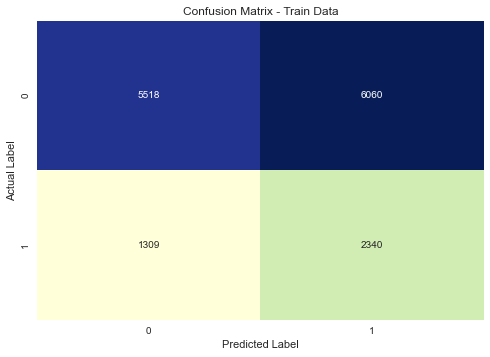



------------------------------------------------------------
AUC: 0.580


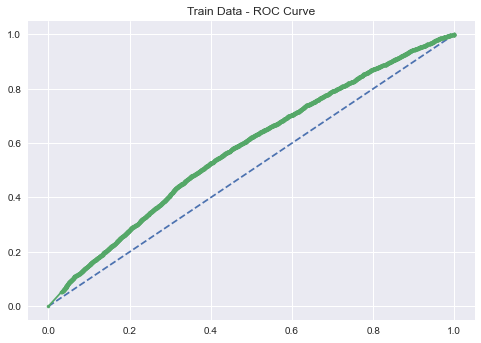



------------------------------------------------------------


Test Accuracy Score for model GaussianNB() is 0.511265164644714


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.48      0.60      5704
           1       0.27      0.61      0.38      1797

    accuracy                           0.51      7501
   macro avg       0.53      0.55      0.49      7501
weighted avg       0.67      0.51      0.55      7501

------------------------------------------------------------




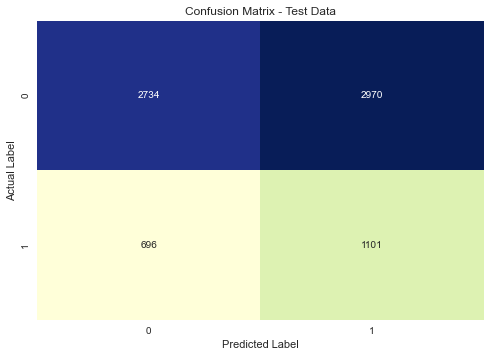



------------------------------------------------------------
AUC: 0.551


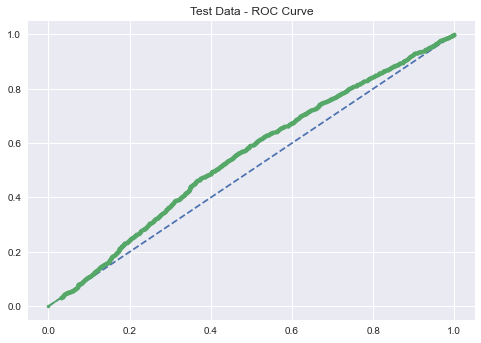



------------------------------------------------------------


In [177]:
from sklearn.linear_model import LogisticRegression
nb=GaussianNB()
df_metrics_NB_linear_scaled,best_model_NB_linear_scaled=apply_evl("NB_Linear_Scaled",nb,
                                                              None,
                                     X_train_linear_sc,X_test_linear_sc,y_train_linear_sc,y_test_linear_sc)

In [178]:
df_metrics_NB_linear_scaled

NB_Linear_Scaled_Train  \
Accuracy                                            0.516057   
Precision                                           0.278571   
Recall                                              0.641272   
F1                                                  0.388414   
AUC                                                 0.579956   
FPR        [0.0, 0.03126619450682329, 0.03152530661599585...   
TPR        [0.0, 0.05152096464784873, 0.05179501233214579...   

                                       NB_Linear_Scaled_Test  
Accuracy                                            0.511265  
Precision                                            0.27045  
Recall                                              0.612688  
F1                                                  0.375256  
AUC                                                 0.551299  
FPR        [0.0, 0.030329593267882187, 0.0306802244039270...  
TPR        [0.0, 0.031163049526989426, 0.0317195325542570...

## Tweaking Threshold

0.1 



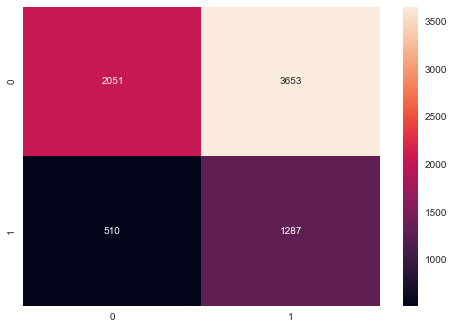

0.2 



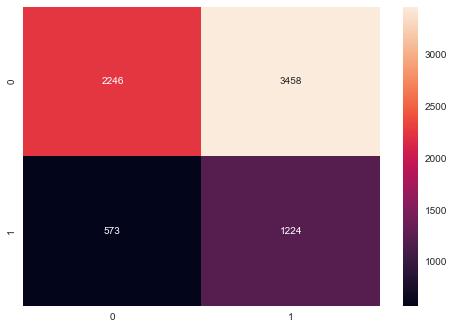

0.3 



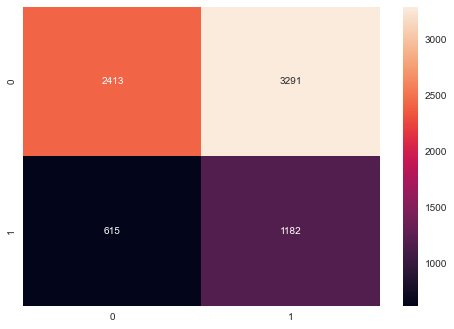

0.4 



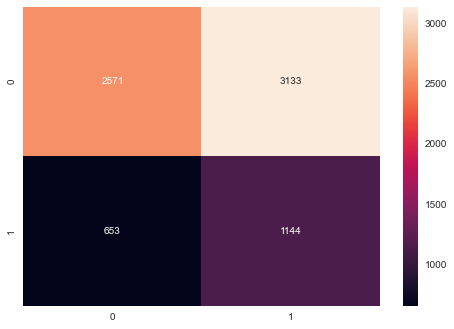

0.5 



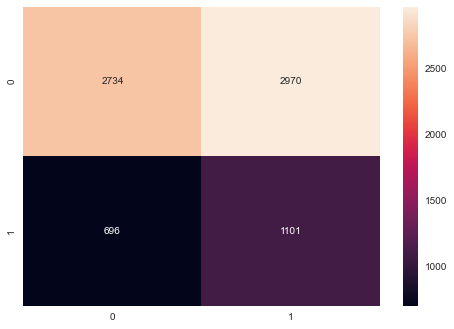

0.6 



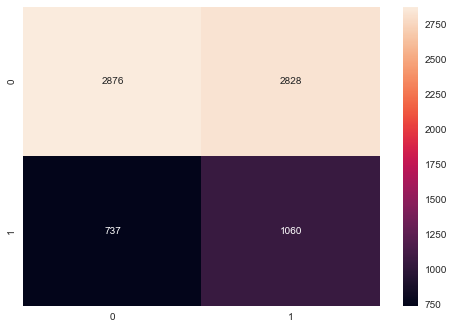

0.7 



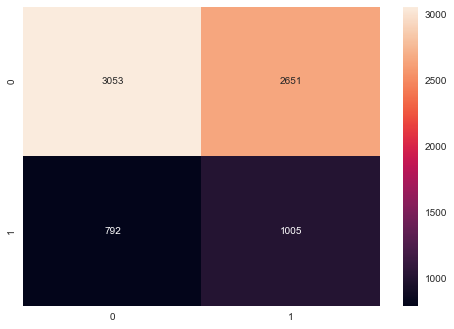

0.8 



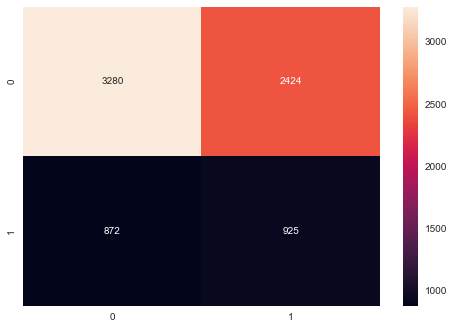

0.9 



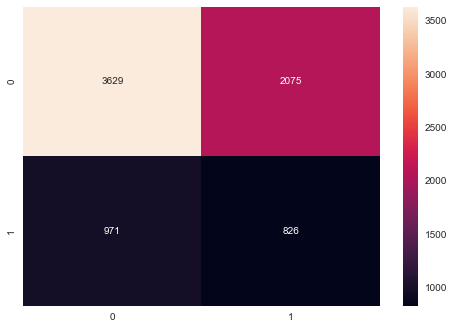

In [230]:
df_tweak_NB_linear_scaled = tweak_threshold(best_model_NB_linear_scaled,X_train_linear_sc,X_test_linear_sc,y_train_linear_sc,y_test_linear_sc,step=0.1)

In [231]:
df_tweak_NB_linear_scaled[df_tweak_NB_linear_scaled['Test/Train']=='Test'].head(50)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5379    0.4450  0.7162     0.2605    0.3821        0.1       Test
10  0.5374    0.4626  0.6811     0.2614    0.3778        0.2       Test
11  0.5404    0.4793  0.6578     0.2643    0.3770        0.3       Test
12  0.5437    0.4953  0.6366     0.2675    0.3767        0.4       Test
13  0.5460    0.5113  0.6127     0.2704    0.3753        0.5       Test
14  0.5470    0.5247  0.5899     0.2726    0.3729        0.6       Test
15  0.5473    0.5410  0.5593     0.2749    0.3686        0.7       Test
16  0.5449    0.5606  0.5147     0.2762    0.3595        0.8       Test
17  0.5479    0.5939  0.4597     0.2847    0.3516        0.9       Test

# Gaussian Navie Bayes - Linear SMOTE Unscaled

NB_Linear_SMOTE_Unscaled
Train Accuracy Score for model GaussianNB() is 0.5728536880290206


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.75      0.22      0.34     11578
           1       0.54      0.93      0.69     11578

    accuracy                           0.57     23156
   macro avg       0.65      0.57      0.51     23156
weighted avg       0.65      0.57      0.51     23156

------------------------------------------------------------




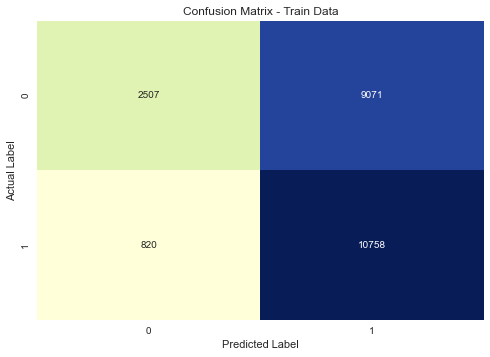



------------------------------------------------------------
AUC: 0.823


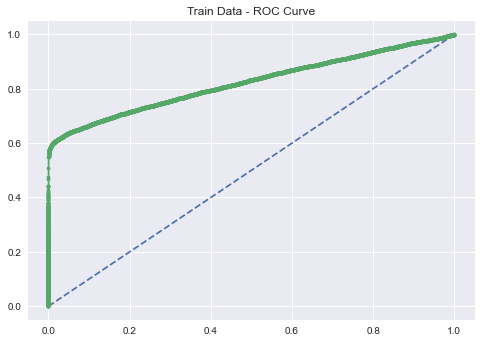



------------------------------------------------------------


Test Accuracy Score for model GaussianNB() is 0.3640847886948407


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.22      0.34      5704
           1       0.25      0.82      0.38      1797

    accuracy                           0.36      7501
   macro avg       0.52      0.52      0.36      7501
weighted avg       0.67      0.36      0.35      7501

------------------------------------------------------------




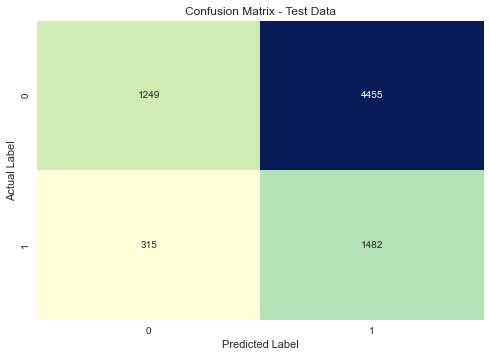



------------------------------------------------------------
AUC: 0.532


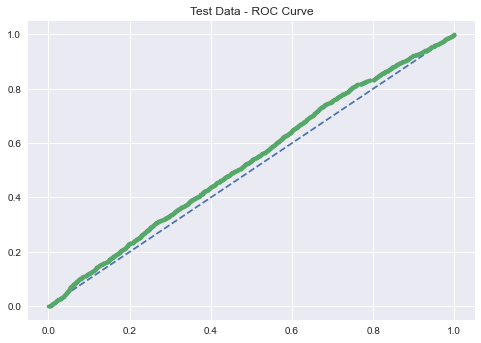



------------------------------------------------------------


In [232]:
nb=GaussianNB()
df_metrics_NB_linear_smote_unscaled,best_model_NB_linear_smote_unscaled=apply_evl("NB_Linear_SMOTE_Unscaled",nb,
                                                              None,
                                     X_train_linear_smote,X_test_linear_smote,y_train_linear_smote,y_test_linear_smote)

In [233]:
df_metrics_NB_linear_smote_unscaled

NB_Linear_SMOTE_Unscaled_Train  \
Accuracy                                            0.572854   
Precision                                           0.542539   
Recall                                              0.929176   
F1                                                   0.68507   
AUC                                                 0.823353   
FPR        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
TPR        [0.0, 8.637070305752289e-05, 0.000172741406115...   

                               NB_Linear_SMOTE_Unscaled_Test  
Accuracy                                            0.364085  
Precision                                           0.249621  
Recall                                              0.824708  
F1                                                  0.383243  
AUC                                                 0.531791  
FPR        [0.0, 0.0001753155680224404, 0.000525946704067...  
TPR        [0.0, 0.0, 0.0, 0.0005564830272676684, 0.00055...

## Tweaking Threshold

0.1 



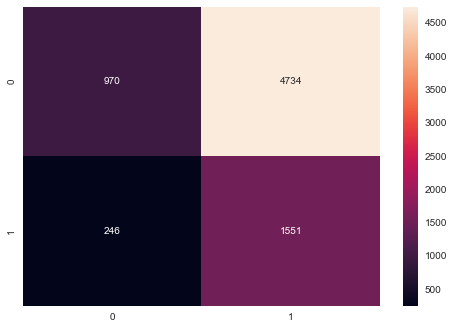

0.2 



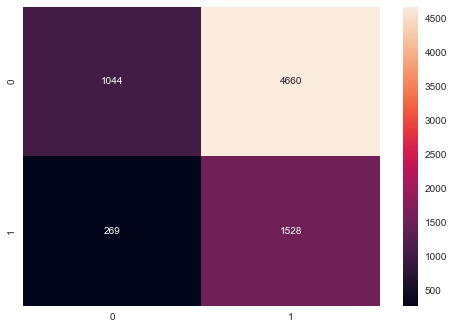

0.3 



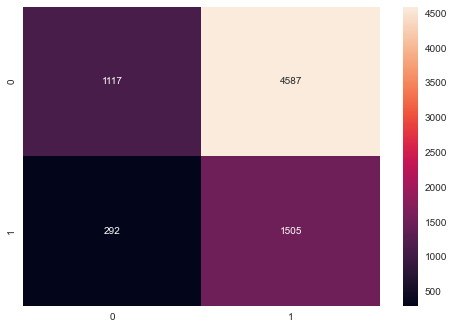

0.4 



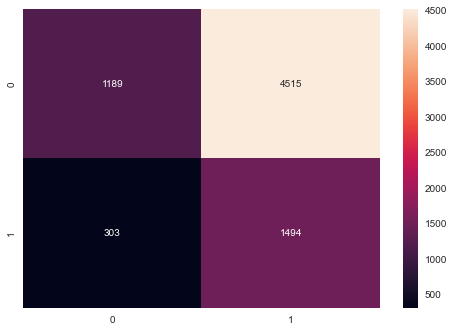

0.5 



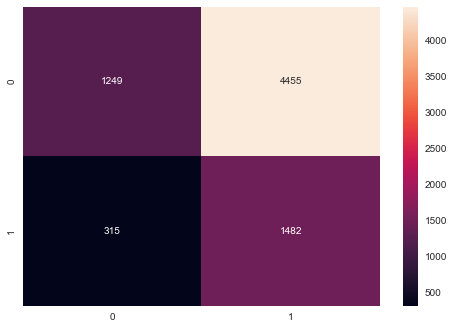

0.6 



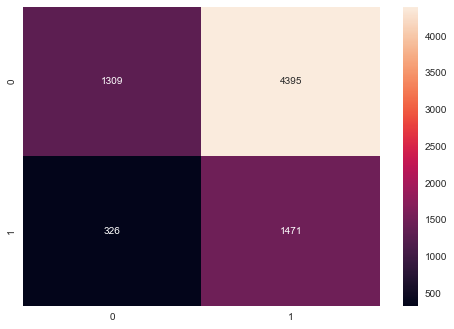

0.7 



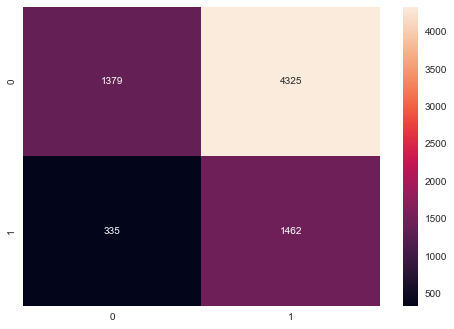

0.8 



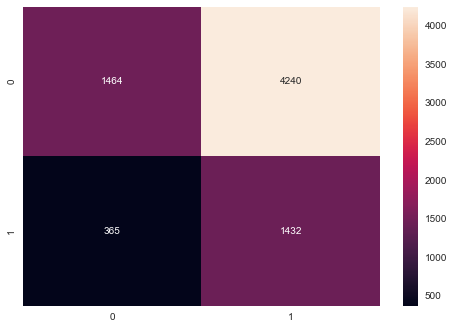

0.9 



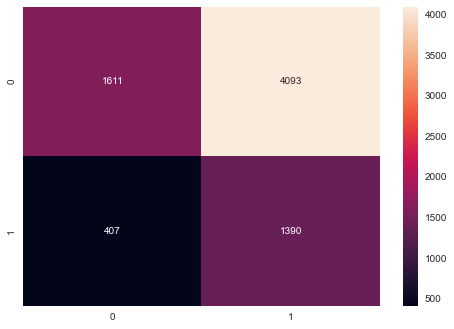

In [234]:
df_tweak_NB_linear_smote_unscaled = tweak_threshold(best_model_NB_linear_smote_unscaled,X_train_linear_smote,X_test_linear_smote,y_train_linear_smote,y_test_linear_smote)

In [236]:
df_tweak_NB_linear_smote_unscaled[df_tweak_NB_linear_smote_unscaled['Test/Train']=='Test']

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
9   0.5166    0.3361  0.8631     0.2468    0.3838        0.1       Test
10  0.5167    0.3429  0.8503     0.2469    0.3827        0.2       Test
11  0.5167    0.3496  0.8375     0.2470    0.3815        0.3       Test
12  0.5199    0.3577  0.8314     0.2486    0.3828        0.4       Test
13  0.5218    0.3641  0.8247     0.2496    0.3832        0.5       Test
14  0.5240    0.3706  0.8186     0.2508    0.3839        0.6       Test
15  0.5277    0.3787  0.8136     0.2526    0.3855        0.7       Test
16  0.5268    0.3861  0.7969     0.2525    0.3835        0.8       Test
17  0.5280    0.4001  0.7735     0.2535    0.3819        0.9       Test

# Gaussian Navie Bayes - Linear SMOTE Scaled

NB_Linear_SMOTE_Scaled
Train Accuracy Score for model GaussianNB() is 0.5160570040060419


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.81      0.48      0.60     11578
           1       0.28      0.64      0.39      3649

    accuracy                           0.52     15227
   macro avg       0.54      0.56      0.49     15227
weighted avg       0.68      0.52      0.55     15227

------------------------------------------------------------




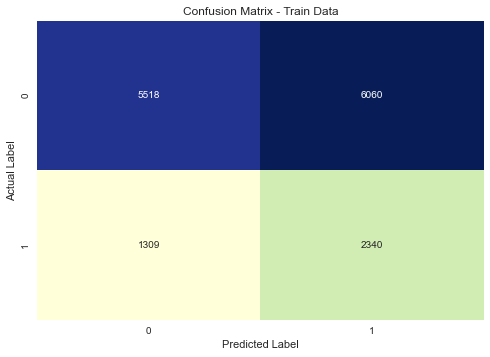



------------------------------------------------------------
AUC: 0.580


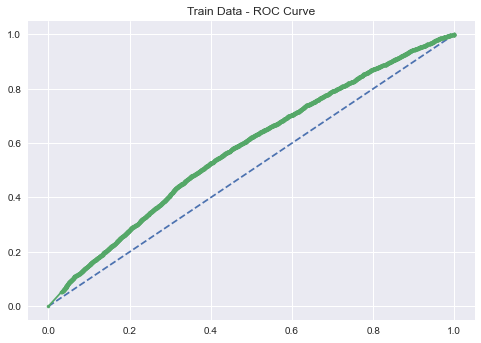



------------------------------------------------------------


Test Accuracy Score for model GaussianNB() is 0.511265164644714


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.80      0.48      0.60      5704
           1       0.27      0.61      0.38      1797

    accuracy                           0.51      7501
   macro avg       0.53      0.55      0.49      7501
weighted avg       0.67      0.51      0.55      7501

------------------------------------------------------------




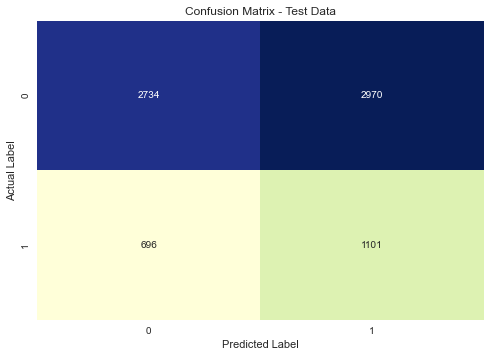



------------------------------------------------------------
AUC: 0.551


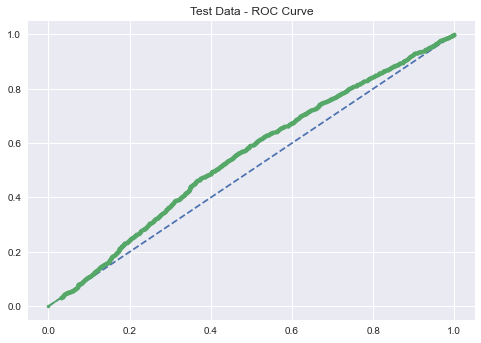



------------------------------------------------------------


In [237]:
nb=GaussianNB()
df_metrics_NB_linear_smote_scaled,best_model_NB_linear_smote_scaled=apply_evl("NB_Linear_SMOTE_Scaled",nb,
                                                              None,
                                     X_train_linear_smote_sc,X_test_linear_smote_sc,y_train_linear_smote_sc,
                                                                              y_test_linear_smote_sc)

In [238]:
df_metrics_NB_linear_smote_scaled

NB_Linear_SMOTE_Scaled_Train  \
Accuracy                                            0.516057   
Precision                                           0.278571   
Recall                                              0.641272   
F1                                                  0.388414   
AUC                                                 0.579956   
FPR        [0.0, 0.03126619450682329, 0.03152530661599585...   
TPR        [0.0, 0.05152096464784873, 0.05179501233214579...   

                                 NB_Linear_SMOTE_Scaled_Test  
Accuracy                                            0.511265  
Precision                                            0.27045  
Recall                                              0.612688  
F1                                                  0.375256  
AUC                                                 0.551299  
FPR        [0.0, 0.030329593267882187, 0.0306802244039270...  
TPR        [0.0, 0.031163049526989426, 0.0317195325542570...

## Tweaking Threshold

0.1 



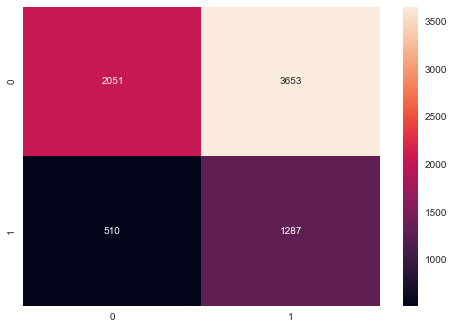

0.2 



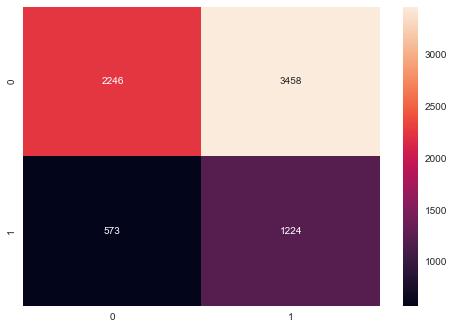

0.3 



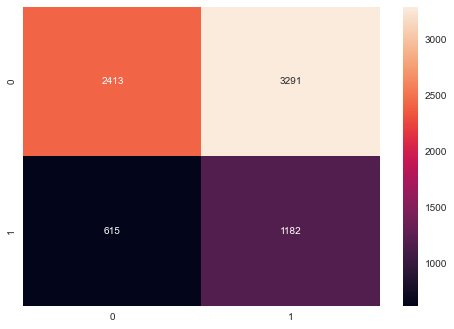

0.4 



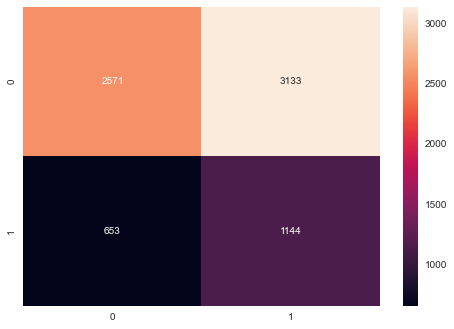

0.5 



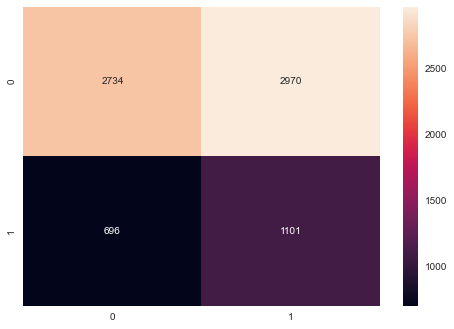

0.6 



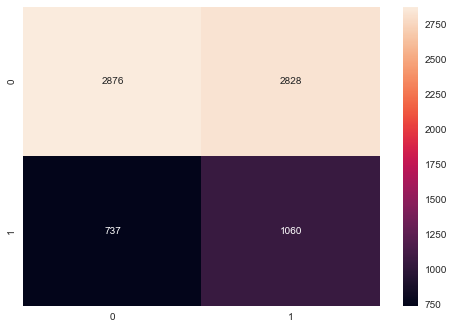

0.7 



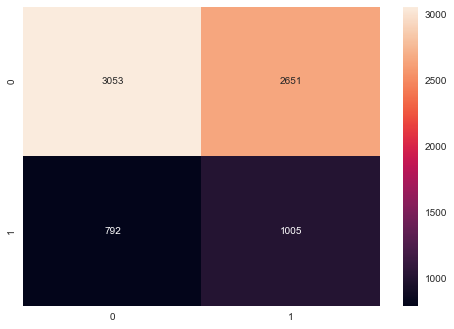

0.8 



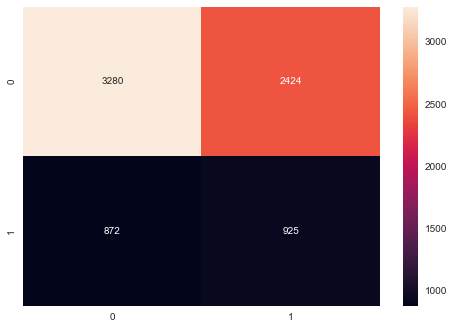

0.9 



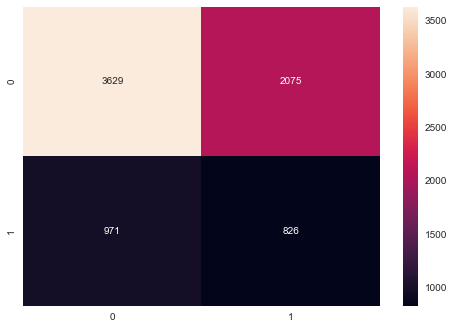

In [239]:
df_tweak_NB_linear_smote_scaled = tweak_threshold(best_model_NB_linear_smote_scaled,X_train_linear_smote_sc,
                                                  X_test_linear_smote_sc,y_train_linear_smote_sc,y_test_linear_smote_sc)

In [255]:
df_tweak_NB_linear_smote_scaled[df_tweak_NB_linear_smote_scaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
17  0.5479    0.5939  0.4597     0.2847    0.3516        0.9       Test
15  0.5473    0.5410  0.5593     0.2749    0.3686        0.7       Test
14  0.5470    0.5247  0.5899     0.2726    0.3729        0.6       Test
13  0.5460    0.5113  0.6127     0.2704    0.3753        0.5       Test
16  0.5449    0.5606  0.5147     0.2762    0.3595        0.8       Test
12  0.5437    0.4953  0.6366     0.2675    0.3767        0.4       Test
11  0.5404    0.4793  0.6578     0.2643    0.3770        0.3       Test
9   0.5379    0.4450  0.7162     0.2605    0.3821        0.1       Test
10  0.5374    0.4626  0.6811     0.2614    0.3778        0.2       Test

# Random Forest - Tree - Unscaled

RF_Tree_Unscaled
Train Accuracy Score for model RandomForestClassifier() is 1.0


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11578
           1       1.00      1.00      1.00      3649

    accuracy                           1.00     15227
   macro avg       1.00      1.00      1.00     15227
weighted avg       1.00      1.00      1.00     15227

------------------------------------------------------------




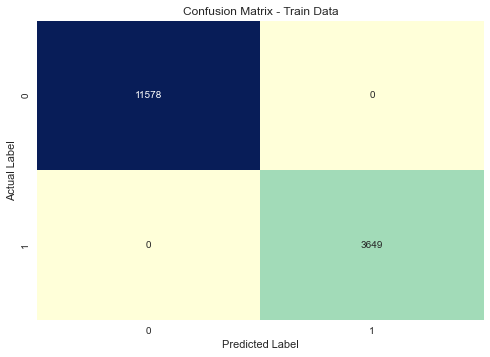



------------------------------------------------------------
AUC: 1.000


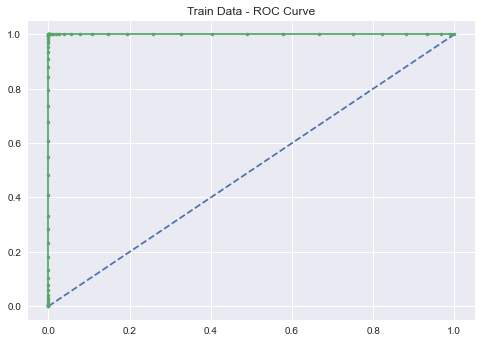



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.7622983602186375


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      5704
           1       0.55      0.04      0.08      1797

    accuracy                           0.76      7501
   macro avg       0.66      0.52      0.47      7501
weighted avg       0.71      0.76      0.68      7501

------------------------------------------------------------




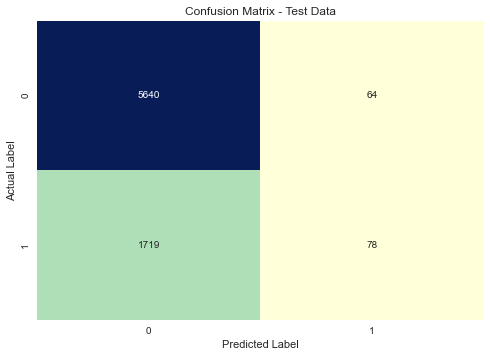



------------------------------------------------------------
AUC: 0.651


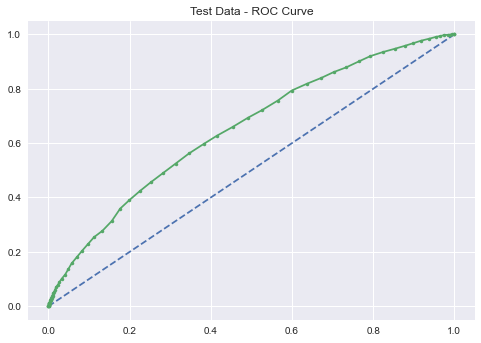



------------------------------------------------------------


In [343]:
rf = RandomForestClassifier()
df_metrics_RF_tree_unscaled,best_model_RF_tree_unscaled=apply_evl("RF_Tree_Unscaled",rf,
                                                              None,
                                     X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [344]:
df_metrics_RF_tree_unscaled

RF_Tree_Unscaled_Train  \
Accuracy                                                   1   
Precision                                                  1   
Recall                                                     1   
F1                                                         1   
AUC                                                        1   
FPR        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
TPR        [0.0, 0.0005480953685941354, 0.001096190737188...   

                                       RF_Tree_Unscaled_Test  
Accuracy                                            0.762298  
Precision                                           0.549296  
Recall                                             0.0434057  
F1                                                 0.0804538  
AUC                                                 0.651252  
FPR        [0.0, 0.0, 0.0, 0.0001753155680224404, 0.00017...  
TPR        [0.0, 0.0005564830272676684, 0.001112966054535...

## Tweaking Threshold

0.1 



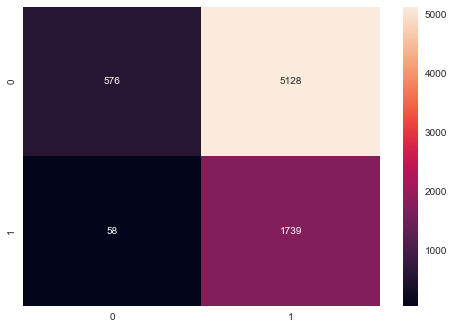

0.2 



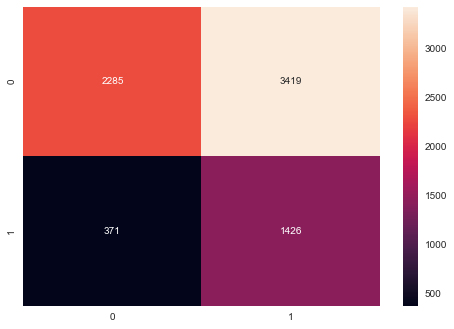

0.3 



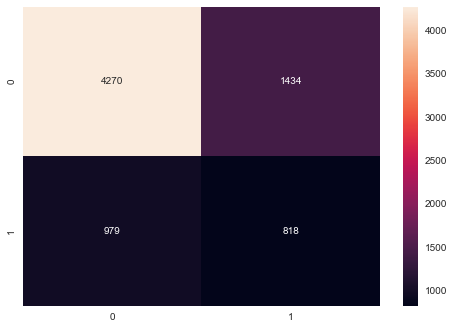

0.4 



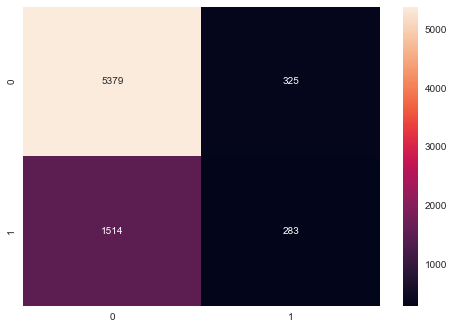

0.5 



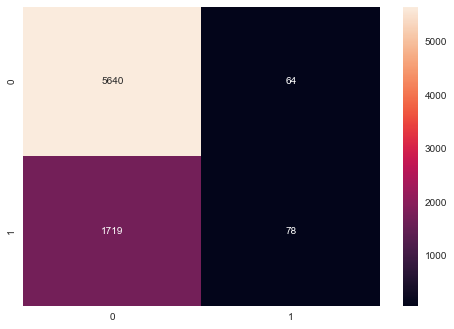

0.6 



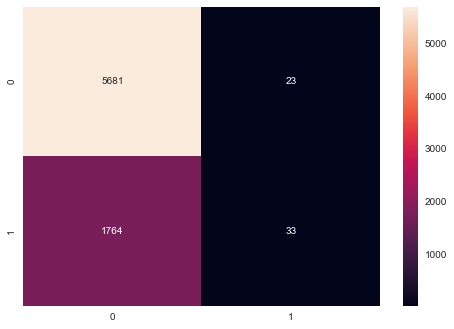

0.7 



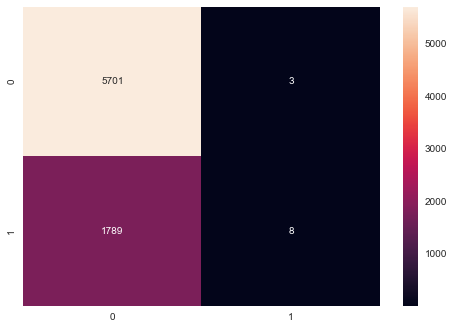

0.8 



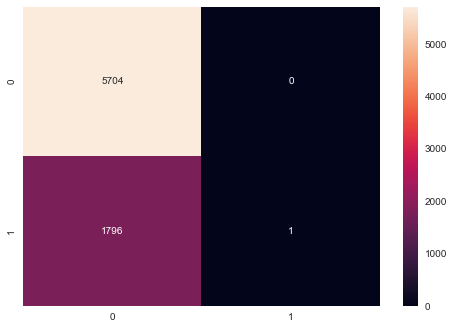

0.9 



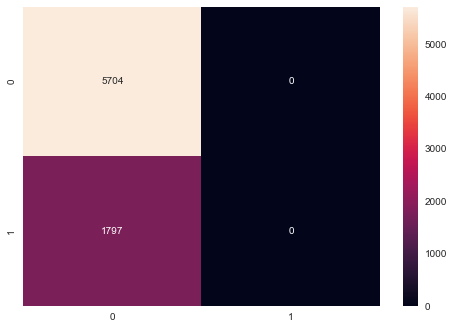

In [345]:
df_tweak_RF_tree_unscaled = tweak_threshold(best_model_RF_tree_unscaled,X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [346]:
df_tweak_RF_tree_unscaled[df_tweak_RF_tree_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
11  0.6019    0.6783  0.4552     0.3632    0.4041        0.3       Test
10  0.5971    0.4947  0.7935     0.2943    0.4294        0.2       Test
12  0.5503    0.7548  0.1575     0.4655    0.2353        0.4       Test
9   0.5344    0.3086  0.9677     0.2532    0.4014        0.1       Test
13  0.5161    0.7623  0.0434     0.5493    0.0805        0.5       Test
14  0.5072    0.7618  0.0184     0.5893    0.0356        0.6       Test
15  0.5020    0.7611  0.0045     0.7273    0.0088        0.7       Test
16  0.5003    0.7606  0.0006     1.0000    0.0011        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# Random Forest - Tree - SMOTE - Unscaled

RF_Tree_SMOTE_Unscaled
Train Accuracy Score for model RandomForestClassifier() is 1.0


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11578
           1       1.00      1.00      1.00     11578

    accuracy                           1.00     23156
   macro avg       1.00      1.00      1.00     23156
weighted avg       1.00      1.00      1.00     23156

------------------------------------------------------------




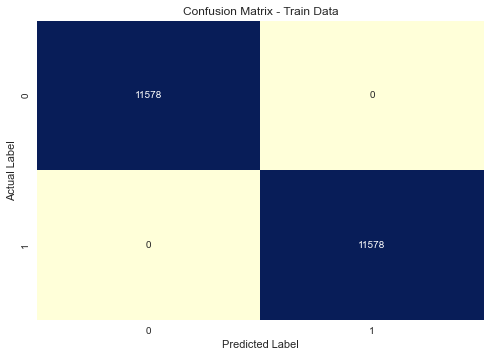



------------------------------------------------------------
AUC: 1.000


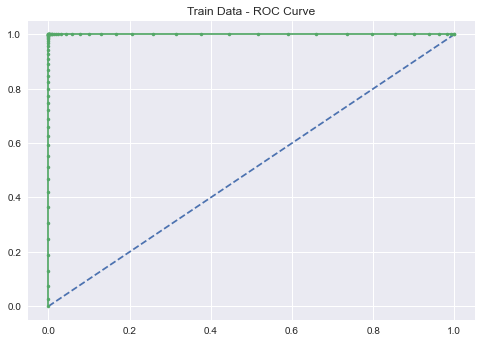



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.7285695240634582


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5704
           1       0.36      0.18      0.24      1797

    accuracy                           0.73      7501
   macro avg       0.57      0.54      0.54      7501
weighted avg       0.68      0.73      0.69      7501

------------------------------------------------------------




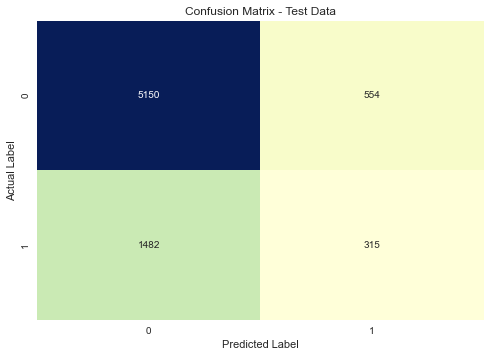



------------------------------------------------------------
AUC: 0.629


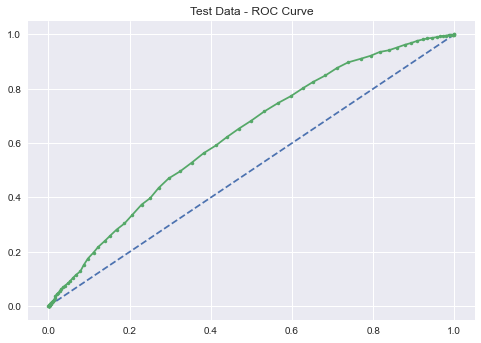



------------------------------------------------------------


In [347]:
rf = RandomForestClassifier()
df_metrics_RF_tree_smote_unscaled,best_model_RF_tree_smote_unscaled=apply_evl("RF_Tree_SMOTE_Unscaled",rf,
                                                              None,
                                     X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [348]:
df_metrics_RF_tree_smote_unscaled

RF_Tree_SMOTE_Unscaled_Train  \
Accuracy                                                   1   
Precision                                                  1   
Recall                                                     1   
F1                                                         1   
AUC                                                        1   
FPR        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
TPR        [0.0, 0.027984107790637414, 0.0757471065814475...   

                                 RF_Tree_SMOTE_Unscaled_Test  
Accuracy                                             0.72857  
Precision                                           0.362486  
Recall                                              0.175292  
F1                                                  0.236309  
AUC                                                 0.629299  
FPR        [0.0, 0.0001753155680224404, 0.000350631136044...  
TPR        [0.0, 0.0, 0.0, 0.0005564830272676684, 0.00055...

## Tweaking Threshold

0.1 



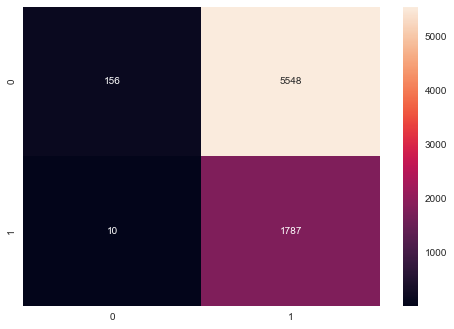

0.2 



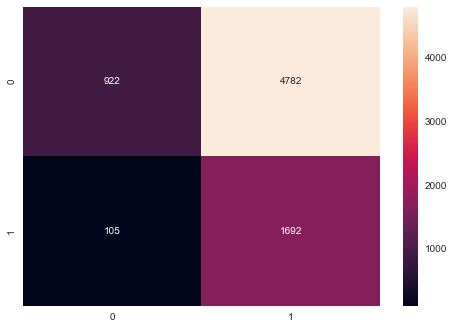

0.3 



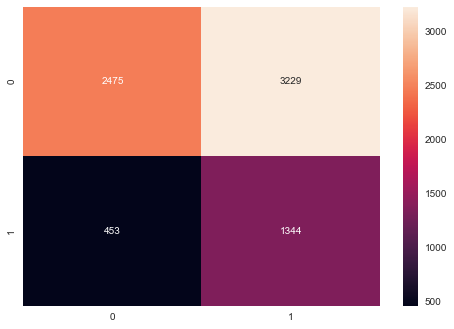

0.4 



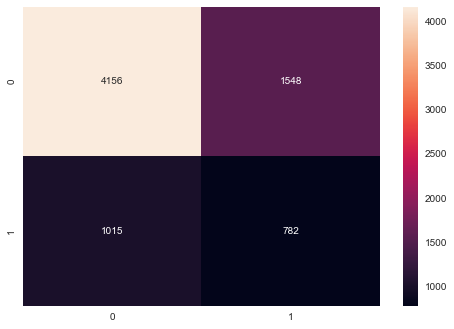

0.5 



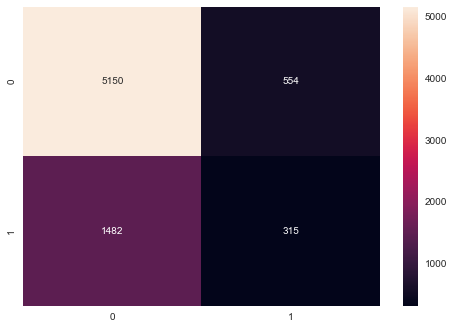

0.6 



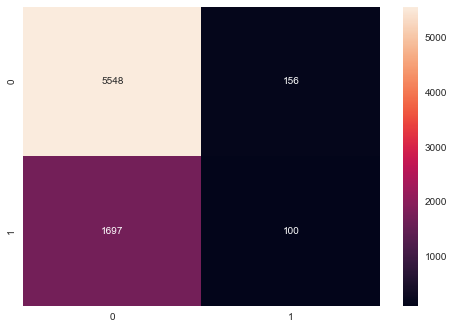

0.7 



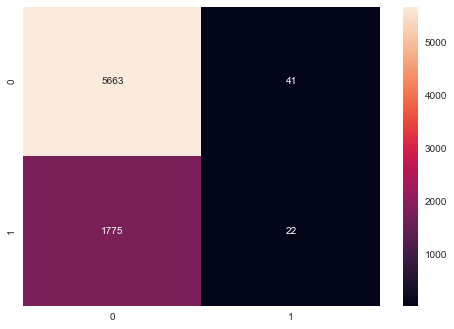

0.8 



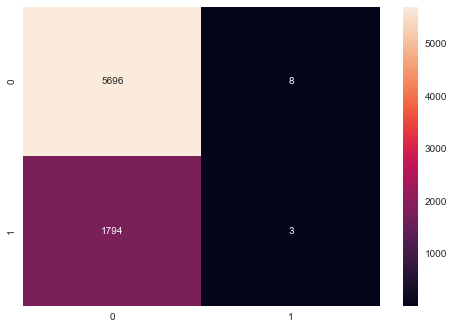

0.9 



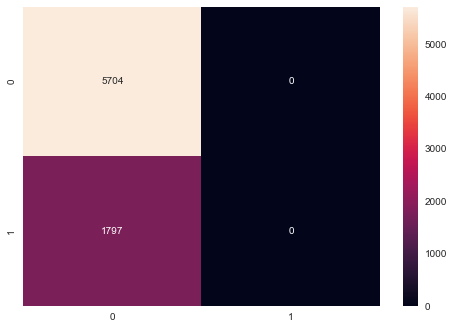

In [349]:
df_tweak_RF_tree_smote_unscaled = tweak_threshold(best_model_RF_tree_smote_unscaled,X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [350]:
df_tweak_RF_tree_smote_unscaled[df_tweak_RF_tree_smote_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
11  0.5909    0.5091  0.7479     0.2939    0.4220        0.3       Test
12  0.5819    0.6583  0.4352     0.3356    0.3790        0.4       Test
10  0.5516    0.3485  0.9416     0.2614    0.4091        0.2       Test
13  0.5391    0.7286  0.1753     0.3625    0.2363        0.5       Test
14  0.5141    0.7530  0.0556     0.3906    0.0974        0.6       Test
9   0.5109    0.2590  0.9944     0.2436    0.3914        0.1       Test
15  0.5025    0.7579  0.0122     0.3492    0.0237        0.7       Test
16  0.5001    0.7598  0.0017     0.2727    0.0033        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# XGBoost - Tree - Unscaled

In [189]:
param_grid_xg = {'n_neighbors': [5, 10],# 15, 18, 19, 20],
              'max_depth ': [2, 3],# 4],# 5],
              'booster': ['gbtree','gblinear','dart'],
                 'gamma': [0.5, 1],# 1.5],# 2, 5],
                 'min_child_weight': [1, 5],# 10],
                 'n_jobs':[4]
             }

XGB_Tree_Unscaled
Train Accuracy Score for model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.9298614303539765


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11578
           1       0.99      0.72      0.83      3649

    accuracy                           0.93     15227
   macro avg       0.95      0.86      0.89     1522

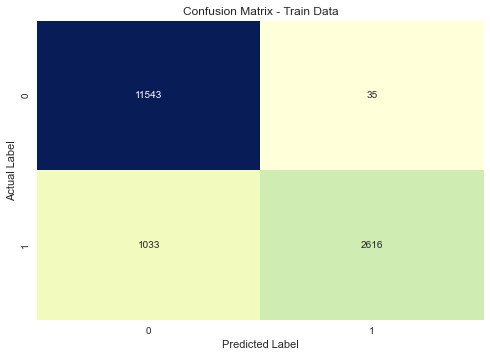



------------------------------------------------------------
AUC: 0.989


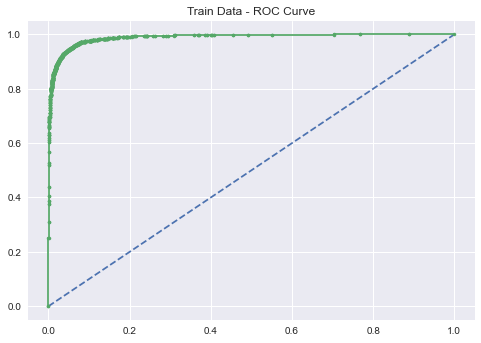



------------------------------------------------------------


Test Accuracy Score for model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.7518997467004399


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      5704
           1       0.45      0.15      0.22      1797

    accuracy                           0.75      7501
   macr

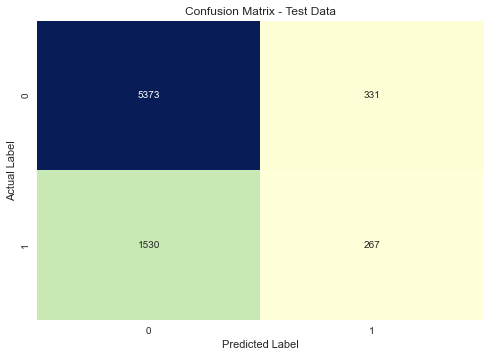



------------------------------------------------------------
AUC: 0.642


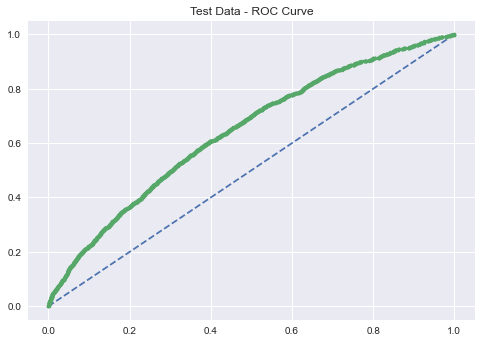



------------------------------------------------------------


In [103]:
from sklearn.linear_model import LogisticRegression
xgb = XGBClassifier()
df_metrics_XGB_tree_unscaled,best_model_XGB_tree_unscaled=apply_evl("XGB_Tree_Unscaled",xgb,
                                                              None,
                                     X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [104]:
df_metrics_XGB_tree_unscaled

XGB_Tree_Unscaled_Train  \
Accuracy                                           0.9298614   
Precision                                          0.9867974   
Recall                                             0.7169087   
F1                                                 0.8304762   
AUC                                                0.9891371   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.251301726500411...   

                                      XGB_Tree_Unscaled_Test  
Accuracy                                           0.7518997  
Precision                                          0.4464883  
Recall                                             0.1485810  
F1                                                 0.2229645  
AUC                                                0.6424568  
FPR        [0.0, 0.0, 0.0, 0.0001753155680224404, 0.00017...  
TPR        [0.0, 0.0005564830272676684, 0.001669449081803...

## Tweak Threshold

0.1 



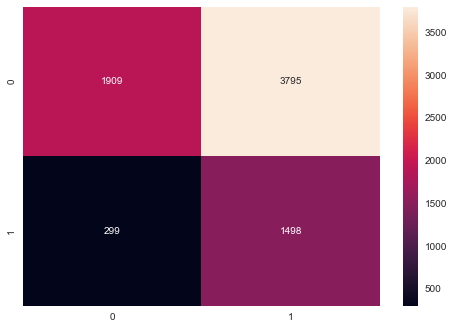

0.2 



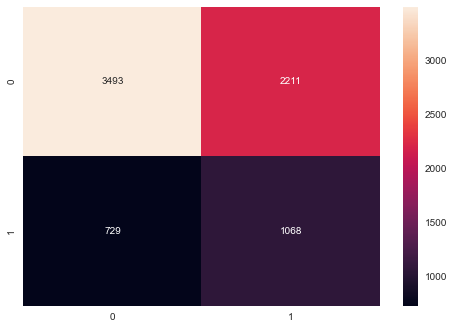

0.3 



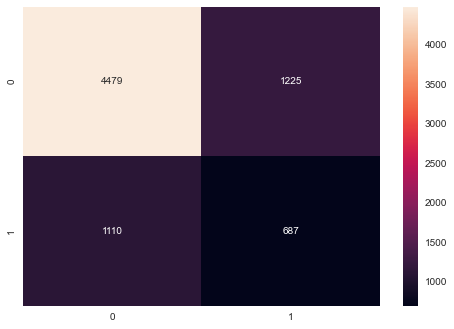

0.4 



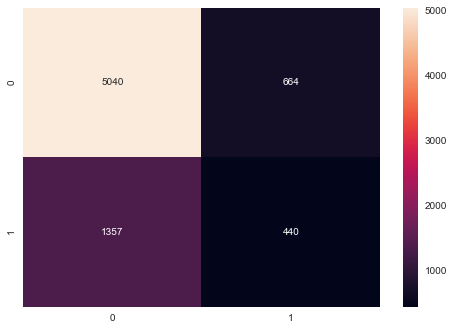

0.5 



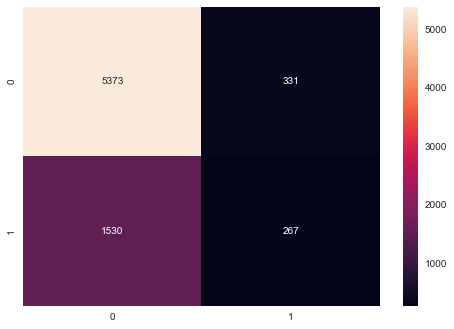

0.6 



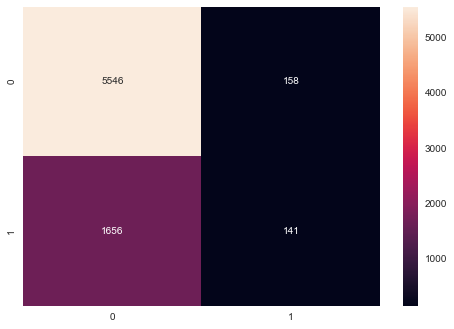

0.7 



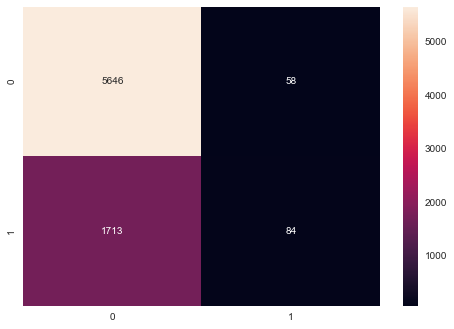

0.8 



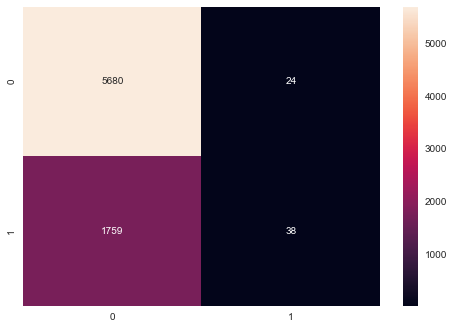

0.9 



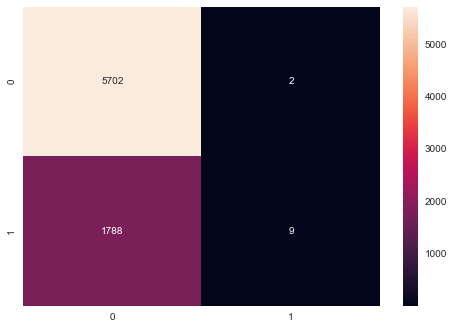

In [105]:
df_tweak_XGB_tree_unscaled = tweak_threshold(best_model_XGB_tree_unscaled,X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [106]:
df_tweak_XGB_tree_unscaled[df_tweak_XGB_tree_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy    Recall  Precision  F1_Score  Threshold Test/Train
10 0.6034000 0.6081000 0.5943000  0.3257000 0.4208000  0.2000000       Test
9  0.5841000 0.4542000 0.8336000  0.2830000 0.4226000  0.1000000       Test
11 0.5838000 0.6887000 0.3823000  0.3593000 0.3705000  0.3000000       Test
12 0.5642000 0.7306000 0.2449000  0.3986000 0.3033000  0.4000000       Test
13 0.5453000 0.7519000 0.1486000  0.4465000 0.2230000  0.5000000       Test
14 0.5254000 0.7582000 0.0785000  0.4716000 0.1345000  0.6000000       Test
15 0.5183000 0.7639000 0.0467000  0.5915000 0.0866000  0.7000000       Test
16 0.5085000 0.7623000 0.0211000  0.6129000 0.0409000  0.8000000       Test
17 0.5023000 0.7614000 0.0050000  0.8182000 0.0100000  0.9000000       Test

In [107]:
feat_imp=best_model_XGB_tree_unscaled.feature_importances_
feat_imp

array([0.0224685 , 0.0164242 , 0.01509054, 0.0143233 , 0.01653787,
       0.01341271, 0.01701164, 0.01337953, 0.01492767, 0.02433159,
       0.01515822, 0.02744584, 0.01441385, 0.01152874, 0.01291874,
       0.01516617, 0.01322546, 0.01738752, 0.01490053, 0.01482025,
       0.01540293, 0.01419176, 0.01671755, 0.0172895 , 0.01588253,
       0.01542667, 0.01784805, 0.01425736, 0.01572199, 0.01463187,
       0.01493016, 0.        , 0.01745623, 0.01084653, 0.01313568,
       0.01228234, 0.01561805, 0.01336634, 0.        , 0.01645008,
       0.01558198, 0.01219816, 0.01464355, 0.01451332, 0.01246123,
       0.01350676, 0.01425182, 0.01556638, 0.02151745, 0.01228159,
       0.01325454, 0.0375117 , 0.01914   , 0.01351183, 0.01403875,
       0.01890113, 0.01528702, 0.01310399, 0.01537974, 0.01447051,
       0.01709187, 0.01045224, 0.01217845, 0.01695479, 0.01028991,
       0.01558294], dtype=float32)

In [112]:
feat_imp=best_model_XGB_tree_unscaled.feature_importances_
#feat_imp.sort()
feat_imp=feat_imp.tolist()

In [113]:
X_train_tree.columns

Index(['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou',
       'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range',
       'months', 'totcalls', 'eqpdays', 'custcare_Mean', 'callwait_Mean',
       'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty',
       'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean',
       'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou',
       'avg6qty', 'opk_dat_Mean', 'roam_Mean', 'recv_sms_Mean',
       'blck_dat_Mean', 'mou_pead_Mean', 'da_Mean', 'da_Range', 'datovr_Mean',
       'datovr_Range', 'drop_dat_Mean', 'drop_vce_Mean', 'adjmou', 'totrev',
       'adjrev', 'avgrev', 'comp_dat_Mean', 'plcd_dat_Mean', 'income',
       'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new',
       'hnd_webcap', 'marital', 'ethnic', 'age1', 'age2', 'models',
       'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'mtrcycle', 'truck',
       'car_buy', 'csa'],
      dtype='object')

In [114]:
dict_imp={"Column_Name":X_train_tree.columns,
     "Feature_Importance":feat_imp}

In [115]:
df_feat_imp = pd.DataFrame(dict_imp)
df_feat_imp.sort_values(by='Feature_Importance',ascending=False).head(49)

Column_Name  Feature_Importance
51        refurb_new           0.0375117
11           eqpdays           0.0274458
9             months           0.0243316
0           mou_Mean           0.0224685
48          asl_flag           0.0215174
52        hnd_webcap           0.0191400
55              age1           0.0189011
26            avgqty           0.0178481
32     blck_dat_Mean           0.0174562
17            adjqty           0.0173875
23           avg3mou           0.0172895
60          uniqsubs           0.0170919
6     drop_vce_Range           0.0170116
63             truck           0.0169548
22     plcd_vce_Mean           0.0167176
4         change_mou           0.0165379
39     drop_vce_Mean           0.0164501
1        totmrc_Mean           0.0164242
24            avgmou           0.0158825
28           avg6qty           0.0157220
36       datovr_Mean           0.0156180
65               csa           0.0155829
40            adjmou           0.0155820
47          crclscod           0.0155664
25           avg3qty           0.0154267
20       ovrmou_Mean           0.0154029
58         hnd_price           0.0153797
56              age2           0.0152870
15    callwait_Range           0.0151662
10          totcalls           0.0151582
2          rev_Range           0.0150905
30         roam_Mean           0.0149302
8     mou_opkv_Range           0.0149277
18       ovrrev_Mean           0.0149005
19          rev_Mean           0.0148202
42            adjrev           0.0146436
29      opk_dat_Mean           0.0146319
43            avgrev           0.0145133
59          actvsubs           0.0144705
12     custcare_Mean           0.0144139
3          mou_Range           0.0143233
27           avg6mou           0.0142574
46            income           0.0142518
21     comp_vce_Mean           0.0141918
54            ethnic           0.0140387
53           marital           0.0135118
45     plcd_dat_Mean           0.0135068
5      drop_blk_Mean           0.0134127
7   owylis_vce_Range           0.0133795

# XGBoost - Tree - Scaled

XGB_Tree_Scaled
Train Accuracy Score for model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.9298614303539765


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11578
           1       0.99      0.72      0.83      3649

    accuracy                           0.93     15227
   macro avg       0.95      0.86      0.89     15227


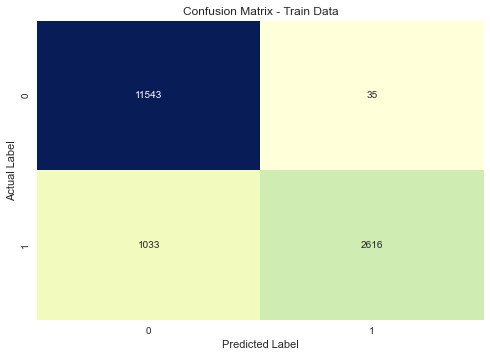



------------------------------------------------------------
AUC: 0.989


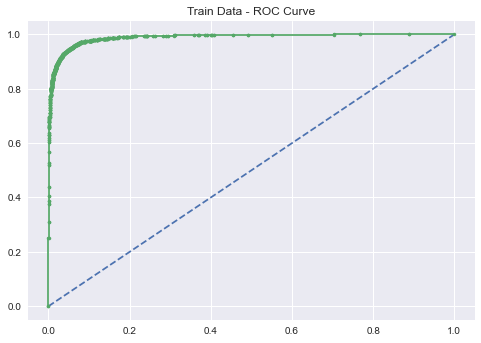



------------------------------------------------------------


Test Accuracy Score for model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.7516331155845887


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      5704
           1       0.44      0.15      0.22      1797

    accuracy                           0.75      7501
   macr

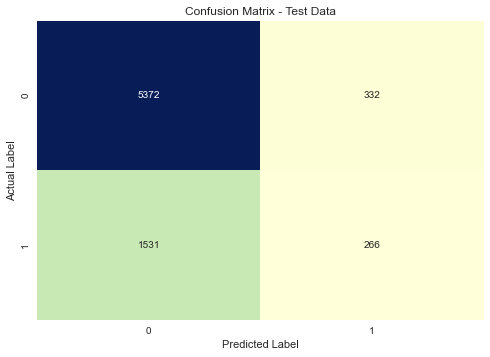



------------------------------------------------------------
AUC: 0.642


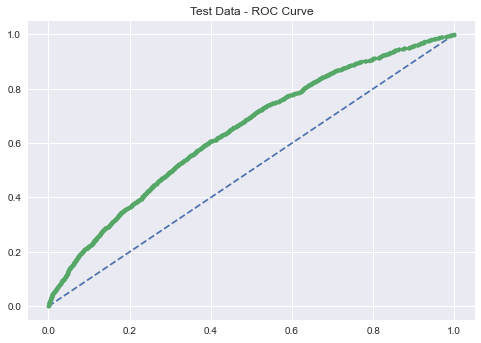



------------------------------------------------------------


In [247]:
from sklearn.linear_model import LogisticRegression
xgb = XGBClassifier()
df_metrics_XGB_tree_scaled_none,best_model_XGB_tree_scaled_none=apply_evl("XGB_Tree_Scaled",xgb,
                                                              None,
                                     X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

In [248]:
df_metrics_XGB_tree_scaled

XGB_Tree_Scaled_Train  \
Accuracy                                            0.759506   
Precision                                           0.459119   
Recall                                             0.0200055   
F1                                                 0.0383403   
AUC                                                 0.642696   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.000548095368594...   

                                        XGB_Tree_Scaled_Test  
Accuracy                                            0.759765  
Precision                                           0.461538  
Recall                                             0.0166945  
F1                                                 0.0322234  
AUC                                                 0.616725  
FPR        [0.0, 0.0001753155680224404, 0.000701262272089...  
TPR        [0.0, 0.0, 0.0, 0.0005564830272676684, 0.00055...

## Tweak Threshold

0.1 



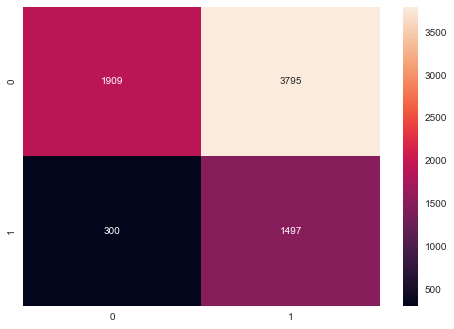

0.2 



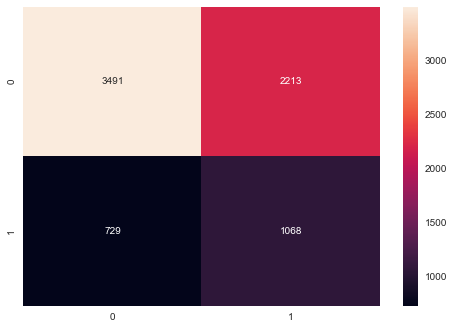

0.3 



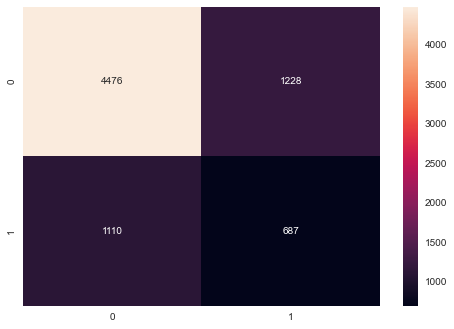

0.4 



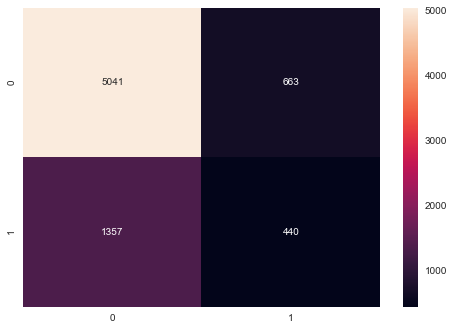

0.5 



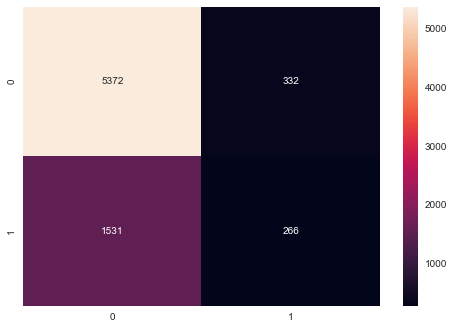

0.6 



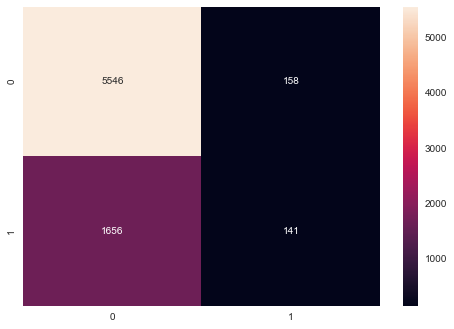

0.7 



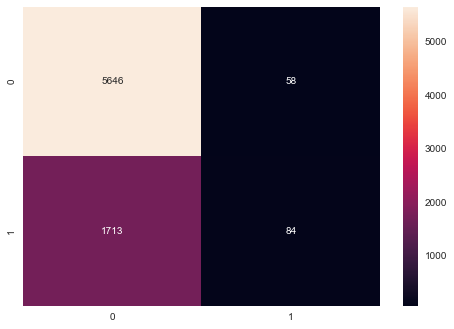

0.8 



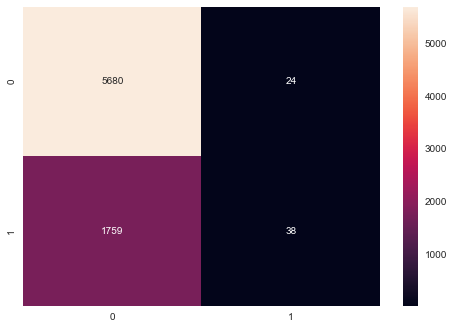

0.9 



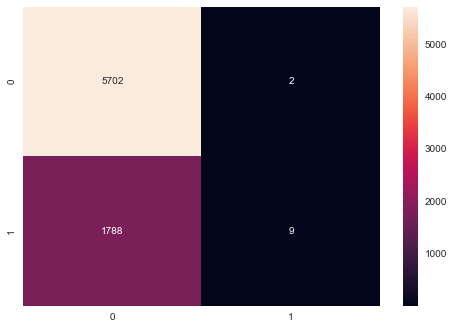

In [249]:
df_tweak_XGB_tree_scaled = tweak_threshold(best_model_XGB_tree_scaled_none,X_train_tree_sc,X_test_tree_sc,
                                           y_train_tree_sc,y_test_tree_sc)

In [253]:
df_tweak_XGB_tree_scaled[df_tweak_XGB_tree_scaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
10  0.6032    0.6078  0.5943     0.3255    0.4206        0.2       Test
9   0.5839    0.4541  0.8331     0.2829    0.4223        0.1       Test
11  0.5835    0.6883  0.3823     0.3587    0.3702        0.3       Test
12  0.5643    0.7307  0.2449     0.3989    0.3034        0.4       Test
13  0.5449    0.7516  0.1480     0.4448    0.2221        0.5       Test
14  0.5254    0.7582  0.0785     0.4716    0.1345        0.6       Test
15  0.5183    0.7639  0.0467     0.5915    0.0866        0.7       Test
16  0.5085    0.7623  0.0211     0.6129    0.0409        0.8       Test
17  0.5023    0.7614  0.0050     0.8182    0.0100        0.9       Test

# GBM - Tree - Unscaled

In [199]:
param_grid_GB = {
    'n_estimators': [25,50,100],#87,89,91,93,95],
    'loss':['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse']}# 'mae']}

GBM_Tree_Unscaled
Train Accuracy Score for model GradientBoostingClassifier() is 0.772509358376568


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11578
           1       0.81      0.07      0.12      3649

    accuracy                           0.77     15227
   macro avg       0.79      0.53      0.50     15227
weighted avg       0.78      0.77      0.69     15227

------------------------------------------------------------




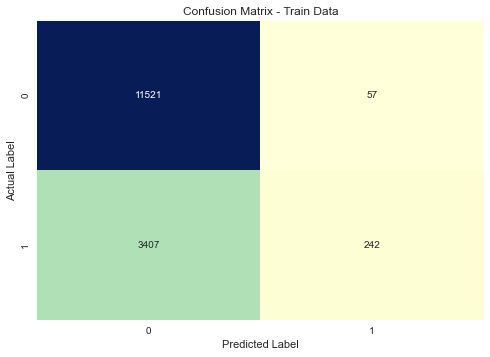



------------------------------------------------------------
AUC: 0.756


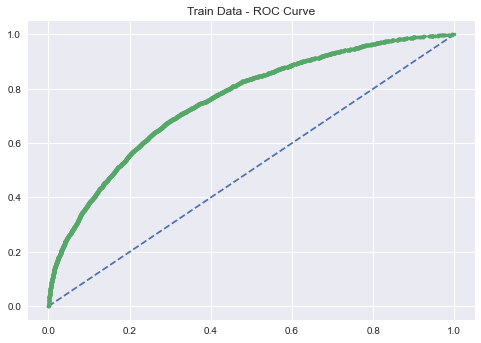



------------------------------------------------------------


Test Accuracy Score for model GradientBoostingClassifier() is 0.7622983602186375


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      5704
           1       0.55      0.04      0.08      1797

    accuracy                           0.76      7501
   macro avg       0.66      0.52      0.47      7501
weighted avg       0.71      0.76      0.68      7501

------------------------------------------------------------




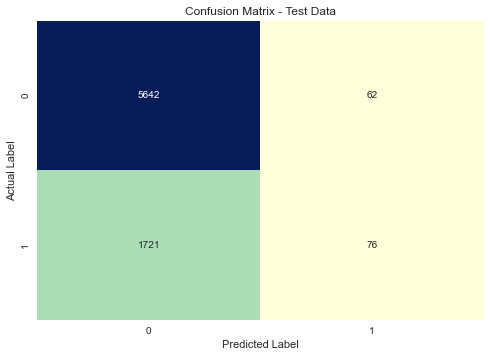



------------------------------------------------------------
AUC: 0.668


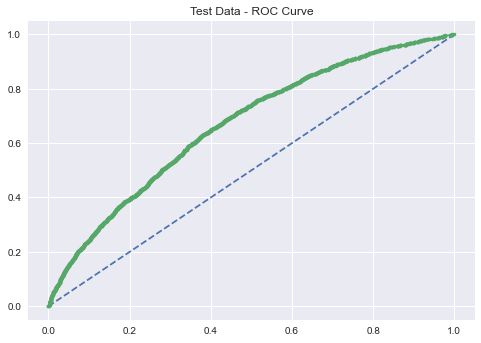



------------------------------------------------------------


In [200]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
df_metrics_GBM_tree_unscaled,best_model_GBM_tree_unscaled=apply_evl("GBM_Tree_Unscaled",GB_model,
                                                              None,
                                     X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [201]:
df_metrics_GBM_tree_unscaled

GBM_Tree_Unscaled_Train  \
Accuracy                                            0.772509   
Precision                                           0.809365   
Recall                                             0.0663195   
F1                                                  0.122594   
AUC                                                 0.755726   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.001918333790079...   

                                      GBM_Tree_Unscaled_Test  
Accuracy                                            0.762298  
Precision                                           0.550725  
Recall                                             0.0422927  
F1                                                  0.078553  
AUC                                                   0.6683  
FPR        [0.0, 0.0, 0.0, 0.0017531556802244039, 0.00175...  
TPR        [0.0, 0.0005564830272676684, 0.002225932109070...

## Tweak Threshold

0.1 



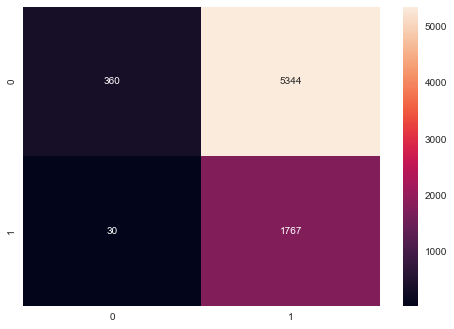

0.2 



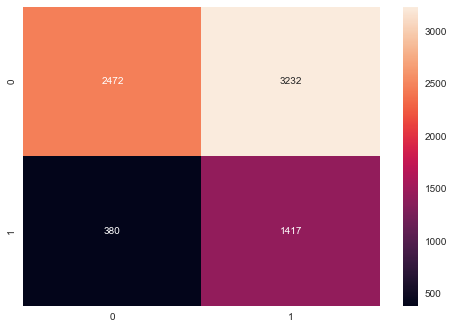

0.3 



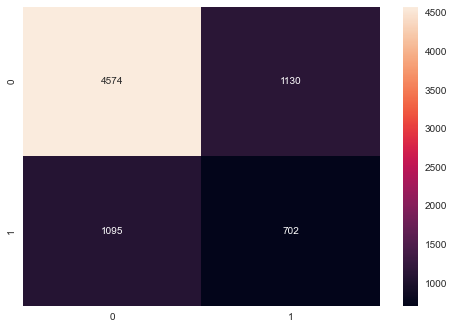

0.4 



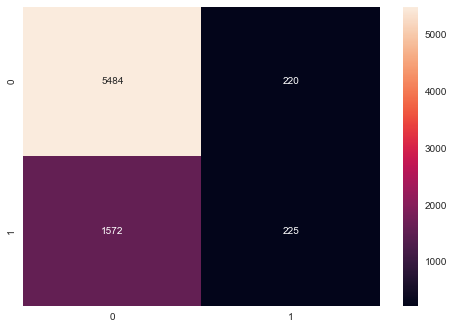

0.5 



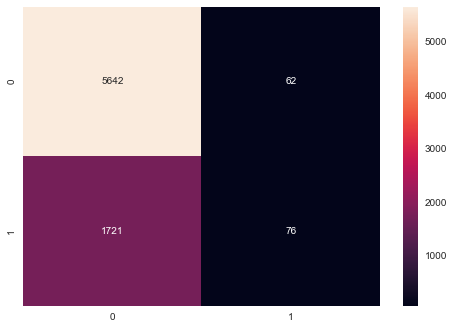

0.6 



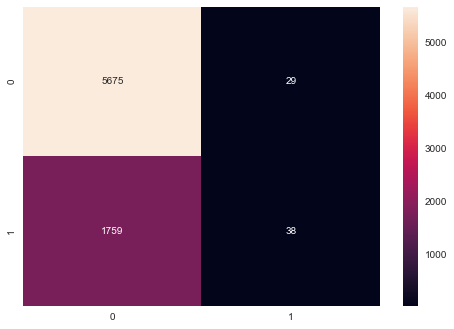

0.7 



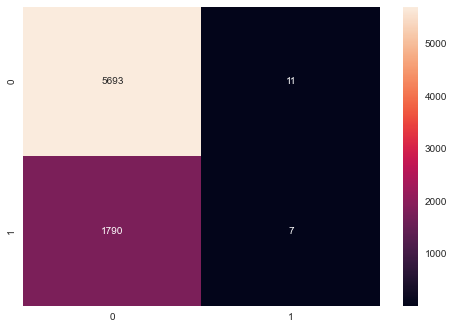

0.8 



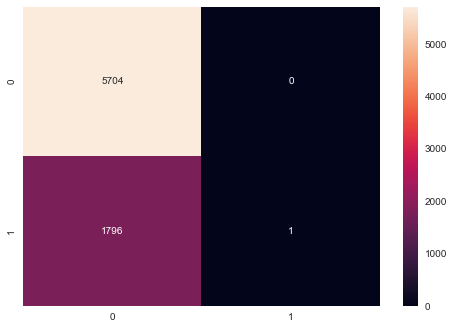

0.9 



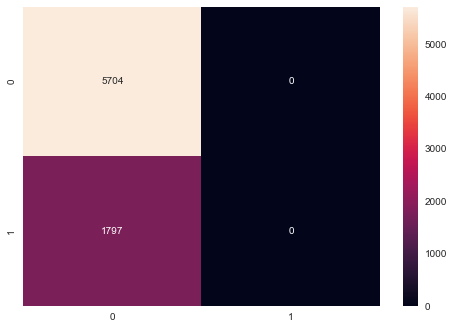

In [270]:
df_tweak_GBM_tree_unscaled = tweak_threshold(best_model_GBM_tree_unscaled,X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [271]:
df_tweak_GBM_tree_unscaled[df_tweak_GBM_tree_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
10  0.6110    0.5185  0.7885     0.3048    0.4397        0.2       Test
11  0.5963    0.7034  0.3907     0.3832    0.3869        0.3       Test
12  0.5433    0.7611  0.1252     0.5056    0.2007        0.4       Test
9   0.5232    0.2836  0.9833     0.2485    0.3967        0.1       Test
13  0.5157    0.7623  0.0423     0.5507    0.0786        0.5       Test
14  0.5080    0.7616  0.0211     0.5672    0.0408        0.6       Test
15  0.5010    0.7599  0.0039     0.3889    0.0077        0.7       Test
16  0.5003    0.7606  0.0006     1.0000    0.0011        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# GBM - Tree - Scaled

## Evaluate

In [32]:
param_grid_GB = {
    'min_samples_split':[100,200,300],
    'min_samples_leaf':[10,20,30],
    'max_depth':[50,75,100],
    'max_features':[10,20,30],
    'learning_rate':[0.01,0.001],
    'n_estimators': [50,100,150],#87,89,91,93,95],
    'loss':['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse']}# 'mae']}

GBM_Tree_Scaled
--------------------Best Parameters--------------------
{'criterion': 'mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 150}


--------------------Best Model Params--------------------
GradientBoostingClassifier(criterion='mse', learning_rate=0.01, max_depth=50,
                           max_features=20, min_samples_leaf=10,
                           min_samples_split=100, n_estimators=150)


Train Accuracy Score for model GradientBoostingClassifier() is 0.8078413344716622


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     11578
           1       0.98      0.20      0.34      3649

    accuracy                           0.81     15227
   macro avg       0.89      0.60      0.61     15227
weighted avg       0.84      0.81      0.76     1522

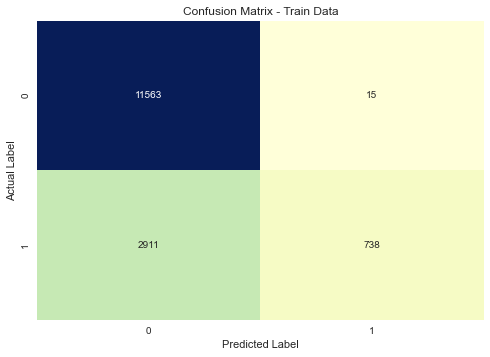



------------------------------------------------------------
AUC: 0.992


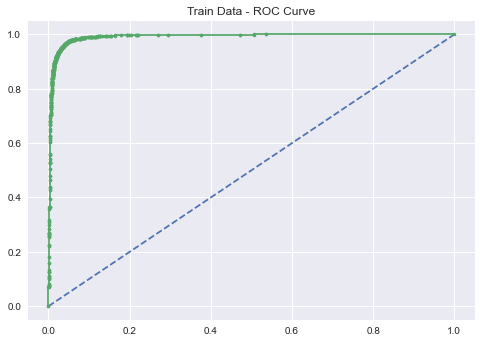



------------------------------------------------------------


Test Accuracy Score for model GradientBoostingClassifier() is 0.7626983068924144


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5704
           1       0.59      0.03      0.06      1797

    accuracy                           0.76      7501
   macro avg       0.68      0.51      0.46      7501
weighted avg       0.72      0.76      0.67      7501

------------------------------------------------------------




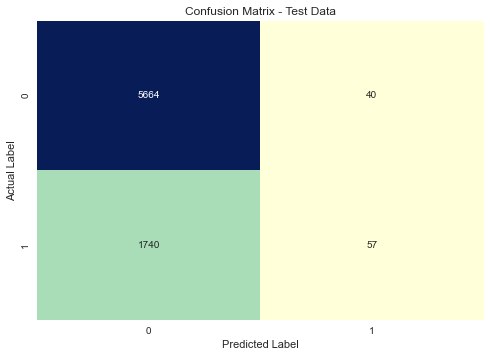



------------------------------------------------------------
AUC: 0.666


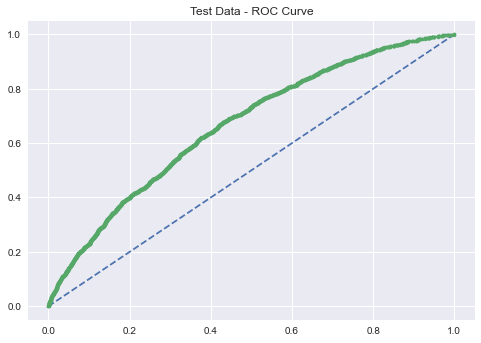



------------------------------------------------------------


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
df_metrics_GBM_tree_scaled,best_model_GBM_tree_scaled=apply_evl("GBM_Tree_Scaled",GB_model,
                                                              param_grid_GB,
                                     X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

In [34]:
df_metrics_GBM_tree_scaled

GBM_Tree_Scaled_Train  \
Accuracy                                            0.807841   
Precision                                            0.98008   
Recall                                              0.202247   
F1                                                  0.335302   
AUC                                                 0.991581   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.069882159495752...   

                                        GBM_Tree_Scaled_Test  
Accuracy                                            0.762698  
Precision                                           0.587629  
Recall                                             0.0317195  
F1                                                 0.0601901  
AUC                                                 0.666494  
FPR        [0.0, 0.0, 0.0, 0.0001753155680224404, 0.00017...  
TPR        [0.0, 0.0005564830272676684, 0.001669449081803...

## Threshold Tweaking

0.1 



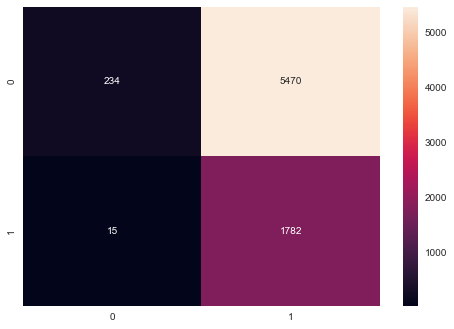

0.2 



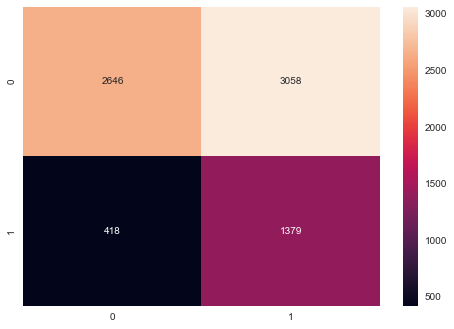

0.3 



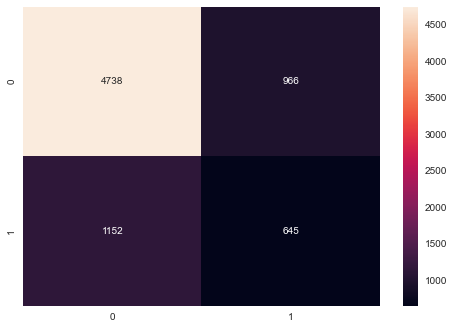

0.4 



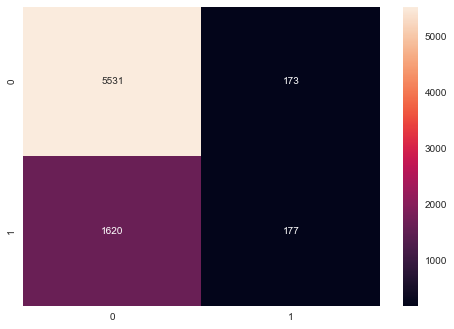

0.5 



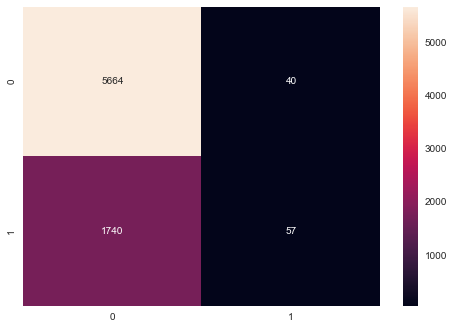

0.6 



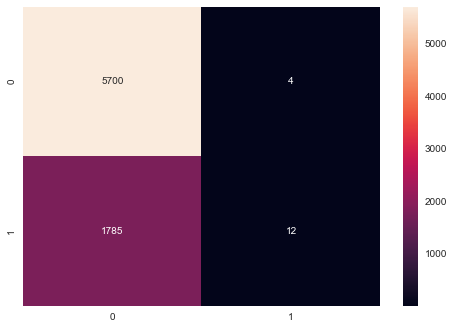

0.7 



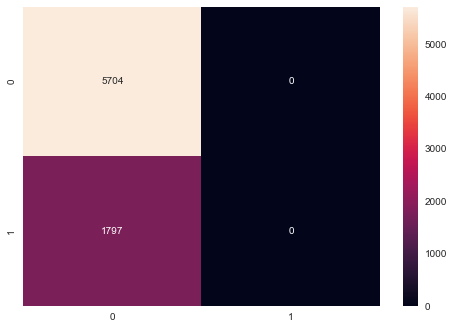

0.8 



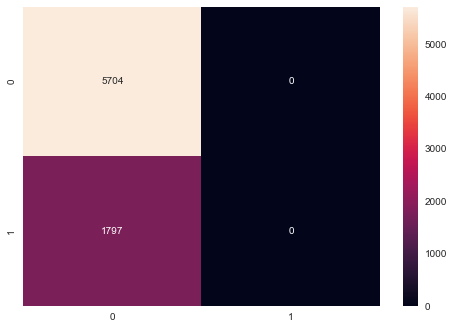

0.9 



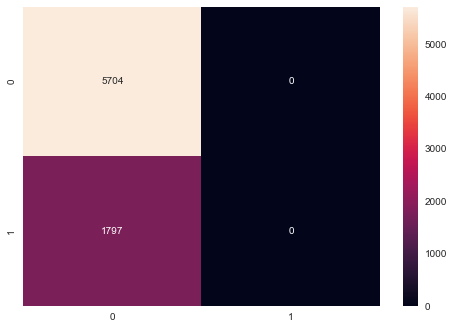

In [35]:
df_tweak_GBM_tree_scaled = tweak_threshold(best_model_GBM_tree_scaled,X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

In [36]:
df_tweak_GBM_tree_scaled[df_tweak_GBM_tree_scaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
10  0.6156    0.5366  0.7674     0.3108    0.4424        0.2       Test
11  0.5948    0.7176  0.3589     0.4004    0.3785        0.3       Test
12  0.5341    0.7610  0.0985     0.5057    0.1649        0.4       Test
9   0.5163    0.2688  0.9917     0.2457    0.3939        0.1       Test
13  0.5124    0.7627  0.0317     0.5876    0.0602        0.5       Test
14  0.5030    0.7615  0.0067     0.7500    0.0132        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

## Feature Importance

In [116]:
feat_imp=best_model_GBM_tree_scaled.feature_importances_
feat_imp

array([1.15610834e-01, 2.31229026e-02, 2.33082034e-02, 1.43138896e-02,
       5.38152442e-02, 8.48527350e-03, 1.03749938e-02, 3.83818069e-03,
       6.77234708e-03, 1.05617820e-01, 9.04027063e-03, 1.71381612e-01,
       9.81576581e-03, 9.15593244e-04, 7.24054034e-03, 0.00000000e+00,
       6.86469822e-03, 7.09367855e-03, 9.21741289e-03, 8.04259561e-03,
       1.77224351e-02, 9.42263331e-03, 1.24790322e-02, 2.24921802e-02,
       2.72925642e-02, 1.26456349e-02, 3.15886595e-02, 5.01101718e-03,
       1.13492103e-02, 1.22395092e-03, 6.11441531e-03, 0.00000000e+00,
       2.64389188e-03, 4.79974428e-03, 1.04259828e-02, 1.40943534e-03,
       1.73375906e-03, 4.07122335e-03, 5.67002709e-04, 3.39044116e-03,
       5.24602946e-03, 7.92666090e-03, 1.24167416e-02, 1.58712928e-02,
       0.00000000e+00, 1.53031128e-03, 3.80750237e-03, 1.44318166e-02,
       1.05083511e-02, 0.00000000e+00, 4.17088277e-03, 1.84694205e-02,
       1.33126861e-02, 4.42594838e-03, 9.94106162e-03, 4.52089300e-02,
      

In [117]:
feat_imp=best_model_GBM_tree_scaled.feature_importances_
#feat_imp.sort()
feat_imp=feat_imp.tolist()

In [118]:
X_train_tree.columns

Index(['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou',
       'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range',
       'months', 'totcalls', 'eqpdays', 'custcare_Mean', 'callwait_Mean',
       'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty',
       'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean',
       'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou',
       'avg6qty', 'opk_dat_Mean', 'roam_Mean', 'recv_sms_Mean',
       'blck_dat_Mean', 'mou_pead_Mean', 'da_Mean', 'da_Range', 'datovr_Mean',
       'datovr_Range', 'drop_dat_Mean', 'drop_vce_Mean', 'adjmou', 'totrev',
       'adjrev', 'avgrev', 'comp_dat_Mean', 'plcd_dat_Mean', 'income',
       'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new',
       'hnd_webcap', 'marital', 'ethnic', 'age1', 'age2', 'models',
       'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'mtrcycle', 'truck',
       'car_buy', 'csa'],
      dtype='object')

In [119]:
dict_imp={"Column_Name":X_train_tree.columns,
     "Feature_Importance":feat_imp}

In [120]:
df_feat_imp = pd.DataFrame(dict_imp)
df_feat_imp.sort_values(by='Feature_Importance',ascending=False).head(49)

Column_Name  Feature_Importance
11           eqpdays           0.1713816
0           mou_Mean           0.1156108
9             months           0.1056178
4         change_mou           0.0538152
55              age1           0.0452089
26            avgqty           0.0315887
24            avgmou           0.0272926
2          rev_Range           0.0233082
1        totmrc_Mean           0.0231229
23           avg3mou           0.0224922
51        refurb_new           0.0184694
20       ovrmou_Mean           0.0177224
43            avgrev           0.0158713
58         hnd_price           0.0153038
47          crclscod           0.0144318
3          mou_Range           0.0143139
52        hnd_webcap           0.0133127
25           avg3qty           0.0126456
22     plcd_vce_Mean           0.0124790
42            adjrev           0.0124167
60          uniqsubs           0.0114429
28           avg6qty           0.0113492
48          asl_flag           0.0105084
34           da_Mean           0.0104260
6     drop_vce_Range           0.0103750
54            ethnic           0.0099411
12     custcare_Mean           0.0098158
21     comp_vce_Mean           0.0094226
18       ovrrev_Mean           0.0092174
10          totcalls           0.0090403
5      drop_blk_Mean           0.0084853
19          rev_Mean           0.0080426
41            totrev           0.0079267
56              age2           0.0075393
14   iwylis_vce_Mean           0.0072405
17            adjqty           0.0070937
16    ccrndmou_Range           0.0068647
8     mou_opkv_Range           0.0067723
59          actvsubs           0.0067423
65               csa           0.0066230
30         roam_Mean           0.0061144
40            adjmou           0.0052460
27           avg6mou           0.0050110
33     mou_pead_Mean           0.0047997
53           marital           0.0044259
50              area           0.0041709
37      datovr_Range           0.0040712
7   owylis_vce_Range           0.0038382
63             truck           0.0038250

In [121]:
df_feat_imp.shape

(66, 2)

In [122]:
cols_df=pd.read_csv('cols.csv')

In [123]:
df_feat_imp=df_feat_imp.merge(cols_df,how='left')

In [124]:
df_feat_imp

Column_Name  Feature_Importance  \
0      mou_Mean           0.1156108   
1   totmrc_Mean           0.0231229   
2     rev_Range           0.0233082   
3     mou_Range           0.0143139   
4    change_mou           0.0538152   
..          ...                 ...   
61     forgntvl           0.0000000   
62     mtrcycle           0.0000000   
63        truck           0.0038250   
64      car_buy           0.0000010   
65          csa           0.0066230   

                                          Description Unnamed: 2  
0               Mean number of monthly minutes of use        NaN  
1                 Mean total monthly recurring charge        NaN  
2                    Range of revenue (charge amount)        NaN  
3                   Range of number of minutes of use        NaN  
4   Percentage change in monthly minutes of use vs...        NaN  
..                                                ...        ...  
61                      Foreign travel dummy variable        NaN  
62                               Motorcycle indicator        NaN  
63                                    Truck indicator        NaN  
64                              New or used car buyer        NaN  
65                  Communications local service area        NaN  

[66 rows x 4 columns]

In [125]:
df_feat_imp.drop(['Unnamed: 2'],axis=1,inplace=True)

In [126]:
df_feat_imp.columns

Index(['Column_Name', 'Feature_Importance', 'Description'], dtype='object')

In [127]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

In [128]:
df_feat_imp=df_feat_imp[['Column_Name','Description','Feature_Importance']]

In [132]:
df_feat_imp=df_feat_imp.sort_values(by='Feature_Importance',ascending=False).head(49)
df_feat_imp

Column_Name                                        Description  \
11           eqpdays          Number of days (age) of current equipment   
0           mou_Mean              Mean number of monthly minutes of use   
9             months                  Total number of months in service   
4         change_mou  Percentage change in monthly minutes of use vs...   
55              age1                      Age of first household member   
26            avgqty  Average monthly number of calls over the life ...   
24            avgmou  Average monthly minutes of use over the life o...   
2          rev_Range                   Range of revenue (charge amount)   
1        totmrc_Mean                Mean total monthly recurring charge   
23           avg3mou  Average monthly minutes of use over the previo...   
51        refurb_new                        Handset: refurbished or new   
20       ovrmou_Mean                        Mean overage minutes of use   
43            avgrev  Average monthly revenue over the life of the c...   
58         hnd_price                              Current handset price   
47          crclscod                                  Credit class code   
3          mou_Range                  Range of number of minutes of use   
52        hnd_webcap                             Handset web capability   
25           avg3qty  Average monthly number of calls over the previ...   
22     plcd_vce_Mean        Mean number of attempted voice calls placed   
42            adjrev  Billing adjusted total revenue over the life o...   
60          uniqsubs      Number of unique subscribers in the household   
28           avg6qty  Average monthly number of calls over the previ...   
48          asl_flag                             Account spending limit   
34           da_Mean            Mean number of directory assisted calls   
6     drop_vce_Range    Range of number of dropped (failed) voice calls   
54            ethnic                             Ethnicity roll-up code   
12     custcare_Mean                 Mean number of customer care calls   
21     comp_vce_Mean               Mean number of completed voice calls   
18       ovrrev_Mean                               Mean overage revenue   
10          totcalls  Total number of calls over the life of the cus...   
5      drop_blk_Mean            Mean number of dropped or blocked calls   
19          rev_Mean               Mean monthly revenue (charge amount)   
41            totrev                                      Total revenue   
56              age2                     Age of second household member   
14   iwylis_vce_Mean  Mean number of inbound wireless to wireless vo...   
17            adjqty  Billing adjusted total number of calls over th...   
16    ccrndmou_Range  Range of rounded minutes of use of customer ca...   
8     mou_opkv_Range  Range of unrounded minutes of use of off-peak ...   
59          actvsubs          Number of active subscribers in household   
65               csa                  Communications local service area   
30         roam_Mean                       Mean number of roaming calls   
40            adjmou  Billing adjusted total minutes of use over the...   
27           avg6mou  Average monthly minutes of use over the previo...   
33     mou_pead_Mean   Mean unrounded minutes of use of peak data calls   
53           marital                                     Marital status   
50              area                                    Geographic area   
37      datovr_Range                   Range of revenue of data overage   
7   owylis_vce_Range  Range of number of outbound wireless to wirele...   
63             truck                                    Truck indicator   

    Feature_Importance  
11           0.1713816  
0            0.1156108  
9            0.1056178  
4            0.0538152  
55           0.0452089  
26           0.0315887  
24           0.0272926  
2            0.0233082  
1            0.0231229  
23      

In [138]:
df_feat_imp=df_feat_imp.reset_index()
df_feat_imp

level_0  index       Column_Name  \
0         0     11           eqpdays   
1         1      0          mou_Mean   
2         2      9            months   
3         3      4        change_mou   
4         4     55              age1   
5         5     26            avgqty   
6         6     24            avgmou   
7         7      2         rev_Range   
8         8      1       totmrc_Mean   
9         9     23           avg3mou   
10       10     51        refurb_new   
11       11     20       ovrmou_Mean   
12       12     43            avgrev   
13       13     58         hnd_price   
14       14     47          crclscod   
15       15      3         mou_Range   
16       16     52        hnd_webcap   
17       17     25           avg3qty   
18       18     22     plcd_vce_Mean   
19       19     42            adjrev   
20       20     60          uniqsubs   
21       21     28           avg6qty   
22       22     48          asl_flag   
23       23     34           da_Mean   
24       24      6    drop_vce_Range   
25       25     54            ethnic   
26       26     12     custcare_Mean   
27       27     21     comp_vce_Mean   
28       28     18       ovrrev_Mean   
29       29     10          totcalls   
30       30      5     drop_blk_Mean   
31       31     19          rev_Mean   
32       32     41            totrev   
33       33     56              age2   
34       34     14   iwylis_vce_Mean   
35       35     17            adjqty   
36       36     16    ccrndmou_Range   
37       37      8    mou_opkv_Range   
38       38     59          actvsubs   
39       39     65               csa   
40       40     30         roam_Mean   
41       41     40            adjmou   
42       42     27           avg6mou   
43       43     33     mou_pead_Mean   
44       44     53           marital   
45       45     50              area   
46       46     37      datovr_Range   
47       47      7  owylis_vce_Range   
48       48     63             truck   

                                          Description  Feature_Importance  
0           Number of days (age) of current equipment           0.1713816  
1               Mean number of monthly minutes of use           0.1156108  
2                   Total number of months in service           0.1056178  
3   Percentage change in monthly minutes of use vs...           0.0538152  
4                       Age of first household member           0.0452089  
5   Average monthly number of calls over the life ...           0.0315887  
6   Average monthly minutes of use over the life o...           0.0272926  
7                    Range of revenue (charge amount)           0.0233082  
8                 Mean total monthly recurring charge           0.0231229  
9   Average monthly minutes of use over the previo...           0.0224922  
10                        Handset: refurbished or new           0.0184694  
11                        Mean overage minutes of use           0.0177224  
12  Average monthly revenue over the life of the c...           0.0158713  
13                              Current handset price           0.0153038  
14                                  Credit class code           0.0144318  
15                  Range of number of minutes of use           0.0143139  
16                             Handset web capability           0.0133127  
17  Average monthly number of calls over the previ...           0.0126456  
18        Mean number of attempted voice calls placed           0.0124790  
19  Billing adjusted total revenue over the life o...           0.0124167  
20      Number of unique subscribers in the household           0.0114429  
21  Average monthly number of calls over the previ...           0.0113492  
22                             Account spending limit           0.0105084  
23            Mean number of directory assisted calls           0.0104260  
24    Range of number of dropped (failed) voice calls           0.0103750  
25                         

In [140]:
df_feat_imp.drop(['index'],inplace=True,axis=1)

In [141]:
df_feat_imp.drop(['level_0'],inplace=True,axis=1)

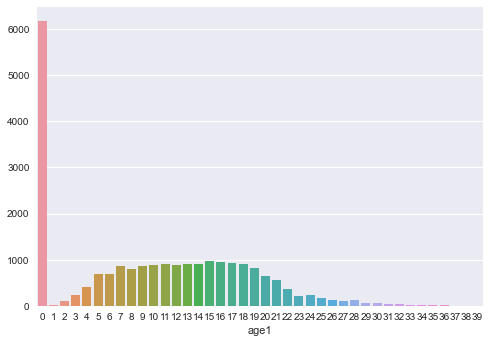

In [219]:
sns.barplot(x=df_Tree.groupby('age1').count()['churn'].index,y=df_Tree.groupby('age1').count()['churn'].values)

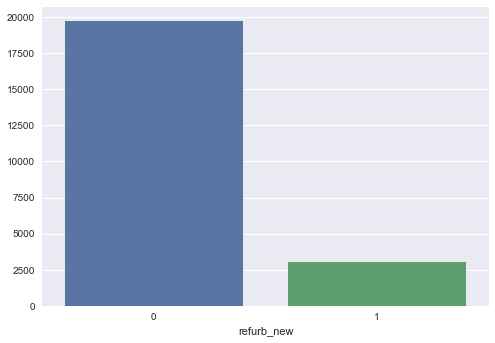

In [218]:
sns.barplot(x=df_Tree.groupby('refurb_new').count()['churn'].index,y=df_Tree.groupby('refurb_new').count()['churn'].values)

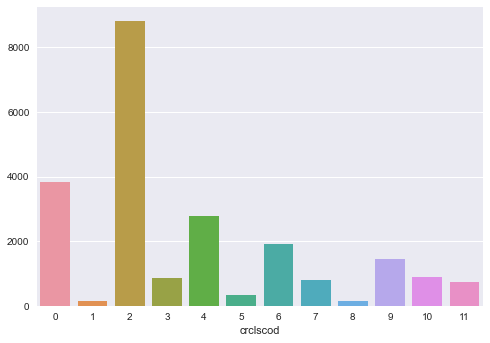

In [220]:
sns.barplot(x=df_Tree.groupby('crclscod').count()['churn'].index,y=df_Tree.groupby('crclscod').count()['churn'].values)

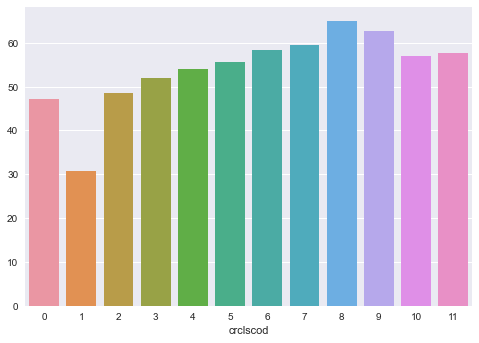

In [224]:
sns.barplot(x=df_Tree.groupby('crclscod').mean()['avgrev'].index,y=df_Tree.groupby('crclscod').mean()['avgrev'].values)

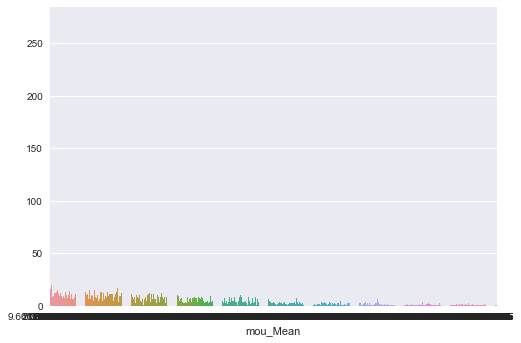

In [234]:
sns.barplot(x=df_Tree.groupby('mou_Mean').count()['churn'].index,y=df_Tree.groupby('mou_Mean').count()['churn'].values)

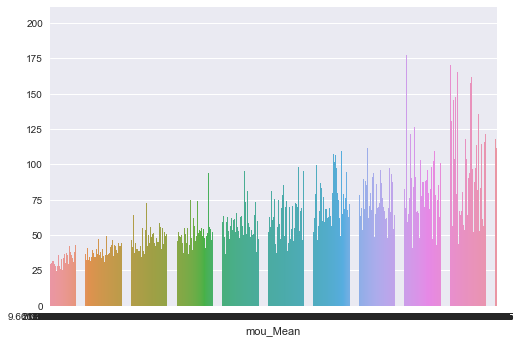

In [233]:
sns.barplot(x=df_Tree.groupby('mou_Mean').mean()['avgrev'].index,y=df_Tree.groupby('mou_Mean').mean()['avgrev'].values)

In [142]:
df_feat_imp

Column_Name                                        Description  \
0            eqpdays          Number of days (age) of current equipment   
1           mou_Mean              Mean number of monthly minutes of use   
2             months                  Total number of months in service   
3         change_mou  Percentage change in monthly minutes of use vs...   
4               age1                      Age of first household member   
5             avgqty  Average monthly number of calls over the life ...   
6             avgmou  Average monthly minutes of use over the life o...   
7          rev_Range                   Range of revenue (charge amount)   
8        totmrc_Mean                Mean total monthly recurring charge   
9            avg3mou  Average monthly minutes of use over the previo...   
10        refurb_new                        Handset: refurbished or new   
11       ovrmou_Mean                        Mean overage minutes of use   
12            avgrev  Average monthly revenue over the life of the c...   
13         hnd_price                              Current handset price   
14          crclscod                                  Credit class code   
15         mou_Range                  Range of number of minutes of use   
16        hnd_webcap                             Handset web capability   
17           avg3qty  Average monthly number of calls over the previ...   
18     plcd_vce_Mean        Mean number of attempted voice calls placed   
19            adjrev  Billing adjusted total revenue over the life o...   
20          uniqsubs      Number of unique subscribers in the household   
21           avg6qty  Average monthly number of calls over the previ...   
22          asl_flag                             Account spending limit   
23           da_Mean            Mean number of directory assisted calls   
24    drop_vce_Range    Range of number of dropped (failed) voice calls   
25            ethnic                             Ethnicity roll-up code   
26     custcare_Mean                 Mean number of customer care calls   
27     comp_vce_Mean               Mean number of completed voice calls   
28       ovrrev_Mean                               Mean overage revenue   
29          totcalls  Total number of calls over the life of the cus...   
30     drop_blk_Mean            Mean number of dropped or blocked calls   
31          rev_Mean               Mean monthly revenue (charge amount)   
32            totrev                                      Total revenue   
33              age2                     Age of second household member   
34   iwylis_vce_Mean  Mean number of inbound wireless to wireless vo...   
35            adjqty  Billing adjusted total number of calls over th...   
36    ccrndmou_Range  Range of rounded minutes of use of customer ca...   
37    mou_opkv_Range  Range of unrounded minutes of use of off-peak ...   
38          actvsubs          Number of active subscribers in household   
39               csa                  Communications local service area   
40         roam_Mean                       Mean number of roaming calls   
41            adjmou  Billing adjusted total minutes of use over the...   
42           avg6mou  Average monthly minutes of use over the previo...   
43     mou_pead_Mean   Mean unrounded minutes of use of peak data calls   
44           marital                                     Marital status   
45              area                                    Geographic area   
46      datovr_Range                   Range of revenue of data overage   
47  owylis_vce_Range  Range of number of outbound wireless to wirele...   
48             truck                                    Truck indicator   

    Feature_Importance  
0            0.1713816  
1            0.1156108  
2            0.1056178  
3            0.0538152  
4            0.0452089  
5            0.0315887  
6            0.0272926  
7            0.0233082  
8            0.0231229  
9       

Text(0.5, 0, 'Relative Importance')

<Figure size 576x396 with 0 Axes>

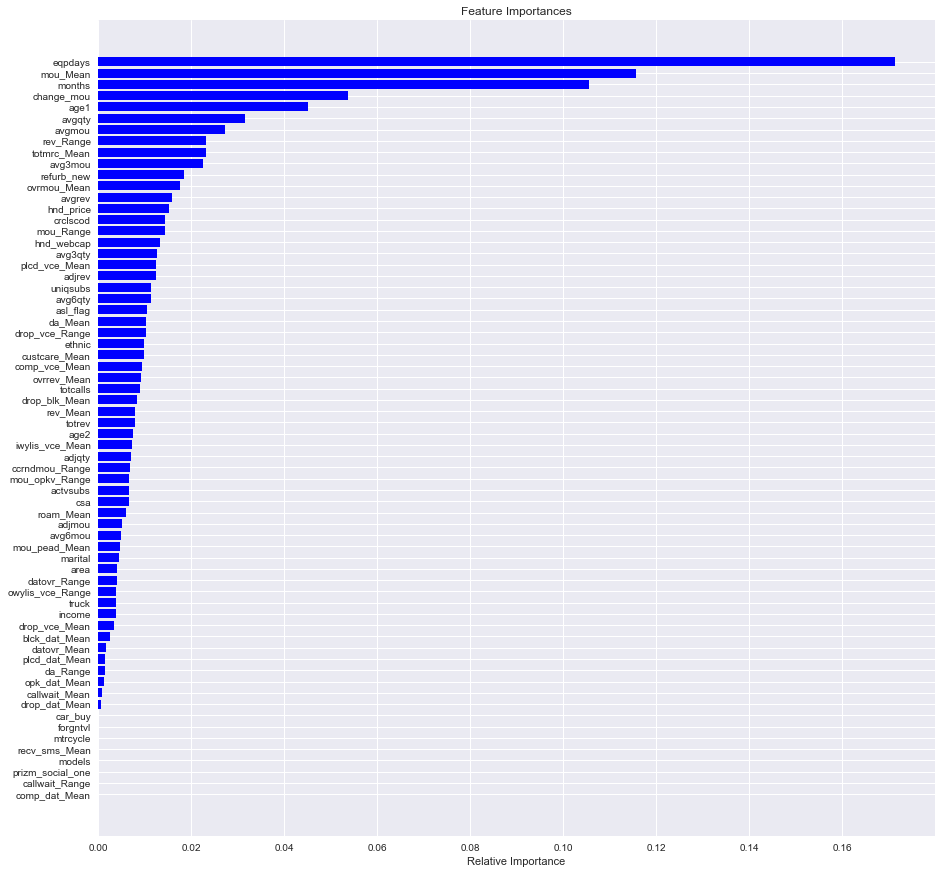

In [65]:
features=X_train_tree.columns
importances = best_model_GBM_tree_scaled.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# TESTING - To be ignored

In [539]:
feat_imp=allmodels[0].feature_importances_

In [540]:
feat_imp=feat_imp.tolist()

In [541]:
df_best_models=pd.DataFrame(index=X_train_tree.columns)

In [542]:
dict_imp={"Column_Name":X_train_tree.columns,"Model_Name":feat_imp}

In [543]:
dict_imp

{'Column_Name': Index(['mou_Mean', 'totmrc_Mean', 'rev_Range', 'mou_Range', 'change_mou',
        'drop_blk_Mean', 'drop_vce_Range', 'owylis_vce_Range', 'mou_opkv_Range',
        'months', 'totcalls', 'eqpdays', 'custcare_Mean', 'callwait_Mean',
        'iwylis_vce_Mean', 'callwait_Range', 'ccrndmou_Range', 'adjqty',
        'ovrrev_Mean', 'rev_Mean', 'ovrmou_Mean', 'comp_vce_Mean',
        'plcd_vce_Mean', 'avg3mou', 'avgmou', 'avg3qty', 'avgqty', 'avg6mou',
        'avg6qty', 'opk_dat_Mean', 'roam_Mean', 'recv_sms_Mean',
        'blck_dat_Mean', 'mou_pead_Mean', 'da_Mean', 'da_Range', 'datovr_Mean',
        'datovr_Range', 'drop_dat_Mean', 'drop_vce_Mean', 'adjmou', 'totrev',
        'adjrev', 'avgrev', 'comp_dat_Mean', 'plcd_dat_Mean', 'income',
        'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new',
        'hnd_webcap', 'marital', 'ethnic', 'age1', 'age2', 'models',
        'hnd_price', 'actvsubs', 'uniqsubs', 'forgntvl', 'mtrcycle', 'truck',
        'car_buy', '

In [549]:
df_feat_imp = pd.DataFrame(dict_imp)
df_feat_imp.set_index("Column_Name")

Model_Name
Column_Name            
mou_Mean           0.12
totmrc_Mean        0.08
rev_Range          0.02
mou_Range          0.00
change_mou         0.06
...                 ...
forgntvl           0.00
mtrcycle           0.00
truck              0.00
car_buy            0.00
csa                0.02

[66 rows x 1 columns]

In [550]:
df_feat_imp=df_feat_imp.rename(columns={"Model_Name":allmodels_tree_str[i]})  
df_feat_imp

Column_Name  best_model_XGB_tree_unscaled
0      mou_Mean                          0.12
1   totmrc_Mean                          0.08
2     rev_Range                          0.02
3     mou_Range                          0.00
4    change_mou                          0.06
..          ...                           ...
61     forgntvl                          0.00
62     mtrcycle                          0.00
63        truck                          0.00
64      car_buy                          0.00
65          csa                          0.02

[66 rows x 2 columns]

In [548]:
pd.concat([df_best_models,df_feat_imp],axis=0)

Column_Name  best_model_XGB_tree_unscaled
mou_Mean            NaN                           NaN
totmrc_Mean         NaN                           NaN
rev_Range           NaN                           NaN
mou_Range           NaN                           NaN
change_mou          NaN                           NaN
...                 ...                           ...
61             forgntvl                          0.00
62             mtrcycle                          0.00
63                truck                          0.00
64              car_buy                          0.00
65                  csa                          0.02

[132 rows x 2 columns]

In [535]:
df_best_models

Model_Name Column_Name  best_model_XGB_tree_unscaled
NaN          NaN         NaN                           NaN
NaN          NaN         NaN                           NaN
NaN          NaN         NaN                           NaN
NaN          NaN         NaN                           NaN
NaN          NaN         NaN                           NaN
...          ...         ...                           ...
61.0         NaN    forgntvl                          0.00
62.0         NaN    mtrcycle                          0.00
63.0         NaN       truck                          0.00
64.0         NaN     car_buy                          0.00
65.0         NaN         csa                          0.02

[594 rows x 3 columns]

In [553]:
df_best_models=pd.DataFrame(index=X_train_tree.columns)
#df_top_tweaks['Model_Name']=""
for i in np.arange(0,len(allmodels_tree)):
    try:
        feat_imp=allmodels[i].feature_importances_
        feat_imp=feat_imp.tolist()
        dict_imp={"Column_Name":X_train_tree.columns,"Model_Name":feat_imp}
        df_feat_imp = pd.DataFrame(dict_imp)
        #df_feat_imp.sort_values(by='Feature_Importance',ascending=False).head(10)
        df_feat_imp=df_feat_imp.rename(columns={"Model_Name":allmodels_tree_str[i]})  
        df_feat_imp.set_index("Column_Name")
        df_best_models=pd.concat([df_best_models,df_feat_imp],axis=0)
    except:
        continue
df_best_models=df_best_models.set_index("Column_Name")
#df_top_tweaks=df_top_tweaks.sort_values(by='AUC',ascending=False)
#df_top_tweaks.drop(columns=["Test/Train"],inplace=True)
df_best_models

best_model_ADA_tree_scaled  best_model_ADA_tree_smote_unscaled  \
Column_Name                                                                   
NaN                                 NaN                                 NaN   
NaN                                 NaN                                 NaN   
NaN                                 NaN                                 NaN   
NaN                                 NaN                                 NaN   
NaN                                 NaN                                 NaN   
...                                 ...                                 ...   
forgntvl                            NaN                                 NaN   
mtrcycle                            NaN                                 NaN   
truck                               NaN                                 NaN   
car_buy                             NaN                                 NaN   
csa                                 NaN                                 NaN   

             best_model_ADA_tree_unscaled  best_model_GBM_tree_scaled  \
Column_Name                                                             
NaN                                   NaN                         NaN   
NaN                                   NaN                         NaN   
NaN                                   NaN                         NaN   
NaN                                   NaN                         NaN   
NaN                                   NaN                         NaN   
...                                   ...                         ...   
forgntvl                              NaN                         NaN   
mtrcycle                              NaN                         NaN   
truck                                 NaN                         NaN   
car_buy                               NaN                         NaN   
csa                                   NaN                         NaN   

             best_model_GBM_tree_smote_scaled  \
Column_Name                                     
NaN                                       NaN   
NaN                                       NaN   
NaN                                       NaN   
NaN                                       NaN   
NaN                                       NaN   
...                                       ...   
forgntvl                                  NaN   
mtrcycle                                  NaN   
truck                                     NaN   
car_buy                                   NaN   
csa                                       NaN   

             best_model_GBM_tree_smote_unscaled  best_model_GBM_tree_unscaled  
Column_Name                                                                    
NaN                                         NaN                           NaN  
NaN                                         NaN                           NaN  
NaN                                         NaN                           NaN  
NaN                                         NaN                           NaN  
NaN                                         NaN                           NaN  
...                                         ...                           ...  
forgntvl                                    NaN                      0.000000  
mtrcycle                                    NaN                      0.000000  
truck                                       NaN                      0.003825  
car_buy                                     NaN                      0.000000  
csa                                         NaN                      0.006623  

[528 rows x 7 columns]

# GBM - Tree - SMOTE - Unscaled

GBM_Tree_SMOTE_Unscaled
Train Accuracy Score for model GradientBoostingClassifier() is 0.8278200034548281


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84     11578
           1       0.89      0.74      0.81     11578

    accuracy                           0.83     23156
   macro avg       0.84      0.83      0.83     23156
weighted avg       0.84      0.83      0.83     23156

------------------------------------------------------------




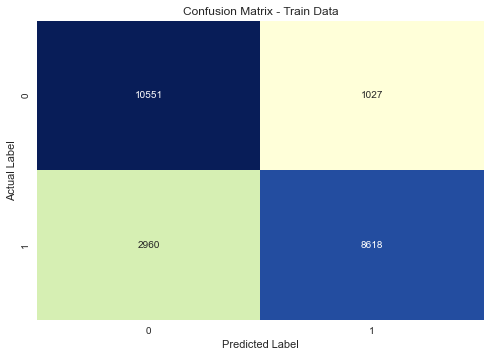



------------------------------------------------------------
AUC: 0.894


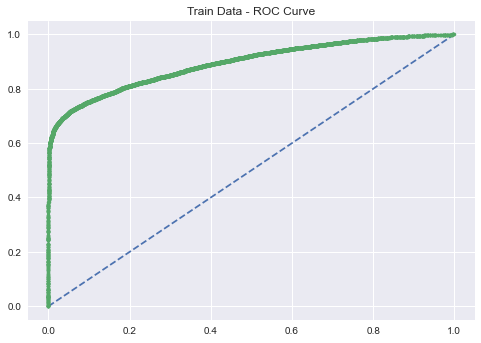



------------------------------------------------------------


Test Accuracy Score for model GradientBoostingClassifier() is 0.7263031595787228


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      5704
           1       0.37      0.19      0.25      1797

    accuracy                           0.73      7501
   macro avg       0.57      0.54      0.54      7501
weighted avg       0.68      0.73      0.69      7501

------------------------------------------------------------




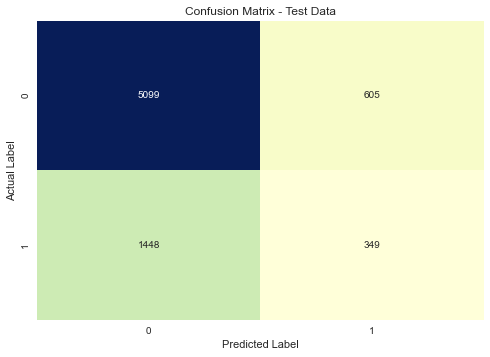



------------------------------------------------------------
AUC: 0.623


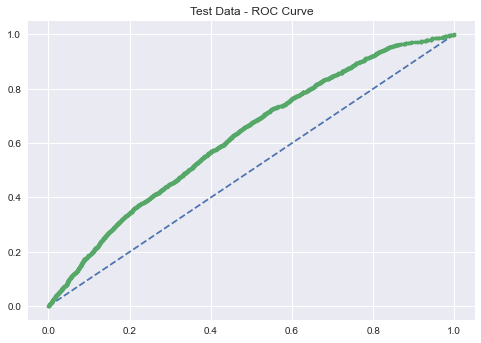



------------------------------------------------------------


In [274]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
df_metrics_GBM_tree_smote_unscaled,best_model_GBM_tree_smote_unscaled=apply_evl("GBM_Tree_SMOTE_Unscaled",GB_model,
                                                              None,
                                     X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [275]:
df_metrics_GBM_tree_smote_unscaled

GBM_Tree_SMOTE_Unscaled_Train  \
Accuracy                                             0.82782   
Precision                                            0.89352   
Recall                                              0.744343   
F1                                                  0.812138   
AUC                                                  0.89389   
FPR        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
TPR        [0.0, 8.637070305752289e-05, 0.000259112109172...   

                                GBM_Tree_SMOTE_Unscaled_Test  
Accuracy                                            0.726303  
Precision                                           0.365828  
Recall                                              0.194213  
F1                                                  0.253726  
AUC                                                 0.623447  
FPR        [0.0, 0.0, 0.0001753155680224404, 0.0001753155...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



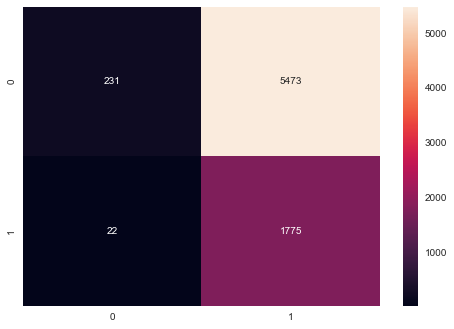

0.2 



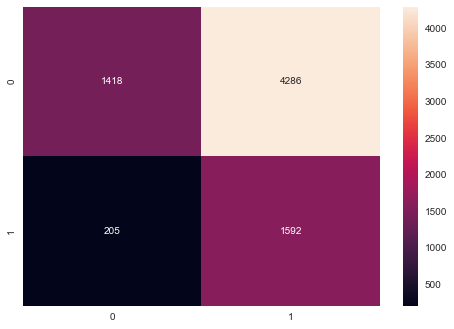

0.3 



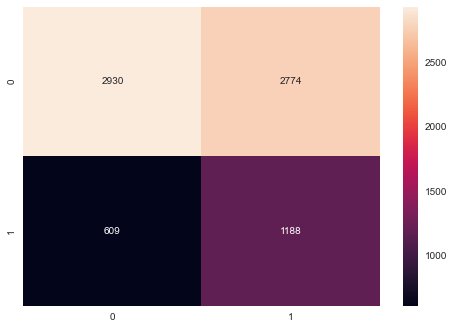

0.4 



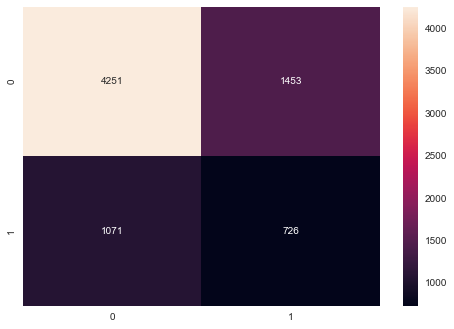

0.5 



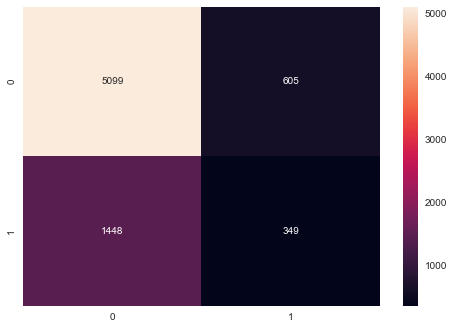

0.6 



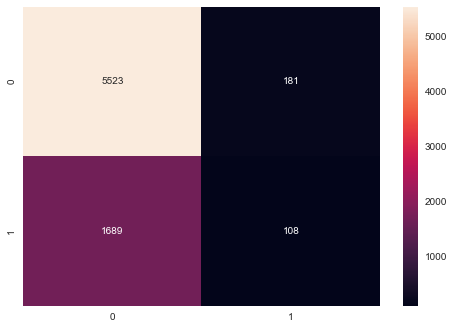

0.7 



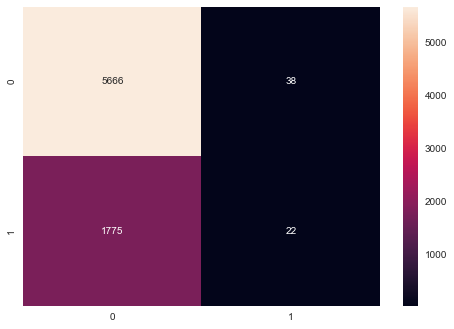

0.8 



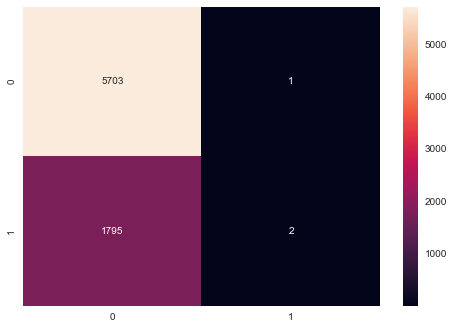

0.9 



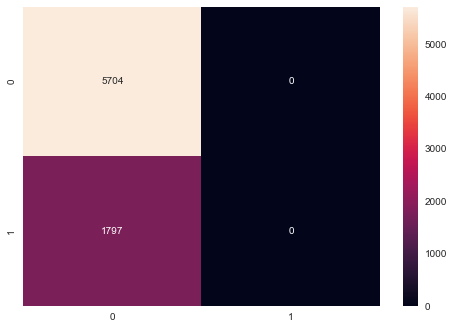

In [276]:
df_tweak_GBM_tree_smote_unscaled = tweak_threshold(best_model_GBM_tree_smote_unscaled,X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [277]:
df_tweak_GBM_tree_smote_unscaled[df_tweak_GBM_tree_smote_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
11  0.5874    0.5490  0.6611     0.2998    0.4126        0.3       Test
12  0.5746    0.6635  0.4040     0.3332    0.3652        0.4       Test
10  0.5673    0.4013  0.8859     0.2708    0.4149        0.2       Test
13  0.5441    0.7263  0.1942     0.3658    0.2537        0.5       Test
14  0.5142    0.7507  0.0601     0.3737    0.1035        0.6       Test
9   0.5141    0.2674  0.9878     0.2449    0.3925        0.1       Test
15  0.5028    0.7583  0.0122     0.3667    0.0237        0.7       Test
16  0.5005    0.7606  0.0011     0.6667    0.0022        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# GBM - Tree - SMOTE - Scaled

GBM_Tree_SMOTE_Scaled
Train Accuracy Score for model GradientBoostingClassifier() is 0.772509358376568


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11578
           1       0.81      0.07      0.12      3649

    accuracy                           0.77     15227
   macro avg       0.79      0.53      0.50     15227
weighted avg       0.78      0.77      0.69     15227

------------------------------------------------------------




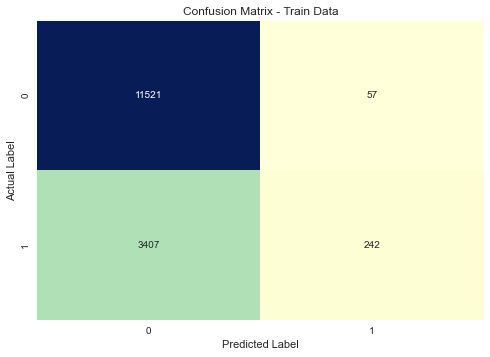



------------------------------------------------------------
AUC: 0.756


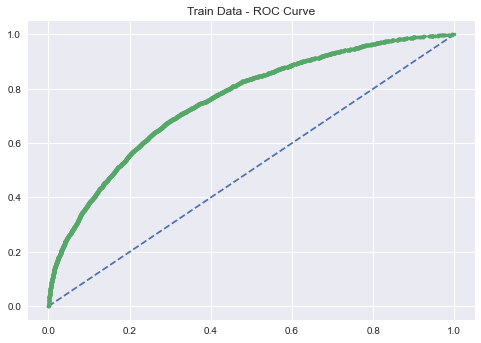



------------------------------------------------------------


Test Accuracy Score for model GradientBoostingClassifier() is 0.7621650446607119


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      5704
           1       0.55      0.04      0.08      1797

    accuracy                           0.76      7501
   macro avg       0.66      0.52      0.47      7501
weighted avg       0.71      0.76      0.68      7501

------------------------------------------------------------




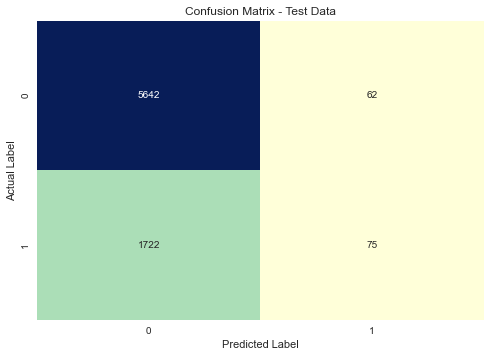



------------------------------------------------------------
AUC: 0.668


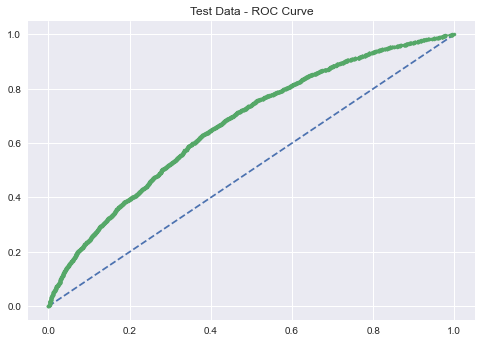



------------------------------------------------------------


In [278]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier()
df_metrics_GBM_tree_smote_scaled,best_model_GBM_tree_smote_scaled=apply_evl("GBM_Tree_SMOTE_Scaled",GB_model,
                                                              None,
                                     X_train_tree_smote_sc,X_test_tree_smote_sc,y_train_tree_smote_sc,y_test_tree_smote_sc)

In [279]:
df_metrics_GBM_tree_smote_scaled

GBM_Tree_SMOTE_Scaled_Train  \
Accuracy                                            0.772509   
Precision                                           0.809365   
Recall                                             0.0663195   
F1                                                  0.122594   
AUC                                                 0.755726   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.001918333790079...   

                                  GBM_Tree_SMOTE_Scaled_Test  
Accuracy                                            0.762165  
Precision                                           0.547445  
Recall                                             0.0417362  
F1                                                 0.0775595  
AUC                                                 0.668126  
FPR        [0.0, 0.0, 0.0, 0.0017531556802244039, 0.00175...  
TPR        [0.0, 0.0005564830272676684, 0.002225932109070...

## Tweaking Threshold

0.1 



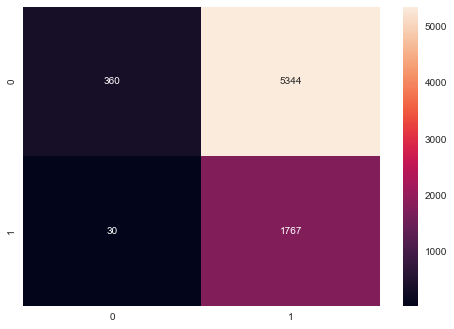

0.2 



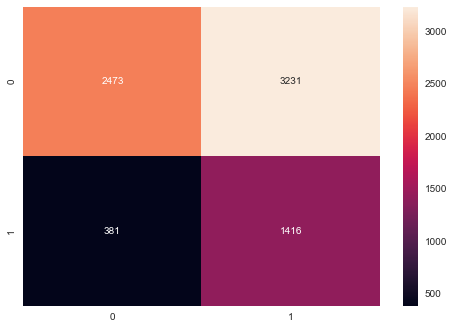

0.3 



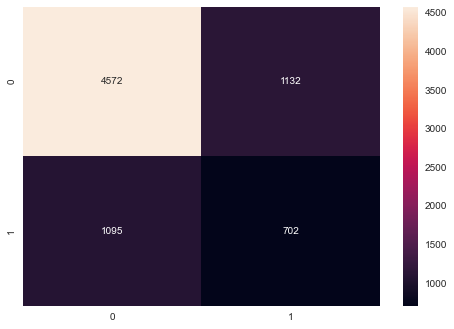

0.4 



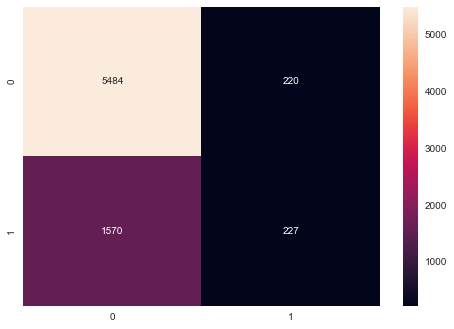

0.5 



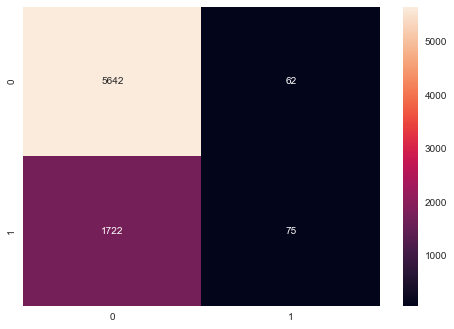

0.6 



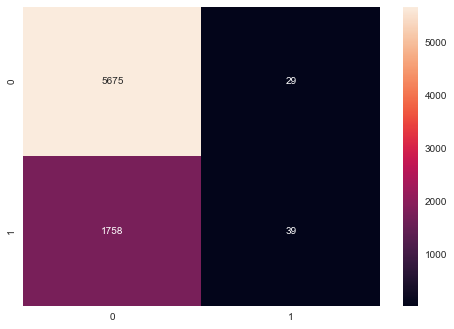

0.7 



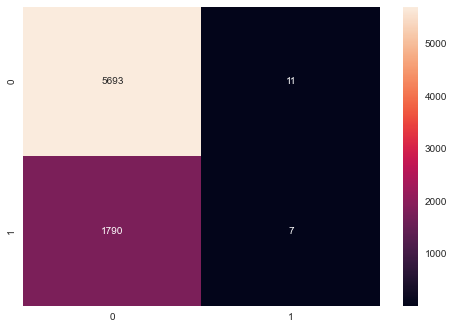

0.8 



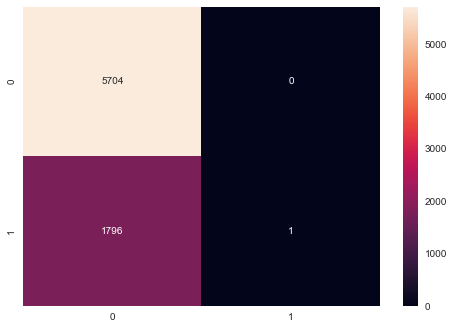

0.9 



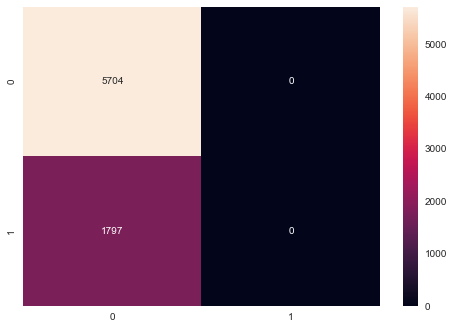

In [280]:
df_tweak_GBM_tree_smote_scaled = tweak_threshold(best_model_GBM_tree_smote_scaled,X_train_tree_smote_sc,X_test_tree_smote_sc,y_train_tree_smote_sc,y_test_tree_smote_sc)

In [281]:
df_tweak_GBM_tree_smote_scaled[df_tweak_GBM_tree_smote_scaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
10  0.6108    0.5185  0.7880     0.3047    0.4395        0.2       Test
11  0.5961    0.7031  0.3907     0.3828    0.3867        0.3       Test
12  0.5439    0.7614  0.1263     0.5078    0.2023        0.4       Test
9   0.5232    0.2836  0.9833     0.2485    0.3967        0.1       Test
13  0.5154    0.7622  0.0417     0.5474    0.0776        0.5       Test
14  0.5083    0.7618  0.0217     0.5735    0.0418        0.6       Test
15  0.5010    0.7599  0.0039     0.3889    0.0077        0.7       Test
16  0.5003    0.7606  0.0006     1.0000    0.0011        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# ADABOOST - TREE - Unscaled

ADA_Tree_Unscaled
Train Accuracy Score for model AdaBoostClassifier() is 0.7654166940303408


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11578
           1       0.59      0.07      0.13      3649

    accuracy                           0.77     15227
   macro avg       0.68      0.53      0.50     15227
weighted avg       0.73      0.77      0.69     15227

------------------------------------------------------------




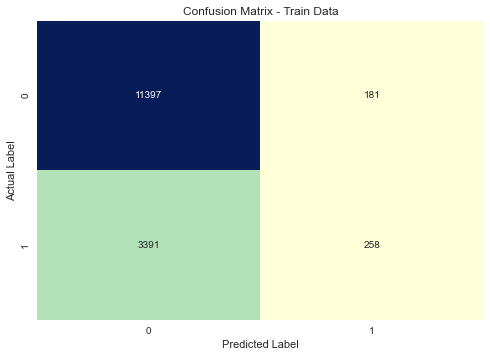



------------------------------------------------------------
AUC: 0.695


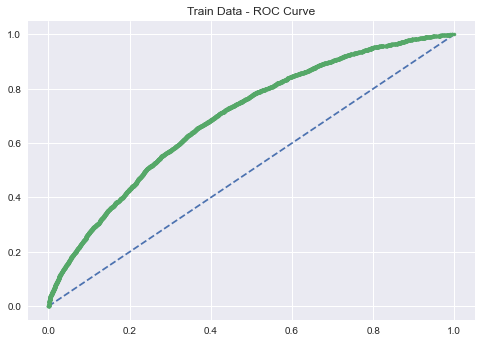



------------------------------------------------------------


Test Accuracy Score for model AdaBoostClassifier() is 0.7588321557125717


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      5704
           1       0.47      0.06      0.11      1797

    accuracy                           0.76      7501
   macro avg       0.62      0.52      0.48      7501
weighted avg       0.70      0.76      0.68      7501

------------------------------------------------------------




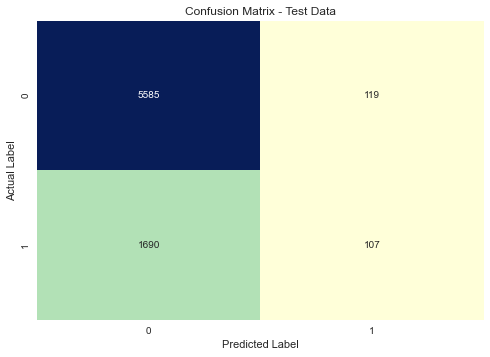



------------------------------------------------------------
AUC: 0.654


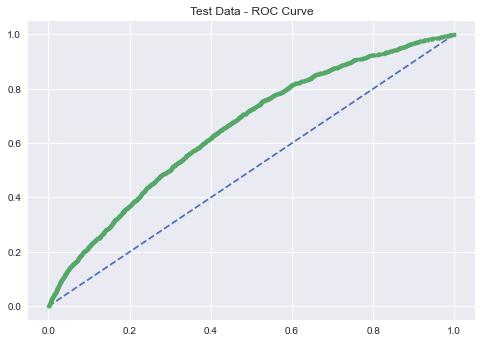



------------------------------------------------------------


In [307]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier()
df_metrics_ADA_tree_unscaled,best_model_ADA_tree_unscaled=apply_evl("ADA_Tree_Unscaled",AB_model,
                                                              None,
                                     X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [308]:
df_metrics_ADA_tree_unscaled

ADA_Tree_Unscaled_Train  \
Accuracy                                            0.765417   
Precision                                           0.587699   
Recall                                             0.0707043   
F1                                                  0.126223   
AUC                                                 0.694847   
FPR        [0.0, 0.0, 0.0, 0.00017274140611504577, 0.0001...   
TPR        [0.0, 0.0002740476842970677, 0.000548095368594...   

                                      ADA_Tree_Unscaled_Test  
Accuracy                                            0.758832  
Precision                                           0.473451  
Recall                                             0.0595437  
F1                                                  0.105783  
AUC                                                 0.653594  
FPR        [0.0, 0.0001753155680224404, 0.001051893408134...  
TPR        [0.0, 0.0, 0.0, 0.0011129660545353367, 0.00111...

## Tweak Threshold

0.1 



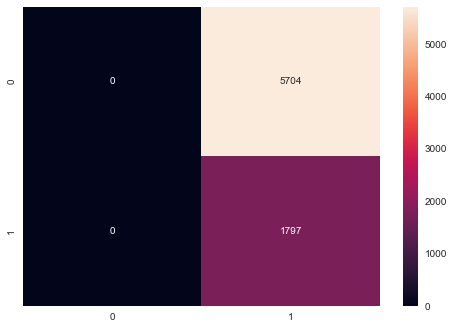

0.2 



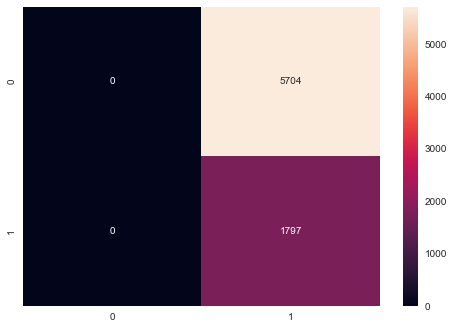

0.3 



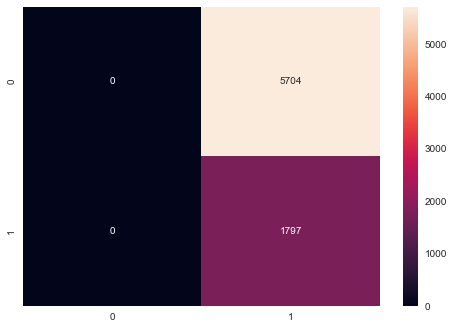

0.4 



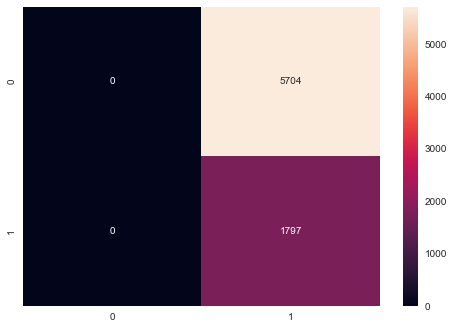

0.5 



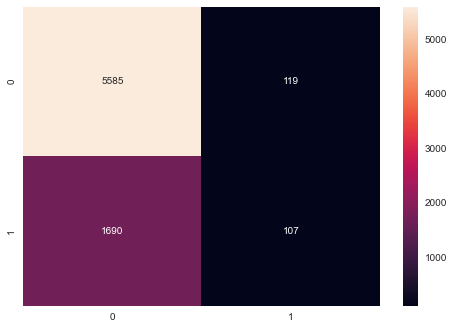

0.6 



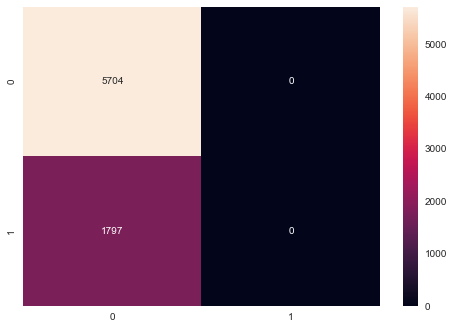

0.7 



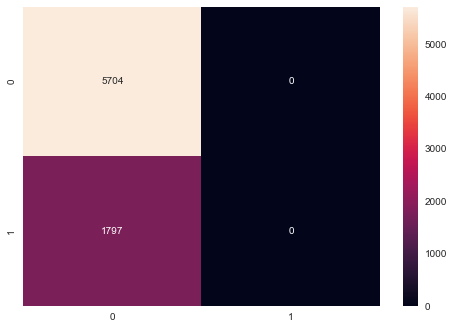

0.8 



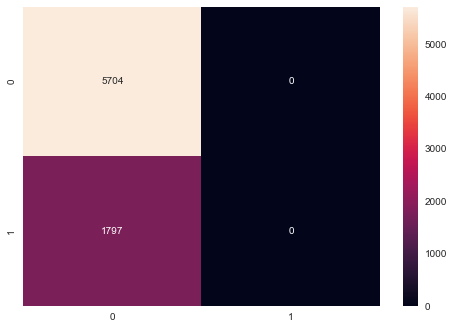

0.9 



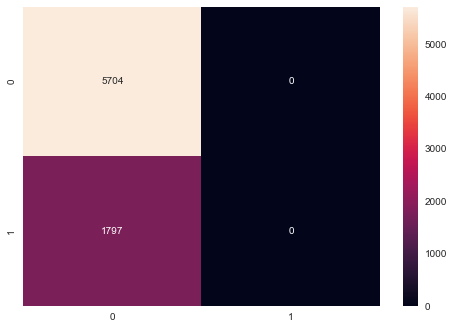

In [309]:
df_tweak_ADA_tree_unscaled = tweak_threshold(best_model_ADA_tree_unscaled,X_train_tree,X_test_tree,y_train_tree,y_test_tree)

In [310]:
df_tweak_ADA_tree_unscaled[df_tweak_ADA_tree_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
13  0.5193    0.7588  0.0595     0.4735    0.1058        0.5       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
10  0.5000    0.2396  1.0000     0.2396    0.3865        0.2       Test
11  0.5000    0.2396  1.0000     0.2396    0.3865        0.3       Test
12  0.5000    0.2396  1.0000     0.2396    0.3865        0.4       Test
14  0.5000    0.7604  0.0000     0.0000    0.0000        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# ADABOOST - TREE - Scaled

ADA_Tree_Scaled
Train Accuracy Score for model AdaBoostClassifier() is 0.7654166940303408


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11578
           1       0.59      0.07      0.13      3649

    accuracy                           0.77     15227
   macro avg       0.68      0.53      0.50     15227
weighted avg       0.73      0.77      0.69     15227

------------------------------------------------------------




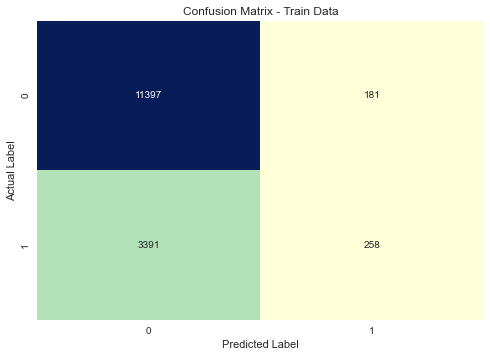



------------------------------------------------------------
AUC: 0.695


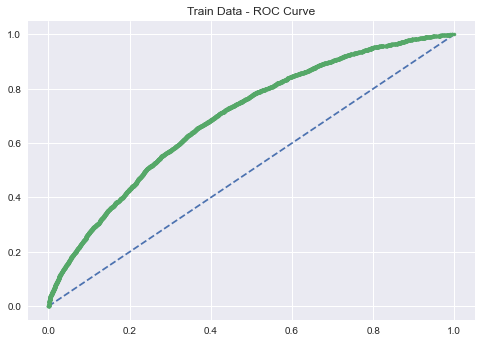



------------------------------------------------------------


Test Accuracy Score for model AdaBoostClassifier() is 0.7588321557125717


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      5704
           1       0.47      0.06      0.11      1797

    accuracy                           0.76      7501
   macro avg       0.62      0.52      0.48      7501
weighted avg       0.70      0.76      0.68      7501

------------------------------------------------------------




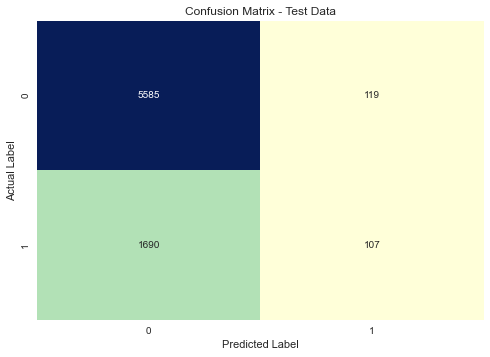



------------------------------------------------------------
AUC: 0.654


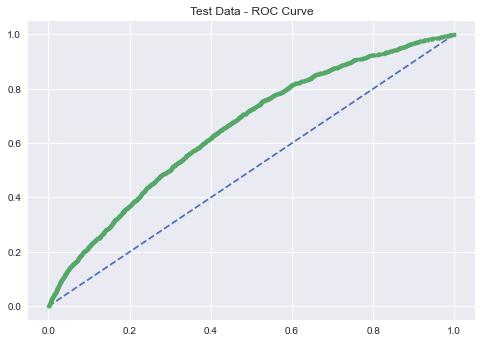



------------------------------------------------------------


In [311]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier()
df_metrics_ADA_tree_scaled,best_model_ADA_tree_scaled=apply_evl("ADA_Tree_Scaled",AB_model,
                                                              None,
                                     X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

In [312]:
df_metrics_ADA_tree_scaled

ADA_Tree_Scaled_Train  \
Accuracy                                            0.765417   
Precision                                           0.587699   
Recall                                             0.0707043   
F1                                                  0.126223   
AUC                                                 0.694847   
FPR        [0.0, 0.0, 0.0, 0.00017274140611504577, 0.0001...   
TPR        [0.0, 0.0002740476842970677, 0.000548095368594...   

                                        ADA_Tree_Scaled_Test  
Accuracy                                            0.758832  
Precision                                           0.473451  
Recall                                             0.0595437  
F1                                                  0.105783  
AUC                                                 0.653594  
FPR        [0.0, 0.0001753155680224404, 0.001051893408134...  
TPR        [0.0, 0.0, 0.0, 0.0011129660545353367, 0.00111...

## Tweak Threshold

0.1 



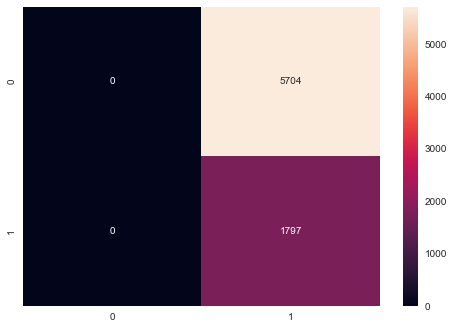

0.2 



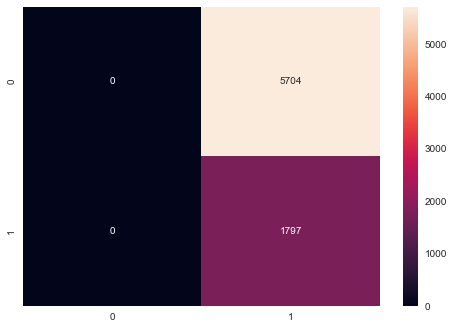

0.3 



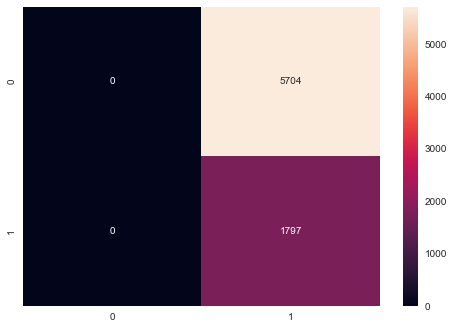

0.4 



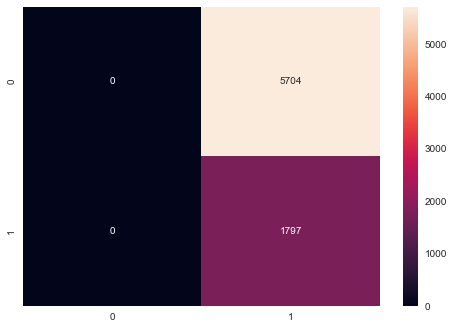

0.5 



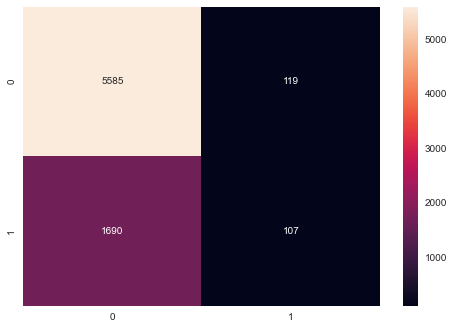

0.6 



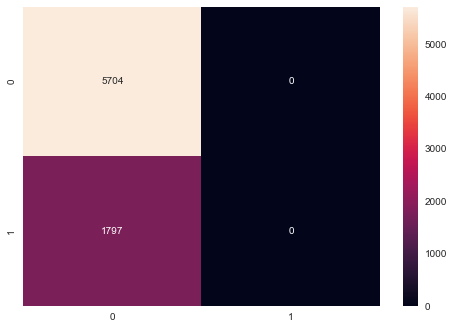

0.7 



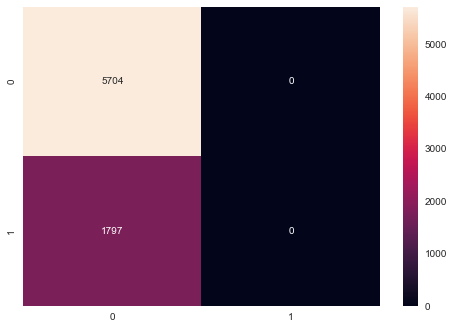

0.8 



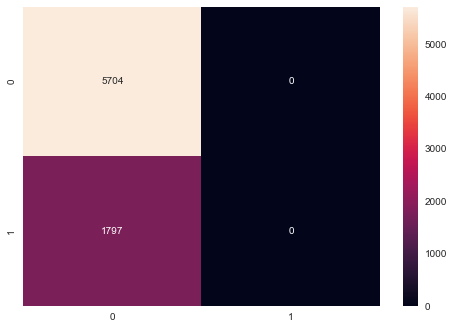

0.9 



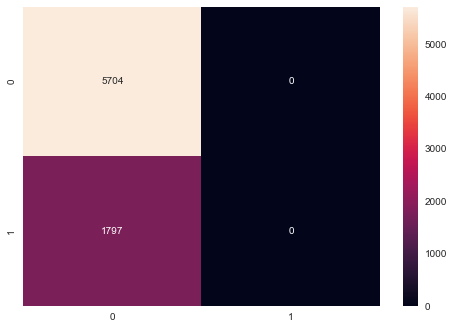

In [313]:
df_tweak_ADA_tree_scaled = tweak_threshold(best_model_ADA_tree_scaled,X_train_tree_sc,X_test_tree_sc,y_train_tree_sc,y_test_tree_sc)

In [314]:
df_tweak_ADA_tree_scaled[df_tweak_ADA_tree_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
13  0.5193    0.7588  0.0595     0.4735    0.1058        0.5       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
10  0.5000    0.2396  1.0000     0.2396    0.3865        0.2       Test
11  0.5000    0.2396  1.0000     0.2396    0.3865        0.3       Test
12  0.5000    0.2396  1.0000     0.2396    0.3865        0.4       Test
14  0.5000    0.7604  0.0000     0.0000    0.0000        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# ADABOOST - Tree - SMOTE - Unscaled

ADA_Tree_SMOTE_Unscaled
Train Accuracy Score for model AdaBoostClassifier() is 0.7720245292796684


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     11578
           1       0.77      0.77      0.77     11578

    accuracy                           0.77     23156
   macro avg       0.77      0.77      0.77     23156
weighted avg       0.77      0.77      0.77     23156

------------------------------------------------------------




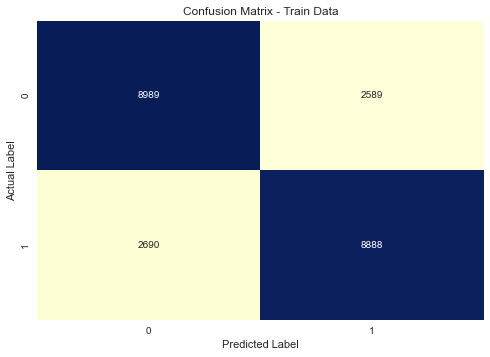



------------------------------------------------------------
AUC: 0.851


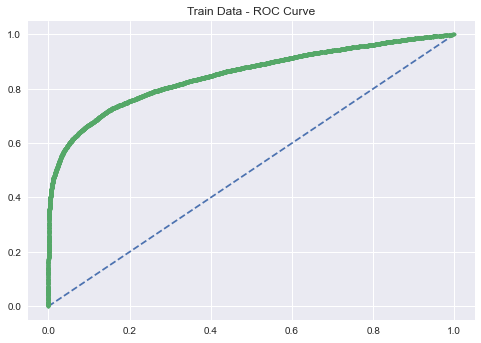



------------------------------------------------------------


Test Accuracy Score for model AdaBoostClassifier() is 0.6575123316891082


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5704
           1       0.30      0.32      0.31      1797

    accuracy                           0.66      7501
   macro avg       0.54      0.54      0.54      7501
weighted avg       0.67      0.66      0.66      7501

------------------------------------------------------------




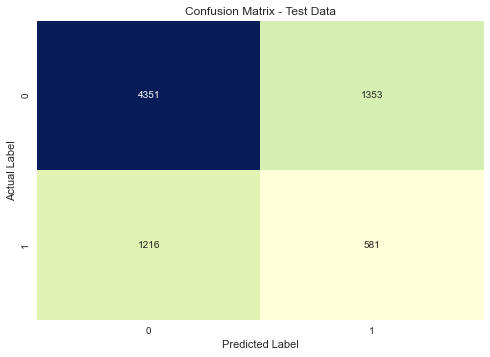



------------------------------------------------------------
AUC: 0.582


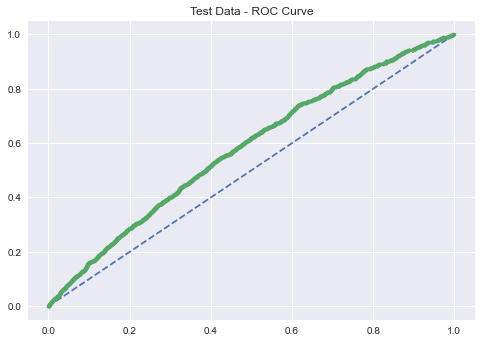



------------------------------------------------------------


In [315]:
from sklearn.ensemble import AdaBoostClassifier
AB_model = AdaBoostClassifier()
df_metrics_ADA_tree_smote_unscaled,best_model_ADA_tree_smote_unscaled=apply_evl("ADA_Tree_SMOTE_Unscaled",AB_model,
                                                              None,
                                     X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [316]:
df_metrics_ADA_tree_smote_unscaled

ADA_Tree_SMOTE_Unscaled_Train  \
Accuracy                                            0.772025   
Precision                                           0.774418   
Recall                                              0.767663   
F1                                                  0.771026   
AUC                                                 0.850956   
FPR        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
TPR        [0.0, 8.637070305752289e-05, 0.000690965624460...   

                                ADA_Tree_SMOTE_Unscaled_Test  
Accuracy                                            0.657512  
Precision                                           0.300414  
Recall                                              0.323317  
F1                                                  0.311445  
AUC                                                 0.582059  
FPR        [0.0, 0.0, 0.0001753155680224404, 0.0001753155...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweak Threshold

0.1 



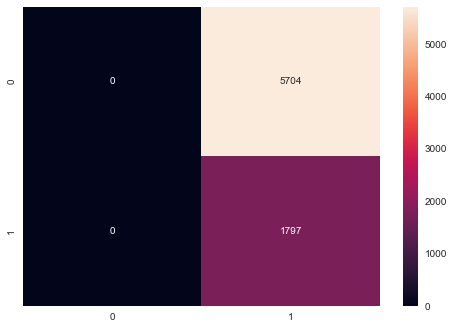

0.2 



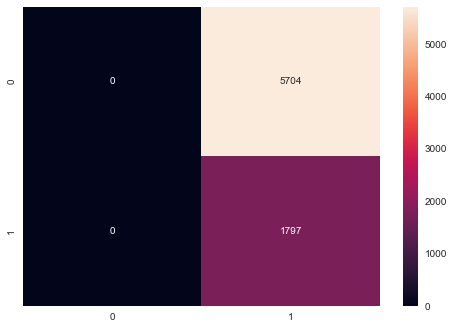

0.3 



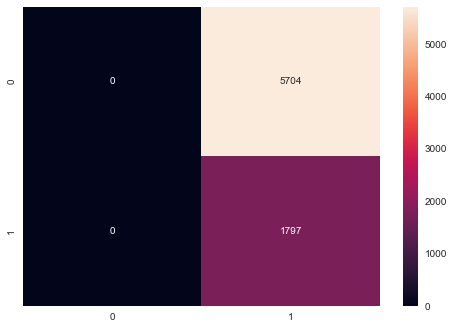

0.4 



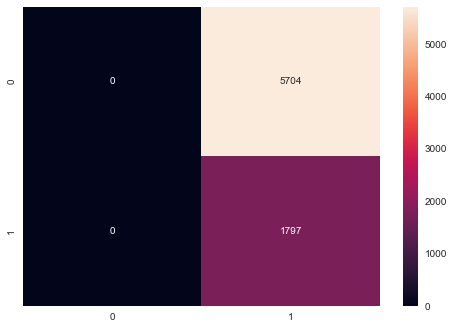

0.5 



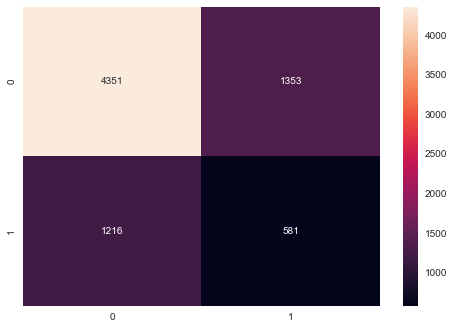

0.6 



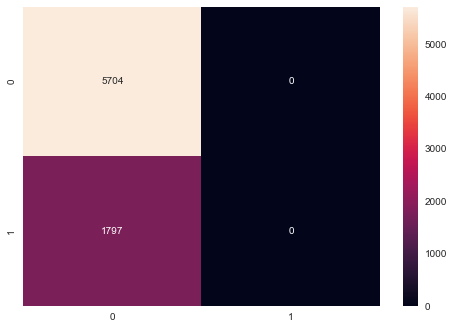

0.7 



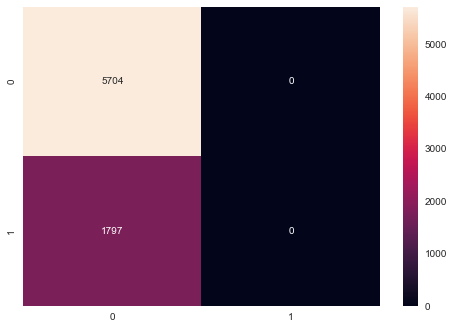

0.8 



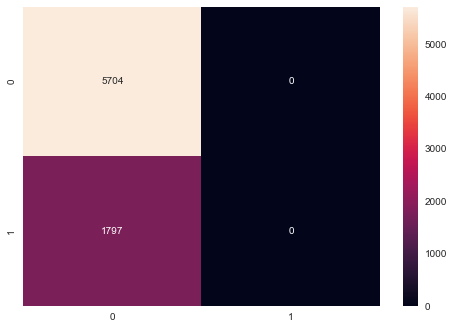

0.9 



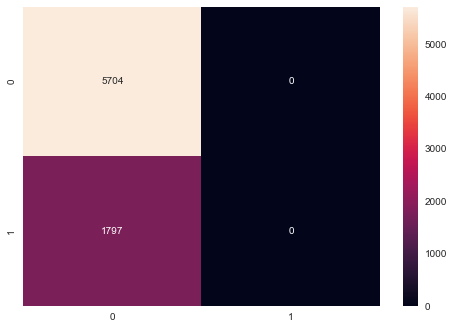

In [317]:
df_tweak_ADA_tree_smote_unscaled = tweak_threshold(best_model_ADA_tree_smote_unscaled,X_train_tree_smote,X_test_tree_smote,y_train_tree_smote,y_test_tree_smote)

In [318]:
df_tweak_ADA_tree_smote_unscaled[df_tweak_ADA_tree_smote_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
13  0.5431    0.6575  0.3233     0.3004    0.3114        0.5       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
10  0.5000    0.2396  1.0000     0.2396    0.3865        0.2       Test
11  0.5000    0.2396  1.0000     0.2396    0.3865        0.3       Test
12  0.5000    0.2396  1.0000     0.2396    0.3865        0.4       Test
14  0.5000    0.7604  0.0000     0.0000    0.0000        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# SVM - Linear - Unscaled

SVM_Linear_Unscaled
Train Accuracy Score for model SVC(probability=True) is 0.760359887042753


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11578
           1       0.00      0.00      0.00      3649

    accuracy                           0.76     15227
   macro avg       0.38      0.50      0.43     15227
weighted avg       0.58      0.76      0.66     15227

------------------------------------------------------------




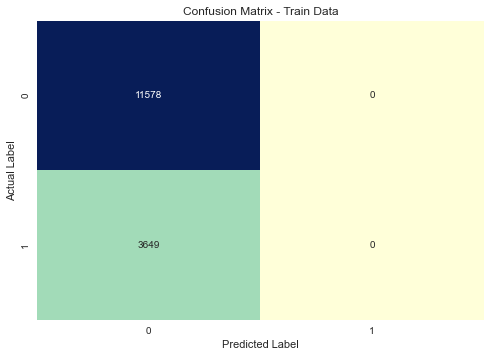



------------------------------------------------------------
AUC: 0.600


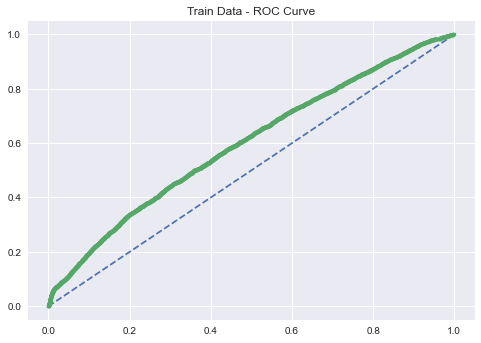



------------------------------------------------------------


Test Accuracy Score for model SVC(probability=True) is 0.760431942407679


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5704
           1       0.00      0.00      0.00      1797

    accuracy                           0.76      7501
   macro avg       0.38      0.50      0.43      7501
weighted avg       0.58      0.76      0.66      7501

------------------------------------------------------------




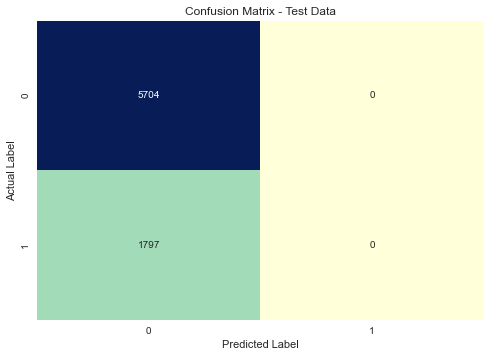



------------------------------------------------------------
AUC: 0.551


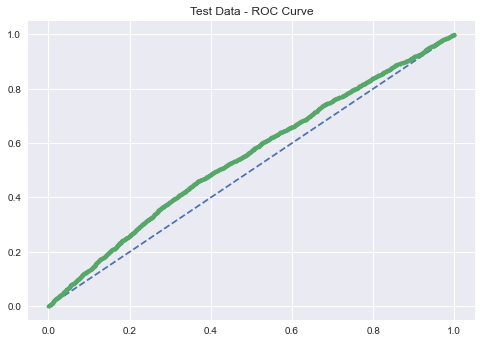



------------------------------------------------------------


In [321]:
from sklearn.svm import SVC
svm = SVC(probability=True)
df_metrics_svm_linear_unscaled,best_model_svm_linear_unscaled=apply_evl("SVM_Linear_Unscaled",svm,
                                                              None,
                                     X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [322]:
df_metrics_svm_linear_unscaled

SVM_Linear_Unscaled_Train  \
Accuracy                                             0.76036   
Precision                                                  0   
Recall                                                     0   
F1                                                         0   
AUC                                                 0.599711   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.001096190737188...   

                                    SVM_Linear_Unscaled_Test  
Accuracy                                            0.760432  
Precision                                                  0  
Recall                                                     0  
F1                                                         0  
AUC                                                 0.551063  
FPR        [0.0, 0.0, 0.001402524544179523, 0.00140252454...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



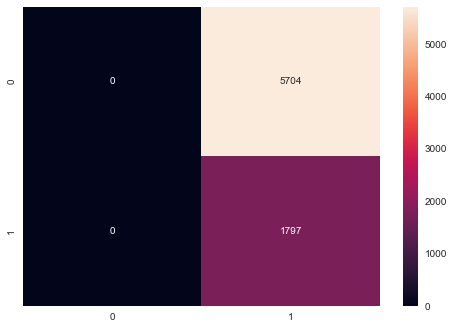

0.2 



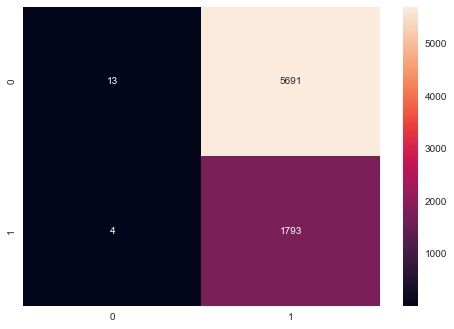

0.3 



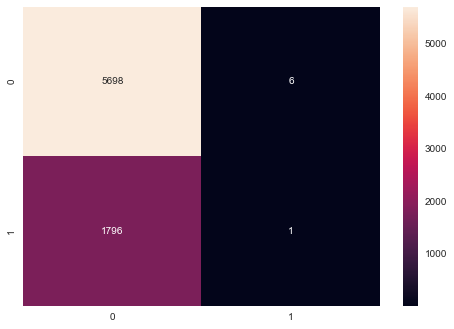

0.4 



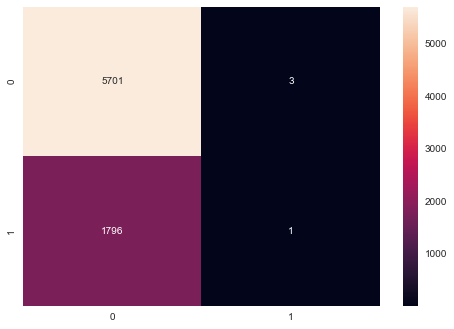

0.5 



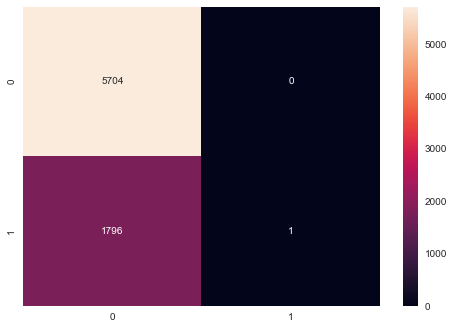

0.6 



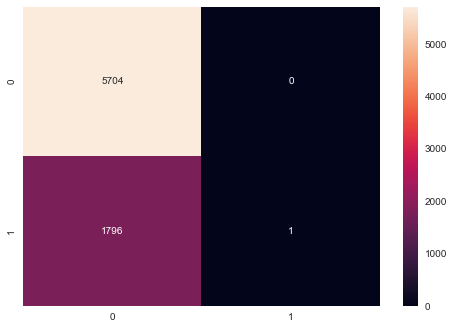

0.7 



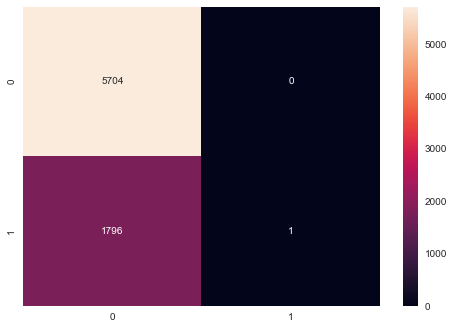

0.8 



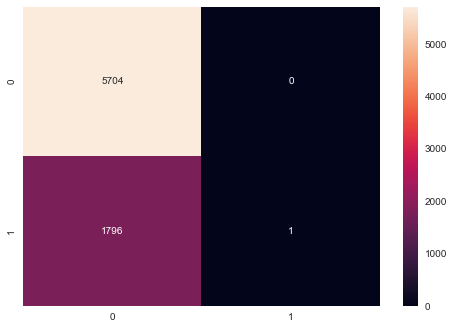

0.9 



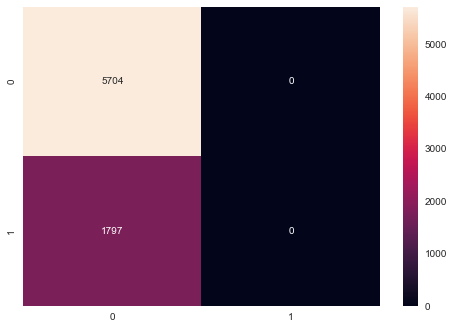

In [323]:
df_tweak_svm_linear_unscaled = tweak_threshold(best_model_svm_linear_unscaled,X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [324]:
df_tweak_svm_linear_unscaled[df_tweak_svm_linear_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
13  0.5003    0.7606  0.0006     1.0000    0.0011        0.5       Test
14  0.5003    0.7606  0.0006     1.0000    0.0011        0.6       Test
15  0.5003    0.7606  0.0006     1.0000    0.0011        0.7       Test
16  0.5003    0.7606  0.0006     1.0000    0.0011        0.8       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
10  0.5000    0.2408  0.9978     0.2396    0.3864        0.2       Test
12  0.5000    0.7602  0.0006     0.2500    0.0011        0.4       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test
11  0.4998    0.7598  0.0006     0.1429    0.0011        0.3       Test

# SVM - Linear - Scaled

SVM_Linear_Scaled
Train Accuracy Score for model SVC(probability=True) is 0.7660734222105471


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     11578
           1       1.00      0.02      0.05      3649

    accuracy                           0.77     15227
   macro avg       0.88      0.51      0.46     15227
weighted avg       0.82      0.77      0.67     15227

------------------------------------------------------------




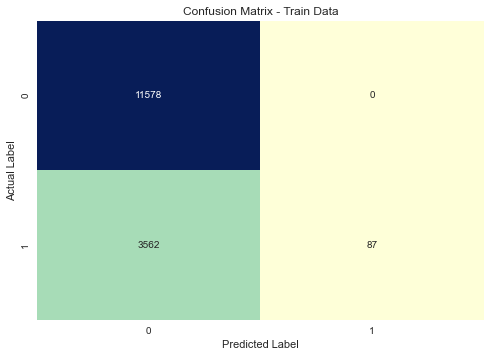



------------------------------------------------------------
AUC: 0.950


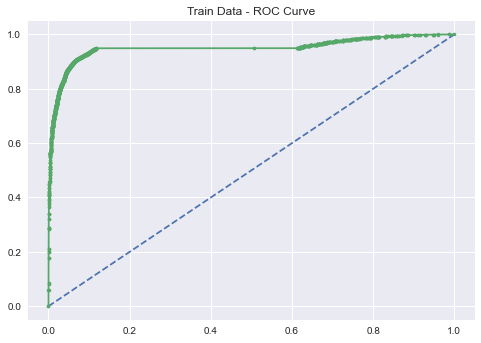



------------------------------------------------------------


Test Accuracy Score for model SVC(probability=True) is 0.760431942407679


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5704
           1       0.00      0.00      0.00      1797

    accuracy                           0.76      7501
   macro avg       0.38      0.50      0.43      7501
weighted avg       0.58      0.76      0.66      7501

------------------------------------------------------------




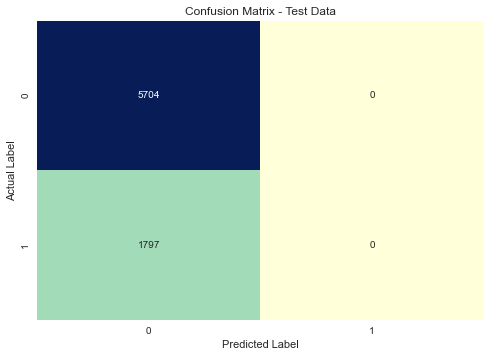



------------------------------------------------------------
AUC: 0.580


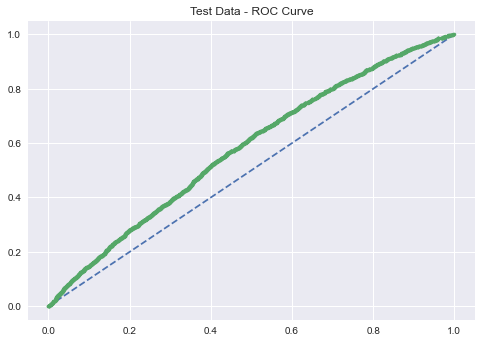



------------------------------------------------------------


In [325]:
from sklearn.svm import SVC
svm = SVC(probability=True)
df_metrics_svm_linear_scaled,best_model_svm_linear_scaled=apply_evl("SVM_Linear_Scaled",svm,
                                                              None,
                                     X_train_linear_sc,X_test_linear_sc,y_train_linear_sc,y_test_linear_sc)

In [326]:
df_metrics_svm_linear_scaled

SVM_Linear_Scaled_Train  \
Accuracy                                            0.766073   
Precision                                                  1   
Recall                                             0.0238421   
F1                                                 0.0465739   
AUC                                                 0.950397   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.060564538229651...   

                                      SVM_Linear_Scaled_Test  
Accuracy                                            0.760432  
Precision                                                  0  
Recall                                                     0  
F1                                                         0  
AUC                                                 0.580036  
FPR        [0.0, 0.0, 0.001402524544179523, 0.00140252454...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



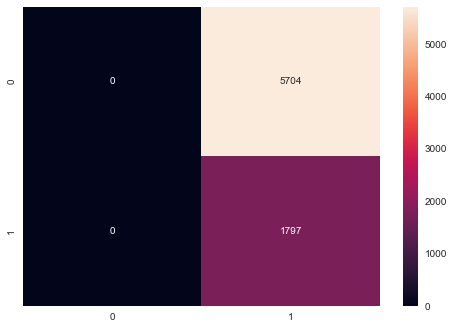

0.2 



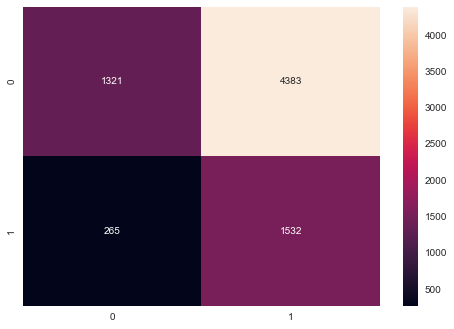

0.3 



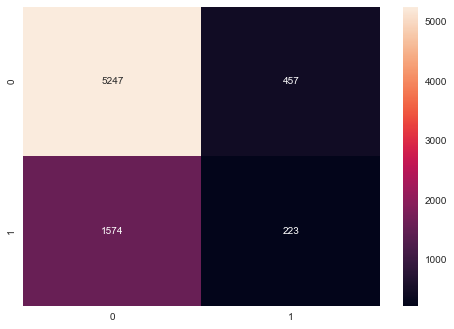

0.4 



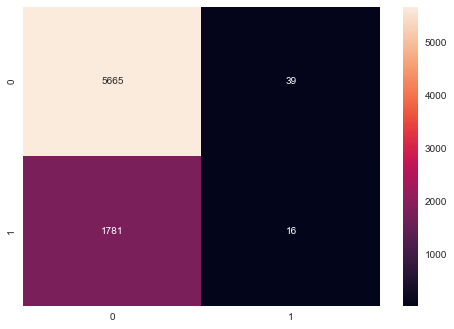

0.5 



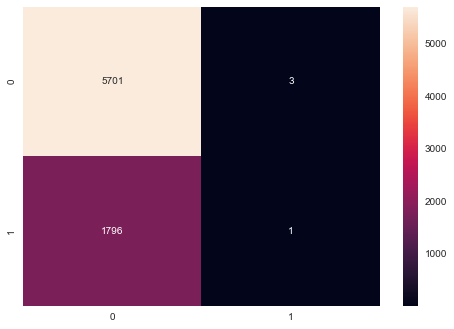

0.6 



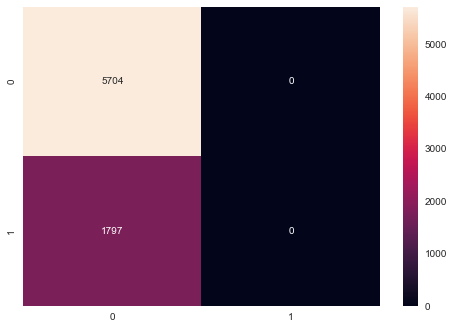

0.7 



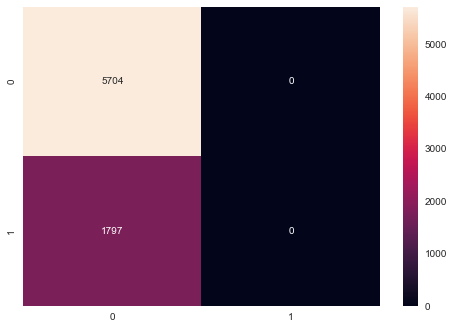

0.8 



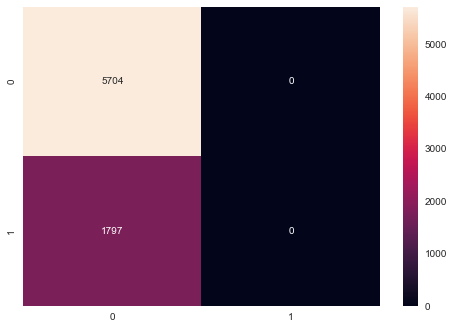

0.9 



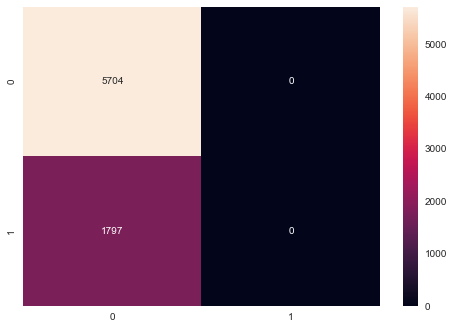

In [327]:
df_tweak_svm_linear_scaled = tweak_threshold(best_model_svm_linear_scaled,X_train_linear_sc,X_test_linear_sc,y_train_linear_sc,y_test_linear_sc)

In [328]:
df_tweak_svm_linear_scaled[df_tweak_svm_linear_scaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
10  0.5421    0.3803  0.8525     0.2590    0.3973        0.2       Test
11  0.5220    0.7292  0.1241     0.3279    0.1801        0.3       Test
12  0.5010    0.7574  0.0089     0.2909    0.0173        0.4       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
13  0.5000    0.7602  0.0006     0.2500    0.0011        0.5       Test
14  0.5000    0.7604  0.0000     0.0000    0.0000        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# LDA - Linear - Unscaled

LDA_Linear_Unscaled
Train Accuracy Score for model SVC(probability=True) is 0.760359887042753


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11578
           1       0.00      0.00      0.00      3649

    accuracy                           0.76     15227
   macro avg       0.38      0.50      0.43     15227
weighted avg       0.58      0.76      0.66     15227

------------------------------------------------------------




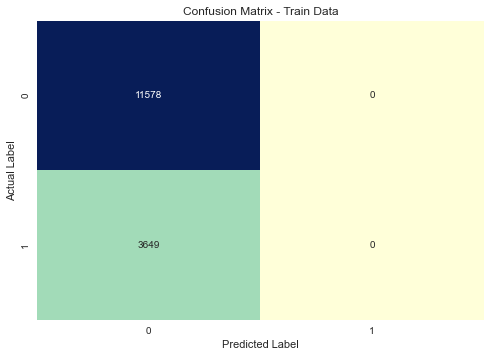



------------------------------------------------------------
AUC: 0.600


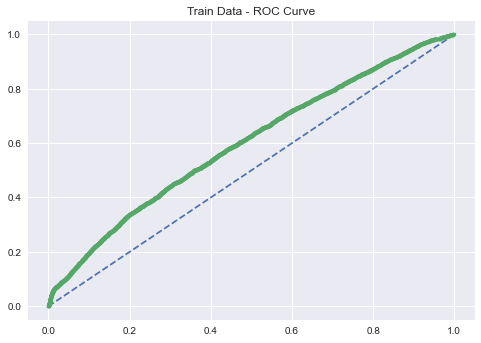



------------------------------------------------------------


Test Accuracy Score for model SVC(probability=True) is 0.760431942407679


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      5704
           1       0.00      0.00      0.00      1797

    accuracy                           0.76      7501
   macro avg       0.38      0.50      0.43      7501
weighted avg       0.58      0.76      0.66      7501

------------------------------------------------------------




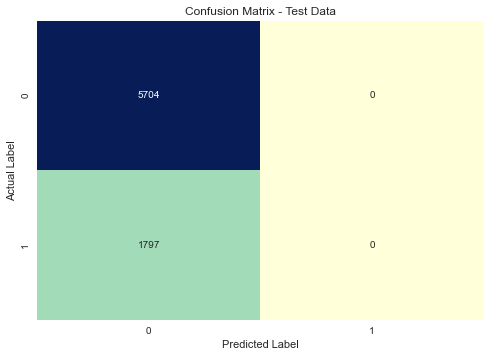



------------------------------------------------------------
AUC: 0.551


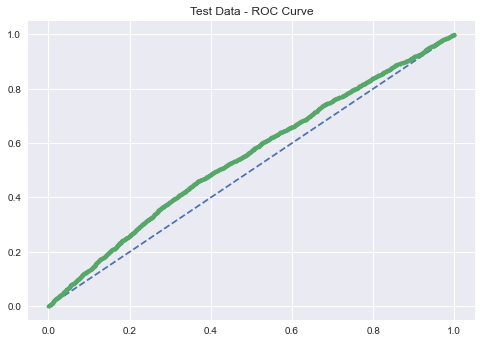



------------------------------------------------------------


In [329]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
df_metrics_lda_linear_unscaled,best_model_lda_linear_unscaled=apply_evl("LDA_Linear_Unscaled",svm,
                                                              None,
                                     X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [330]:
df_metrics_lda_linear_unscaled

LDA_Linear_Unscaled_Train  \
Accuracy                                             0.76036   
Precision                                                  0   
Recall                                                     0   
F1                                                         0   
AUC                                                 0.599711   
FPR        [0.0, 0.0, 0.0, 8.637070305752289e-05, 8.63707...   
TPR        [0.0, 0.0002740476842970677, 0.001096190737188...   

                                    LDA_Linear_Unscaled_Test  
Accuracy                                            0.760432  
Precision                                                  0  
Recall                                                     0  
F1                                                         0  
AUC                                                 0.551063  
FPR        [0.0, 0.0, 0.001402524544179523, 0.00140252454...  
TPR        [0.0, 0.0005564830272676684, 0.000556483027267...

## Tweaking Threshold

0.1 



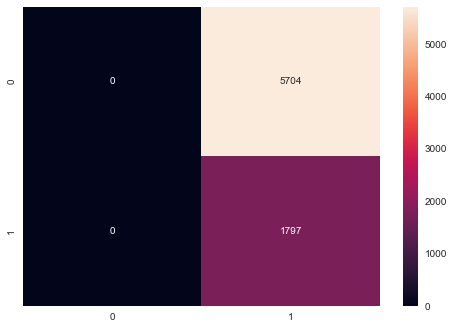

0.2 



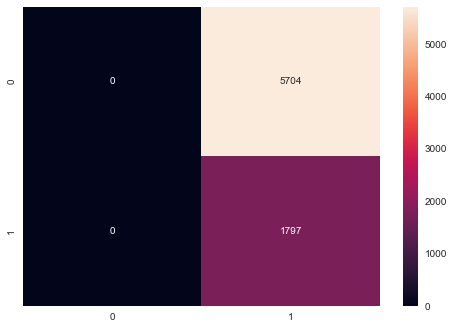

0.3 



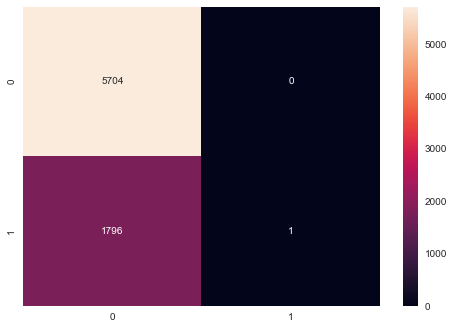

0.4 



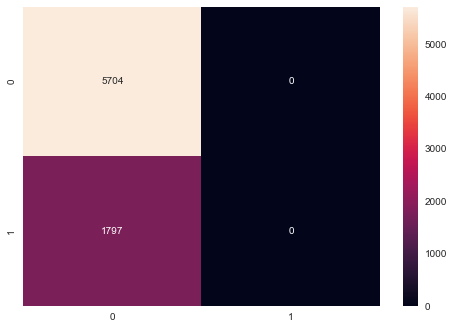

0.5 



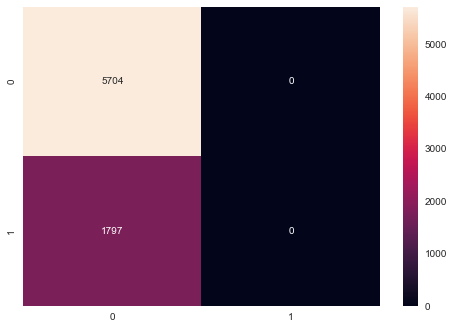

0.6 



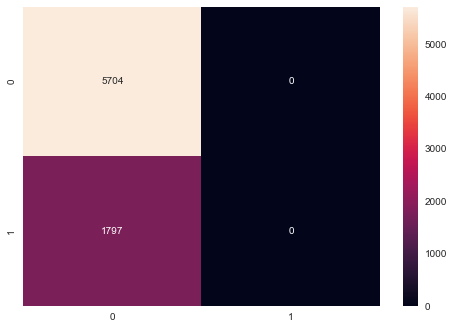

0.7 



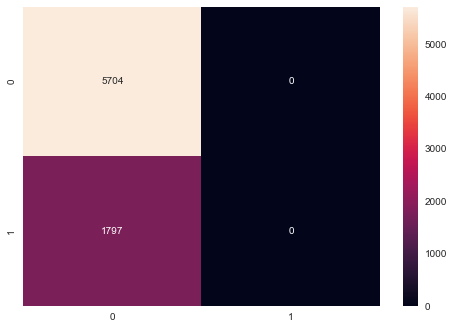

0.8 



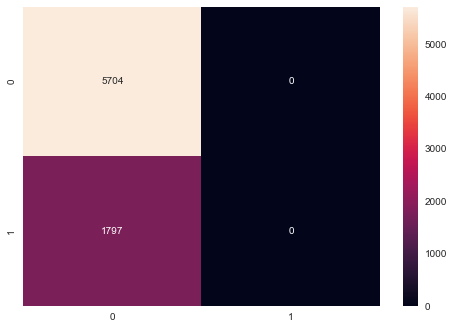

0.9 



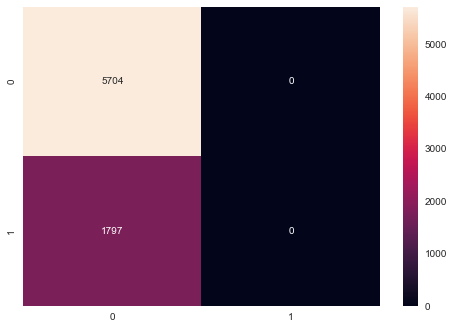

In [331]:
df_tweak_lda_linear_unscaled = tweak_threshold(best_model_lda_linear_unscaled,X_train_linear,X_test_linear,y_train_linear,y_test_linear)

In [332]:
df_tweak_lda_linear_unscaled[df_tweak_lda_linear_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

AUC  Accuracy  Recall  Precision  F1_Score  Threshold Test/Train
11  0.5003    0.7606  0.0006     1.0000    0.0011        0.3       Test
9   0.5000    0.2396  1.0000     0.2396    0.3865        0.1       Test
10  0.5000    0.2396  1.0000     0.2396    0.3865        0.2       Test
12  0.5000    0.7604  0.0000     0.0000    0.0000        0.4       Test
13  0.5000    0.7604  0.0000     0.0000    0.0000        0.5       Test
14  0.5000    0.7604  0.0000     0.0000    0.0000        0.6       Test
15  0.5000    0.7604  0.0000     0.0000    0.0000        0.7       Test
16  0.5000    0.7604  0.0000     0.0000    0.0000        0.8       Test
17  0.5000    0.7604  0.0000     0.0000    0.0000        0.9       Test

# LDA - Linear - SMOTE Unscaled

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
df_metrics_lda_linear_smote_unscaled,best_model_lda_linear_smote_unscaled=apply_evl("LDA_Linear_SMOTE_Unscaled",svm,
                                                              None,
                                     X_train_linear_smote,X_test_linear_smote,y_train_linear_smote,y_test_linear_smote)

In [ ]:
df_metrics_lda_linear_smote_unscaled

## Tweaking Threshold

In [ ]:
df_tweak_lda_linear_smote_unscaled = tweak_threshold(best_model_lda_linear_smote_unscaled,X_train_linear_smote,X_test_linear_smote,y_train_linear_smote,y_test_linear_smote)

In [ ]:
df_tweak_lda_linear_smote_unscaled[df_tweak_lda_linear_smote_unscaled['Test/Train']=='Test'].sort_values(by='AUC',ascending=False)

# ANN - OneHot - SMOTE - Scaled

In [341]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.0001)

In [342]:
# Fit the model on the training data
clf.fit(X_train_tree_smote_sc, y_train_tree_smote_sc)

Iteration 1, loss = 0.65399585
Iteration 2, loss = 0.58231183
Iteration 3, loss = 0.57085924
Iteration 4, loss = 0.56368471
Iteration 5, loss = 0.55866255
Iteration 6, loss = 0.55489924
Iteration 7, loss = 0.55194645
Iteration 8, loss = 0.54951596
Iteration 9, loss = 0.54756128
Iteration 10, loss = 0.54580356
Iteration 11, loss = 0.54435136
Iteration 12, loss = 0.54300572
Iteration 13, loss = 0.54182879
Iteration 14, loss = 0.54080838
Iteration 15, loss = 0.53985906
Iteration 16, loss = 0.53893680
Iteration 17, loss = 0.53813648
Iteration 18, loss = 0.53741787
Iteration 19, loss = 0.53666918
Iteration 20, loss = 0.53597030
Iteration 21, loss = 0.53535910
Iteration 22, loss = 0.53474106
Iteration 23, loss = 0.53416573
Iteration 24, loss = 0.53361394
Iteration 25, loss = 0.53309897
Iteration 26, loss = 0.53258659
Iteration 27, loss = 0.53211230
Iteration 28, loss = 0.53165545
Iteration 29, loss = 0.53118309
Iteration 30, loss = 0.53074198
Iteration 31, loss = 0.53027771
Iteration 32, los

Iteration 253, loss = 0.48926046
Iteration 254, loss = 0.48919367
Iteration 255, loss = 0.48902589
Iteration 256, loss = 0.48884767
Iteration 257, loss = 0.48886432
Iteration 258, loss = 0.48864264
Iteration 259, loss = 0.48862903
Iteration 260, loss = 0.48845244
Iteration 261, loss = 0.48824766
Iteration 262, loss = 0.48817590
Iteration 263, loss = 0.48792873
Iteration 264, loss = 0.48784070
Iteration 265, loss = 0.48765352
Iteration 266, loss = 0.48755212
Iteration 267, loss = 0.48756260
Iteration 268, loss = 0.48728677
Iteration 269, loss = 0.48717252
Iteration 270, loss = 0.48709009
Iteration 271, loss = 0.48699289
Iteration 272, loss = 0.48672437
Iteration 273, loss = 0.48658248
Iteration 274, loss = 0.48651940
Iteration 275, loss = 0.48637031
Iteration 276, loss = 0.48621972
Iteration 277, loss = 0.48606329
Iteration 278, loss = 0.48590549
Iteration 279, loss = 0.48580124
Iteration 280, loss = 0.48557095
Iteration 281, loss = 0.48545574
Iteration 282, loss = 0.48535865
Iteration 

Iteration 502, loss = 0.45479605
Iteration 503, loss = 0.45461107
Iteration 504, loss = 0.45446311
Iteration 505, loss = 0.45453006
Iteration 506, loss = 0.45432581
Iteration 507, loss = 0.45406119
Iteration 508, loss = 0.45385728
Iteration 509, loss = 0.45380660
Iteration 510, loss = 0.45343008
Iteration 511, loss = 0.45336527
Iteration 512, loss = 0.45304597
Iteration 513, loss = 0.45303317
Iteration 514, loss = 0.45298378
Iteration 515, loss = 0.45287519
Iteration 516, loss = 0.45261906
Iteration 517, loss = 0.45251773
Iteration 518, loss = 0.45242630
Iteration 519, loss = 0.45233868
Iteration 520, loss = 0.45210798
Iteration 521, loss = 0.45201070
Iteration 522, loss = 0.45172338
Iteration 523, loss = 0.45187344
Iteration 524, loss = 0.45148384
Iteration 525, loss = 0.45156001
Iteration 526, loss = 0.45120824
Iteration 527, loss = 0.45111304
Iteration 528, loss = 0.45098508
Iteration 529, loss = 0.45086369
Iteration 530, loss = 0.45065331
Iteration 531, loss = 0.45043633
Iteration 

Iteration 752, loss = 0.41798664
Iteration 753, loss = 0.41811590
Iteration 754, loss = 0.41798256
Iteration 755, loss = 0.41765625
Iteration 756, loss = 0.41762537
Iteration 757, loss = 0.41741850
Iteration 758, loss = 0.41751943
Iteration 759, loss = 0.41714340
Iteration 760, loss = 0.41696484
Iteration 761, loss = 0.41665896
Iteration 762, loss = 0.41666115
Iteration 763, loss = 0.41670384
Iteration 764, loss = 0.41647198
Iteration 765, loss = 0.41611214
Iteration 766, loss = 0.41618005
Iteration 767, loss = 0.41614887
Iteration 768, loss = 0.41585542
Iteration 769, loss = 0.41589158
Iteration 770, loss = 0.41532637
Iteration 771, loss = 0.41556141
Iteration 772, loss = 0.41537546
Iteration 773, loss = 0.41504261
Iteration 774, loss = 0.41514898
Iteration 775, loss = 0.41493395
Iteration 776, loss = 0.41475720
Iteration 777, loss = 0.41459129
Iteration 778, loss = 0.41446384
Iteration 779, loss = 0.41438607
Iteration 780, loss = 0.41411006
Iteration 781, loss = 0.41399877
Iteration 

Iteration 1002, loss = 0.38469739
Iteration 1003, loss = 0.38475542
Iteration 1004, loss = 0.38452830
Iteration 1005, loss = 0.38468692
Iteration 1006, loss = 0.38448385
Iteration 1007, loss = 0.38434605
Iteration 1008, loss = 0.38405870
Iteration 1009, loss = 0.38418073
Iteration 1010, loss = 0.38410166
Iteration 1011, loss = 0.38362099
Iteration 1012, loss = 0.38376046
Iteration 1013, loss = 0.38351253
Iteration 1014, loss = 0.38370038
Iteration 1015, loss = 0.38314744
Iteration 1016, loss = 0.38310533
Iteration 1017, loss = 0.38285774
Iteration 1018, loss = 0.38304951
Iteration 1019, loss = 0.38278698
Iteration 1020, loss = 0.38268950
Iteration 1021, loss = 0.38247348
Iteration 1022, loss = 0.38281260
Iteration 1023, loss = 0.38226452
Iteration 1024, loss = 0.38219407
Iteration 1025, loss = 0.38214363
Iteration 1026, loss = 0.38197629
Iteration 1027, loss = 0.38176173
Iteration 1028, loss = 0.38201927
Iteration 1029, loss = 0.38163328
Iteration 1030, loss = 0.38183508
Iteration 1031

Iteration 1243, loss = 0.35754602
Iteration 1244, loss = 0.35716601
Iteration 1245, loss = 0.35717011
Iteration 1246, loss = 0.35706387
Iteration 1247, loss = 0.35720832
Iteration 1248, loss = 0.35674256
Iteration 1249, loss = 0.35686237
Iteration 1250, loss = 0.35655975
Iteration 1251, loss = 0.35653088
Iteration 1252, loss = 0.35615829
Iteration 1253, loss = 0.35620166
Iteration 1254, loss = 0.35622058
Iteration 1255, loss = 0.35581250
Iteration 1256, loss = 0.35566799
Iteration 1257, loss = 0.35534255
Iteration 1258, loss = 0.35572965
Iteration 1259, loss = 0.35579983
Iteration 1260, loss = 0.35569387
Iteration 1261, loss = 0.35533767
Iteration 1262, loss = 0.35520499
Iteration 1263, loss = 0.35515953
Iteration 1264, loss = 0.35488706
Iteration 1265, loss = 0.35508951
Iteration 1266, loss = 0.35475983
Iteration 1267, loss = 0.35477713
Iteration 1268, loss = 0.35455662
Iteration 1269, loss = 0.35433804
Iteration 1270, loss = 0.35477365
Iteration 1271, loss = 0.35439633
Iteration 1272

Iteration 1485, loss = 0.33236704
Iteration 1486, loss = 0.33221349
Iteration 1487, loss = 0.33261607
Iteration 1488, loss = 0.33220379
Iteration 1489, loss = 0.33214458
Iteration 1490, loss = 0.33162628
Iteration 1491, loss = 0.33217679
Iteration 1492, loss = 0.33157929
Iteration 1493, loss = 0.33185651
Iteration 1494, loss = 0.33153525
Iteration 1495, loss = 0.33162759
Iteration 1496, loss = 0.33167498
Iteration 1497, loss = 0.33149922
Iteration 1498, loss = 0.33105090
Iteration 1499, loss = 0.33069835
Iteration 1500, loss = 0.33088326
Iteration 1501, loss = 0.33113324
Iteration 1502, loss = 0.33094831
Iteration 1503, loss = 0.33080636
Iteration 1504, loss = 0.33091303
Iteration 1505, loss = 0.33076103
Iteration 1506, loss = 0.33100159
Iteration 1507, loss = 0.33020147
Iteration 1508, loss = 0.33002317
Iteration 1509, loss = 0.33029098
Iteration 1510, loss = 0.32981702
Iteration 1511, loss = 0.32997382
Iteration 1512, loss = 0.32973025
Iteration 1513, loss = 0.32979888
Iteration 1514

Iteration 1727, loss = 0.31049984
Iteration 1728, loss = 0.30975305
Iteration 1729, loss = 0.31000321
Iteration 1730, loss = 0.31037456
Iteration 1731, loss = 0.30984882
Iteration 1732, loss = 0.30944585
Iteration 1733, loss = 0.30972844
Iteration 1734, loss = 0.30956818
Iteration 1735, loss = 0.30951014
Iteration 1736, loss = 0.30968345
Iteration 1737, loss = 0.30918811
Iteration 1738, loss = 0.30942982
Iteration 1739, loss = 0.30900839
Iteration 1740, loss = 0.30897566
Iteration 1741, loss = 0.30873771
Iteration 1742, loss = 0.30900243
Iteration 1743, loss = 0.30873458
Iteration 1744, loss = 0.30850022
Iteration 1745, loss = 0.30841663
Iteration 1746, loss = 0.30858067
Iteration 1747, loss = 0.30804948
Iteration 1748, loss = 0.30810606
Iteration 1749, loss = 0.30875187
Iteration 1750, loss = 0.30843498
Iteration 1751, loss = 0.30811928
Iteration 1752, loss = 0.30836890
Iteration 1753, loss = 0.30860377
Iteration 1754, loss = 0.30779485
Iteration 1755, loss = 0.30772716
Iteration 1756

Iteration 1968, loss = 0.29091067
Iteration 1969, loss = 0.29061358
Iteration 1970, loss = 0.29055970
Iteration 1971, loss = 0.29064080
Iteration 1972, loss = 0.29001804
Iteration 1973, loss = 0.29073614
Iteration 1974, loss = 0.29014804
Iteration 1975, loss = 0.29035920
Iteration 1976, loss = 0.29040447
Iteration 1977, loss = 0.29034614
Iteration 1978, loss = 0.29030134
Iteration 1979, loss = 0.28976285
Iteration 1980, loss = 0.28960535
Iteration 1981, loss = 0.28956590
Iteration 1982, loss = 0.28938223
Iteration 1983, loss = 0.28956195
Iteration 1984, loss = 0.28970402
Iteration 1985, loss = 0.29028655
Iteration 1986, loss = 0.28890116
Iteration 1987, loss = 0.28924921
Iteration 1988, loss = 0.28926456
Iteration 1989, loss = 0.28936398
Iteration 1990, loss = 0.28912916
Iteration 1991, loss = 0.28883029
Iteration 1992, loss = 0.29009981
Iteration 1993, loss = 0.28883488
Iteration 1994, loss = 0.28914101
Iteration 1995, loss = 0.28840751
Iteration 1996, loss = 0.28831960
Iteration 1997

Iteration 2209, loss = 0.27320234
Iteration 2210, loss = 0.27314613
Iteration 2211, loss = 0.27355365
Iteration 2212, loss = 0.27299252
Iteration 2213, loss = 0.27317901
Iteration 2214, loss = 0.27308153
Iteration 2215, loss = 0.27318105
Iteration 2216, loss = 0.27389110
Iteration 2217, loss = 0.27304261
Iteration 2218, loss = 0.27287187
Iteration 2219, loss = 0.27263266
Iteration 2220, loss = 0.27255735
Iteration 2221, loss = 0.27253171
Iteration 2222, loss = 0.27302824
Iteration 2223, loss = 0.27219751
Iteration 2224, loss = 0.27265082
Iteration 2225, loss = 0.27263543
Iteration 2226, loss = 0.27224021
Iteration 2227, loss = 0.27229085
Iteration 2228, loss = 0.27285854
Iteration 2229, loss = 0.27252325
Iteration 2230, loss = 0.27210144
Iteration 2231, loss = 0.27155776
Iteration 2232, loss = 0.27200256
Iteration 2233, loss = 0.27161255
Iteration 2234, loss = 0.27187522
Iteration 2235, loss = 0.27182393
Iteration 2236, loss = 0.27165710
Iteration 2237, loss = 0.27112797
Iteration 2238

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', verbose=True)

In [335]:
# use the model to predict the training data
y_pred = clf.predict(X_train_tree_smote_sc)

In [336]:
confusion_matrix(y_train_tree_smote_sc,y_pred)

array([[11526,    52],
       [ 3607,    42]], dtype=int64)

In [337]:
print(classification_report(y_train_tree_smote_sc, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11578
           1       0.45      0.01      0.02      3649

    accuracy                           0.76     15227
   macro avg       0.60      0.50      0.44     15227
weighted avg       0.69      0.76      0.66     15227



In [338]:
y_pred = clf.predict(X_test_tree_smote_sc)

In [339]:
confusion_matrix(y_test_tree_smote_sc, y_pred)

array([[5672,   32],
       [1780,   17]], dtype=int64)

In [340]:
print(classification_report(y_test_tree_smote_sc, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      5704
           1       0.35      0.01      0.02      1797

    accuracy                           0.76      7501
   macro avg       0.55      0.50      0.44      7501
weighted avg       0.66      0.76      0.66      7501



# All DFs

In [421]:
alldfs = [var for var in dir() if isinstance(eval(var), pd.core.frame.DataFrame)]

In [511]:
allmodels = dir()
allmodels_str = [x for x in allmodels if search('best_model',str(x))]
allmodels_str

['best_model_ADA_tree_scaled',
 'best_model_ADA_tree_smote_unscaled',
 'best_model_ADA_tree_unscaled',
 'best_model_GBM_tree_scaled',
 'best_model_GBM_tree_smote_scaled',
 'best_model_GBM_tree_smote_unscaled',
 'best_model_GBM_tree_unscaled',
 'best_model_NB_linear_scaled',
 'best_model_NB_linear_smote_scaled',
 'best_model_NB_linear_smote_unscaled',
 'best_model_NB_linear_unscaled',
 'best_model_RF_tree_smote_unscaled',
 'best_model_RF_tree_unscaled',
 'best_model_XGB_tree_scaled',
 'best_model_XGB_tree_unscaled',
 'best_model_lda_linear_unscaled',
 'best_model_logit_linear_scaled',
 'best_model_logit_linear_smote_scaled',
 'best_model_logit_linear_smote_unscaled',
 'best_model_logit_linear_unscaled',
 'best_model_smote_lr',
 'best_model_smote_rf',
 'best_model_smote_scaled_lr',
 'best_model_smote_scaled_lr_saga',
 'best_model_svm_linear_scaled',
 'best_model_svm_linear_unscaled']

In [600]:
pd.DataFrame(allmodels_str,columns=["Model_Name"])

Model_Name
0               best_model_ADA_tree_scaled
1       best_model_ADA_tree_smote_unscaled
2             best_model_ADA_tree_unscaled
3               best_model_GBM_tree_scaled
4         best_model_GBM_tree_smote_scaled
5       best_model_GBM_tree_smote_unscaled
6             best_model_GBM_tree_unscaled
7              best_model_NB_linear_scaled
8        best_model_NB_linear_smote_scaled
9      best_model_NB_linear_smote_unscaled
10           best_model_NB_linear_unscaled
11       best_model_RF_tree_smote_unscaled
12             best_model_RF_tree_unscaled
13              best_model_XGB_tree_scaled
14            best_model_XGB_tree_unscaled
15          best_model_lda_linear_unscaled
16          best_model_logit_linear_scaled
17    best_model_logit_linear_smote_scaled
18  best_model_logit_linear_smote_unscaled
19        best_model_logit_linear_unscaled
20                     best_model_smote_lr
21                     best_model_smote_rf
22              best_model_smote_scaled_lr
23         best_model_smote_scaled_lr_saga
24            best_model_svm_linear_scaled
25          best_model_svm_linear_unscaled

In [512]:
allmodels=[best_model_ADA_tree_scaled,
 best_model_ADA_tree_smote_unscaled,
 best_model_ADA_tree_unscaled,
 best_model_GBM_tree_scaled,
 best_model_GBM_tree_smote_scaled,
 best_model_GBM_tree_smote_unscaled,
 best_model_GBM_tree_unscaled,
 best_model_NB_linear_scaled,
 best_model_NB_linear_smote_scaled,
 best_model_NB_linear_smote_unscaled,
 best_model_NB_linear_unscaled,
 best_model_RF_tree_smote_unscaled,
 best_model_RF_tree_unscaled,
 best_model_XGB_tree_scaled,
 best_model_XGB_tree_unscaled,
 best_model_lda_linear_unscaled,
 best_model_logit_linear_scaled,
 best_model_logit_linear_smote_scaled,
 best_model_logit_linear_smote_unscaled,
 best_model_logit_linear_unscaled,
 best_model_svm_linear_scaled,
 best_model_svm_linear_unscaled]

In [513]:
allmodels_tree_str=[x for x in allmodels_str if search('tree',str(x))]
allmodels_tree_str

['best_model_ADA_tree_scaled',
 'best_model_ADA_tree_smote_unscaled',
 'best_model_ADA_tree_unscaled',
 'best_model_GBM_tree_scaled',
 'best_model_GBM_tree_smote_scaled',
 'best_model_GBM_tree_smote_unscaled',
 'best_model_GBM_tree_unscaled',
 'best_model_RF_tree_smote_unscaled',
 'best_model_RF_tree_unscaled',
 'best_model_XGB_tree_scaled',
 'best_model_XGB_tree_unscaled']

In [515]:
allmodels_tree=[best_model_ADA_tree_scaled,
 best_model_ADA_tree_smote_unscaled,
 best_model_ADA_tree_unscaled,
 best_model_GBM_tree_scaled,
 best_model_GBM_tree_smote_scaled,
 best_model_GBM_tree_smote_unscaled,
 best_model_GBM_tree_unscaled,
 best_model_RF_tree_smote_unscaled,
 best_model_RF_tree_unscaled,
 best_model_XGB_tree_scaled,
 best_model_XGB_tree_unscaled]

In [514]:
allmodels_linear_str=[x for x in allmodels_str if search('linear',str(x))]
allmodels_linear_str

['best_model_NB_linear_scaled',
 'best_model_NB_linear_smote_scaled',
 'best_model_NB_linear_smote_unscaled',
 'best_model_NB_linear_unscaled',
 'best_model_lda_linear_unscaled',
 'best_model_logit_linear_scaled',
 'best_model_logit_linear_smote_scaled',
 'best_model_logit_linear_smote_unscaled',
 'best_model_logit_linear_unscaled',
 'best_model_svm_linear_scaled',
 'best_model_svm_linear_unscaled']

In [516]:
allmodels_linear=[best_model_NB_linear_scaled,
 best_model_NB_linear_smote_scaled,
 best_model_NB_linear_smote_unscaled,
 best_model_NB_linear_unscaled,
 best_model_lda_linear_unscaled,
 best_model_logit_linear_scaled,
 best_model_logit_linear_smote_scaled,
 best_model_logit_linear_smote_unscaled,
 best_model_logit_linear_unscaled,
 best_model_svm_linear_scaled,
 best_model_svm_linear_unscaled]

In [426]:
all_tweak_df_lst_str=[x for x in alldfs if search('df_tweak',str(x))]

In [423]:
all_tweak_df_lst=[df_tweak_ADA_tree_scaled,
 df_tweak_ADA_tree_smote_unscaled,
 df_tweak_ADA_tree_unscaled,
 df_tweak_GBM_tree_scaled,
 df_tweak_GBM_tree_smote_scaled,
 df_tweak_GBM_tree_smote_unscaled,
 df_tweak_GBM_tree_unscaled,
 df_tweak_NB_linear_scaled,
 df_tweak_NB_linear_smote_scaled,
 df_tweak_NB_linear_smote_unscaled,
 df_tweak_NB_linear_unscaled,
 df_tweak_RF_tree_smote_unscaled,
 df_tweak_RF_tree_unscaled,
 df_tweak_XGB_tree_scaled,
 df_tweak_XGB_tree_unscaled,
 df_tweak_lda_linear_unscaled,
 df_tweak_logit_linear_scaled,
 df_tweak_logit_linear_smote_scaled,
 df_tweak_logit_linear_smote_unscaled,
 df_tweak_logit_linear_unscaled,
 df_tweak_svm_linear_scaled,
 df_tweak_svm_linear_unscaled]

In [425]:
all_metrics_df_lst_str=[x for x in alldfs if search('df_metric',str(x))]

In [396]:
all_metrics_df_lst=[df_metrics_ADA_tree_scaled,
 df_metrics_ADA_tree_smote_unscaled,
 df_metrics_ADA_tree_unscaled,
 df_metrics_GBM_tree_scaled,
 df_metrics_GBM_tree_smote_scaled,
 df_metrics_GBM_tree_smote_unscaled,
 df_metrics_GBM_tree_unscaled,
 df_metrics_NB_linear_scaled,
 df_metrics_NB_linear_smote_scaled,
 df_metrics_NB_linear_smote_unscaled,
 df_metrics_NB_linear_unscaled,
 df_metrics_RF_tree_smote_unscaled,
 df_metrics_RF_tree_unscaled,
 df_metrics_XGB_tree_scaled,
 df_metrics_XGB_tree_unscaled,
 df_metrics_lda_linear_unscaled,
 df_metrics_logit_linear_scaled,
 df_metrics_logit_linear_smote_scaled,
 df_metrics_logit_linear_smote_unscaled,
 df_metrics_logit_linear_unscaled,
 df_metrics_svm_linear_scaled,
 df_metrics_svm_linear_unscaled]

# Comparison

Tweaked models sorted on the basis of AUC score

## Comparison of Tweaked Models

In [441]:
df_top_tweaks=pd.DataFrame(columns=all_tweak_df_lst[0].columns)
df_top_tweaks['Model_Name']=""
for i in np.arange(0,len(all_tweak_df_lst)):
    temp_df=all_tweak_df_lst[i][all_tweak_df_lst[i]['Test/Train']=='Test'].sort_values(by='AUC',ascending=False).head(1)
    temp_df['Model_Name']=all_tweak_df_lst_str[i]
    df_top_tweaks=pd.concat([df_top_tweaks,temp_df],axis=0)
df_top_tweaks=df_top_tweaks.set_index("Model_Name")
df_top_tweaks=df_top_tweaks.sort_values(by='AUC',ascending=False)
df_top_tweaks.drop(columns=["Test/Train"],inplace=True)
df_top_tweaks

AUC  Accuracy  Recall  Precision  \
Model_Name                                                                  
df_tweak_GBM_tree_scaled              0.6110    0.5186  0.7885     0.3049   
df_tweak_GBM_tree_unscaled            0.6110    0.5185  0.7885     0.3048   
df_tweak_GBM_tree_smote_scaled        0.6108    0.5185  0.7880     0.3047   
df_tweak_XGB_tree_unscaled            0.6034    0.6081  0.5943     0.3257   
df_tweak_XGB_tree_scaled              0.6032    0.6078  0.5943     0.3255   
df_tweak_RF_tree_unscaled             0.6019    0.6783  0.4552     0.3632   
df_tweak_RF_tree_smote_unscaled       0.5909    0.5091  0.7479     0.2939   
df_tweak_GBM_tree_smote_unscaled      0.5874    0.5490  0.6611     0.2998   
df_tweak_logit_linear_smote_scaled    0.5831    0.5022  0.7385     0.2890   
df_tweak_logit_linear_scaled          0.5824    0.5002  0.7401     0.2884   
df_tweak_logit_linear_smote_unscaled  0.5760    0.5793  0.5698     0.3006   
df_tweak_NB_linear_unscaled           0.5724    0.5906  0.5376     0.3013   
df_tweak_NB_linear_smote_scaled       0.5479    0.5939  0.4597     0.2847   
df_tweak_NB_linear_scaled             0.5479    0.5939  0.4597     0.2847   
df_tweak_ADA_tree_smote_unscaled      0.5431    0.6575  0.3233     0.3004   
df_tweak_svm_linear_scaled            0.5421    0.3803  0.8525     0.2590   
df_tweak_logit_linear_unscaled        0.5385    0.6483  0.3278     0.2917   
df_tweak_NB_linear_smote_unscaled     0.5280    0.4001  0.7735     0.2535   
df_tweak_ADA_tree_scaled              0.5193    0.7588  0.0595     0.4735   
df_tweak_ADA_tree_unscaled            0.5193    0.7588  0.0595     0.4735   
df_tweak_lda_linear_unscaled          0.5003    0.7606  0.0006     1.0000   
df_tweak_svm_linear_unscaled          0.5003    0.7606  0.0006     1.0000   

                                      F1_Score  Threshold  
Model_Name                                                 
df_tweak_GBM_tree_scaled                0.4397        0.2  
df_tweak_GBM_tree_unscaled              0.4397        0.2  
df_tweak_GBM_tree_smote_scaled          0.4395        0.2  
df_tweak_XGB_tree_unscaled              0.4208        0.2  
df_tweak_XGB_tree_scaled                0.4206        0.2  
df_tweak_RF_tree_unscaled               0.4041        0.3  
df_tweak_RF_tree_smote_unscaled         0.4220        0.3  
df_tweak_GBM_tree_smote_unscaled        0.4126        0.3  
df_tweak_logit_linear_smote_scaled      0.4155        0.2  
df_tweak_logit_linear_scaled            0.4150        0.2  
df_tweak_logit_linear_smote_unscaled    0.3935        0.5  
df_tweak_NB_linear_unscaled             0.3862        0.6  
df_tweak_NB_linear_smote_scaled         0.3516        0.9  
df_tweak_NB_linear_scaled               0.3516        0.9  
df_tweak_ADA_tree_smote_unscaled        0.3114        0.5  
df_tweak_svm_linear_scaled              0.3973        0.2  
df_tweak_logit_linear_unscaled          0.3087        0.3  
df_tweak_NB_linear_smote_unscaled       0.3819        0.9  
df_tweak_ADA_tree_scaled                0.1058        0.5  
df_tweak_ADA_tree_unscaled              0.1058        0.5  
df_tweak_lda_linear_unscaled            0.0011        0.3  
df_tweak_svm_linear_unscaled            0.0011        0.5

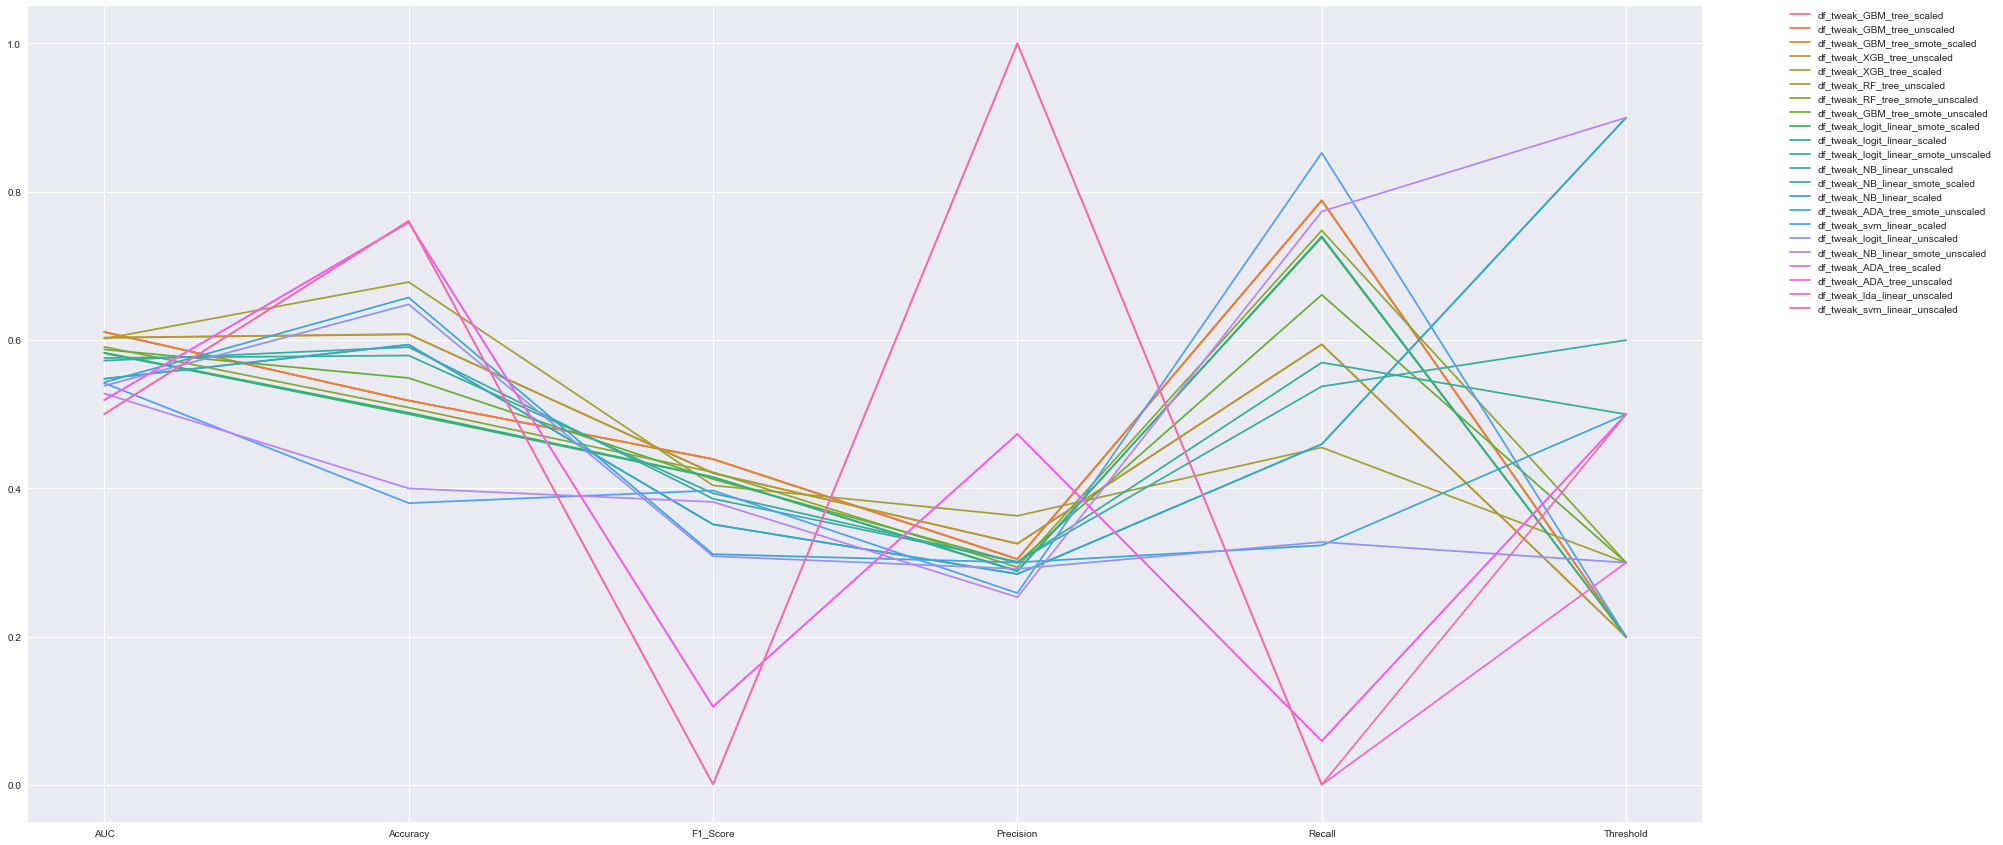

In [469]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_top_tweaks.T,dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Comparing Models with original 0.5 threshold

In [460]:
df_top_metrics=pd.DataFrame(columns=all_metrics_df_lst[0].T.columns)
df_top_metrics.drop(columns=['FPR','TPR'],inplace=True)
df_top_metrics['Model_Name']=""
for i in np.arange(0,len(all_metrics_df_lst)):
    temp_df=all_metrics_df_lst[i].T[1:2]
    temp_df.drop(columns=['FPR','TPR'],inplace=True)
    temp_df['Model_Name']=all_metrics_df_lst_str[i]
    df_top_metrics=pd.concat([df_top_metrics,temp_df],axis=0)
df_top_metrics=df_top_metrics.set_index("Model_Name")
df_top_metrics=df_top_metrics.sort_values(by='AUC',ascending=False)
#df_top_metrics.drop(columns=["Test/Train"],inplace=True)
df_top_metrics

Accuracy Precision     Recall  \
Model_Name                                                              
df_metrics_GBM_tree_unscaled            0.762298  0.550725  0.0422927   
df_metrics_GBM_tree_smote_scaled        0.762165  0.547445  0.0417362   
df_metrics_GBM_tree_scaled              0.762298  0.551471  0.0417362   
df_metrics_ADA_tree_scaled              0.758832  0.473451  0.0595437   
df_metrics_ADA_tree_unscaled            0.758832  0.473451  0.0595437   
df_metrics_RF_tree_unscaled             0.762298  0.549296  0.0434057   
df_metrics_XGB_tree_unscaled              0.7519  0.446488   0.148581   
df_metrics_XGB_tree_scaled              0.751633  0.444816   0.148024   
df_metrics_RF_tree_smote_unscaled        0.72857  0.362486   0.175292   
df_metrics_GBM_tree_smote_unscaled      0.726303  0.365828   0.194213   
df_metrics_logit_linear_scaled          0.761365  0.537634  0.0278242   
df_metrics_logit_linear_smote_scaled    0.761099  0.525773  0.0283806   
df_metrics_logit_linear_smote_unscaled  0.579256  0.300558   0.569839   
df_metrics_NB_linear_unscaled           0.546061  0.289859    0.61714   
df_metrics_ADA_tree_smote_unscaled      0.657512  0.300414   0.323317   
df_metrics_svm_linear_scaled            0.760432         0          0   
df_metrics_logit_linear_unscaled        0.760299  0.486486  0.0100167   
df_metrics_NB_linear_smote_scaled       0.511265   0.27045   0.612688   
df_metrics_NB_linear_scaled             0.511265   0.27045   0.612688   
df_metrics_lda_linear_unscaled          0.760432         0          0   
df_metrics_svm_linear_unscaled          0.760432         0          0   
df_metrics_NB_linear_smote_unscaled     0.364085  0.249621   0.824708   

                                               F1       AUC  
Model_Name                                                   
df_metrics_GBM_tree_unscaled             0.078553    0.6683  
df_metrics_GBM_tree_smote_scaled        0.0775595  0.668126  
df_metrics_GBM_tree_scaled              0.0775996  0.668028  
df_metrics_ADA_tree_scaled               0.105783  0.653594  
df_metrics_ADA_tree_unscaled             0.105783  0.653594  
df_metrics_RF_tree_unscaled             0.0804538  0.651252  
df_metrics_XGB_tree_unscaled             0.222965  0.642457  
df_metrics_XGB_tree_scaled               0.222129  0.642343  
df_metrics_RF_tree_smote_unscaled        0.236309  0.629299  
df_metrics_GBM_tree_smote_unscaled       0.253726  0.623447  
df_metrics_logit_linear_scaled          0.0529101  0.614036  
df_metrics_logit_linear_smote_scaled    0.0538543  0.613638  
df_metrics_logit_linear_smote_unscaled   0.393543  0.604523  
df_metrics_NB_linear_unscaled            0.394451  0.586783  
df_metrics_ADA_tree_smote_unscaled       0.311445  0.582059  
df_metrics_svm_linear_scaled                    0  0.580036  
df_metrics_logit_linear_unscaled        0.0196292  0.569646  
df_metrics_NB_linear_smote_scaled        0.375256  0.551299  
df_metrics_NB_linear_scaled              0.375256  0.551299  
df_metrics_lda_linear_unscaled                  0  0.551063  
df_metrics_svm_linear_unscaled                  0  0.551063  
df_metrics_NB_linear_smote_unscaled      0.383243  0.531791

In [463]:
df_top_metrics.Accuracy=df_top_metrics.Accuracy.astype(float)
df_top_metrics.Precision=df_top_metrics.Precision.astype(float)
df_top_metrics.Recall=df_top_metrics.Recall.astype(float)
df_top_metrics.F1=df_top_metrics.F1.astype(float)
df_top_metrics.AUC=df_top_metrics.AUC.astype(float)

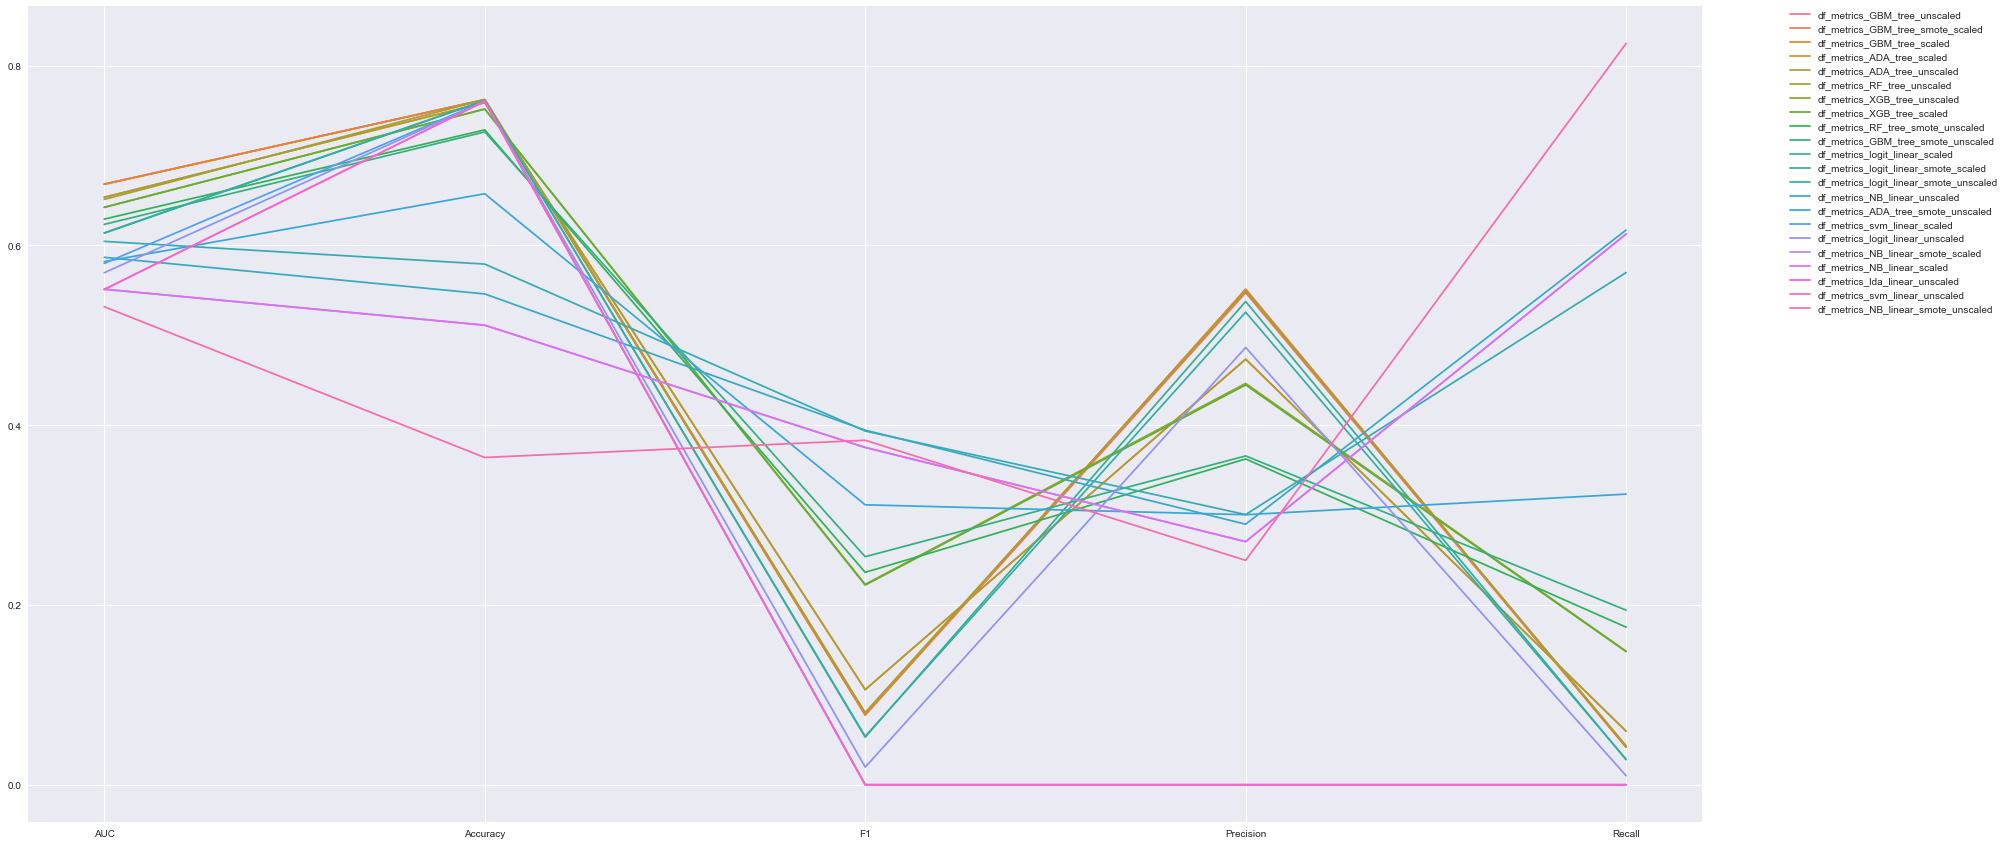

In [468]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df_top_metrics.T,dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# CLustering with SMOTE

In [182]:
df1=pd.concat([pd.DataFrame(X_train_linear_smote_sc,columns=X_Linear.columns),pd.DataFrame(X_test_linear_smote_sc,columns=X_Linear.columns)])
df1

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  drop_blk_Mean  \
0    -0.4436403    0.5278790 -0.6604534  0.1747020   0.8728582     -0.1914425   
1     1.2637997    1.2758577  0.8648062 -0.0948783  -0.7687128      1.3100134   
2    -0.4885558   -0.7182535 -0.6813272 -0.3119430  -0.5261296     -0.7041348   
3     0.0204866    0.2790515 -0.6218686 -0.4379806  -0.0161538      0.7607003   
4    -0.7359165   -0.7187521  0.0939534 -0.6025296   0.4056100     -0.5942721   
...         ...          ...        ...        ...         ...            ...   
7496  1.4896791    3.5197939 -0.6187059 -0.1158846  -0.4806453      2.5551231   
7497 -0.7886434    0.2785528 -0.6187059 -0.4869952  -0.3869200     -0.7407556   
7498 -0.7723696   -0.7187521 -0.6395797 -0.8686089   0.1078944     -0.4844095   
7499 -0.3375355    0.2790515 -0.5769584 -0.7320682  -0.1291755     -0.0815799   
7500  0.5490574    1.2758577 -0.6794295  0.7418710  -1.1243175     -0.1182007   

      drop_vce_Range  owylis_vce_Range  mou_opkv_Range     months  ...  \
0         -0.4404762        -0.3625425      -0.1493427 -1.0302368  ...   
1          0.4995034         0.4069990       0.5814697  1.3484136  ...   
2         -0.6284721        -0.3625425      -0.4003984  0.6996908  ...   
3          0.4995034        -0.0419002      -0.4050522  0.5915703  ...   
4          0.4995034        -0.5549279      -0.5071033  0.1590884  ...   
...              ...               ...             ...        ...  ...   
7496       2.5674586         0.0222283       0.1692762 -0.7058754  ...   
7497      -0.6284721        -0.1060286      -0.4062157  0.3753293  ...   
7498      -0.4404762        -0.0419002      -0.6329221  1.9971364  ...   
7499      -0.2524802        -0.5549279      -0.5170758  0.6996908  ...   
7500      -0.4404762        -0.2342856       0.8498109 -0.0571525  ...   

      csa__PHXPHX602  csa__SANAUS512  csa__SANMCA210  csa__SANSAN210  \
0         -0.0945787      -0.1150737      -0.0938693      -0.1171074   
1         -0.0945787      -0.1150737      -0.0938693      -0.1171074   
2         -0.0945787      -0.1150737      -0.0938693      -0.1171074   
3         -0.0945787      -0.1150737      -0.0938693      -0.1171074   
4         -0.0945787      -0.1150737      -0.0938693      -0.1171074   
...              ...             ...             ...             ...   
7496      -0.0945787      -0.1150737      -0.0938693      -0.1171074   
7497      -0.0945787      -0.1150737      -0.0938693      -0.1171074   
7498      -0.0945787      -0.1150737      -0.0938693      -0.1171074   
7499      -0.0945787      -0.1150737      -0.0938693      -0.1171074   
7500      -0.0945787      -0.1150737      -0.0938693      -0.1171074   

      csa__SEASEA206  csa__SFROAK510  csa__SFRSCL408  csa__SFRSFR415  \
0         -0.0731297      -0.1040216      -0.1000796      -0.1068867   
1         -0.0731297      -0.1040216      -0.1000796      -0.1068867   
2         -0.0731297      -0.1040216      -0.1000796      -0.1068867   
3         -0.0731297      -0.1040216      -0.1000796      -0.1068867   
4         -0.0731297      -0.1040216      -0.1000796      -0.1068867   
...              ...             ...             ...             ...   
7496      -0.0731297      -0.1040216      -0.1000796      -0.1068867   
7497      -0.0731297      -0.1040216      -0.1000796      -0.1068867   
7498      -0.0731297      -0.1040216      -0.1000796      -0.1068867   
7499      -0.0731297      -0.1040216      -0.1000796      -0.1068867   
7500      -0.0731297      -0.1040216      -0.1000796      -0.1068867   

      csa__SFRSMO650  csa__STLSTL314  
0         -0.0703551      -0.1059399  
1         -0.0703551      -0.1059399  
2         -0.0703551      -0.1059399  
3         -0.0703551       9.4393110  
4         -0.0703551      -0.1059399  
...              ...             ...  
7496      -0.0703551      -0.1059399  
7497      -0.0703551      -0.1059399  
7498      -0.0703551      -0.1059399  
7499      -0.0703551     

In [183]:
df2=pd.concat([pd.DataFrame(y_train_linear_smote_sc),pd.DataFrame(y_test_linear_smote_sc)])
df2.index=df1.index
df2

churn
0         1
1         0
2         0
3         0
4         0
...     ...
7496      1
7497      0
7498      1
7499      0
7500      0

[22728 rows x 1 columns]

In [184]:
df3=pd.concat([df1,df2],axis=1)
df3

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  drop_blk_Mean  \
0    -0.4436403    0.5278790 -0.6604534  0.1747020   0.8728582     -0.1914425   
1     1.2637997    1.2758577  0.8648062 -0.0948783  -0.7687128      1.3100134   
2    -0.4885558   -0.7182535 -0.6813272 -0.3119430  -0.5261296     -0.7041348   
3     0.0204866    0.2790515 -0.6218686 -0.4379806  -0.0161538      0.7607003   
4    -0.7359165   -0.7187521  0.0939534 -0.6025296   0.4056100     -0.5942721   
...         ...          ...        ...        ...         ...            ...   
7496  1.4896791    3.5197939 -0.6187059 -0.1158846  -0.4806453      2.5551231   
7497 -0.7886434    0.2785528 -0.6187059 -0.4869952  -0.3869200     -0.7407556   
7498 -0.7723696   -0.7187521 -0.6395797 -0.8686089   0.1078944     -0.4844095   
7499 -0.3375355    0.2790515 -0.5769584 -0.7320682  -0.1291755     -0.0815799   
7500  0.5490574    1.2758577 -0.6794295  0.7418710  -1.1243175     -0.1182007   

      drop_vce_Range  owylis_vce_Range  mou_opkv_Range     months  ...  \
0         -0.4404762        -0.3625425      -0.1493427 -1.0302368  ...   
1          0.4995034         0.4069990       0.5814697  1.3484136  ...   
2         -0.6284721        -0.3625425      -0.4003984  0.6996908  ...   
3          0.4995034        -0.0419002      -0.4050522  0.5915703  ...   
4          0.4995034        -0.5549279      -0.5071033  0.1590884  ...   
...              ...               ...             ...        ...  ...   
7496       2.5674586         0.0222283       0.1692762 -0.7058754  ...   
7497      -0.6284721        -0.1060286      -0.4062157  0.3753293  ...   
7498      -0.4404762        -0.0419002      -0.6329221  1.9971364  ...   
7499      -0.2524802        -0.5549279      -0.5170758  0.6996908  ...   
7500      -0.4404762        -0.2342856       0.8498109 -0.0571525  ...   

      csa__SANAUS512  csa__SANMCA210  csa__SANSAN210  csa__SEASEA206  \
0         -0.1150737      -0.0938693      -0.1171074      -0.0731297   
1         -0.1150737      -0.0938693      -0.1171074      -0.0731297   
2         -0.1150737      -0.0938693      -0.1171074      -0.0731297   
3         -0.1150737      -0.0938693      -0.1171074      -0.0731297   
4         -0.1150737      -0.0938693      -0.1171074      -0.0731297   
...              ...             ...             ...             ...   
7496      -0.1150737      -0.0938693      -0.1171074      -0.0731297   
7497      -0.1150737      -0.0938693      -0.1171074      -0.0731297   
7498      -0.1150737      -0.0938693      -0.1171074      -0.0731297   
7499      -0.1150737      -0.0938693      -0.1171074      -0.0731297   
7500      -0.1150737      -0.0938693      -0.1171074      -0.0731297   

      csa__SFROAK510  csa__SFRSCL408  csa__SFRSFR415  csa__SFRSMO650  \
0         -0.1040216      -0.1000796      -0.1068867      -0.0703551   
1         -0.1040216      -0.1000796      -0.1068867      -0.0703551   
2         -0.1040216      -0.1000796      -0.1068867      -0.0703551   
3         -0.1040216      -0.1000796      -0.1068867      -0.0703551   
4         -0.1040216      -0.1000796      -0.1068867      -0.0703551   
...              ...             ...             ...             ...   
7496      -0.1040216      -0.1000796      -0.1068867      -0.0703551   
7497      -0.1040216      -0.1000796      -0.1068867      -0.0703551   
7498      -0.1040216      -0.1000796      -0.1068867      -0.0703551   
7499      -0.1040216      -0.1000796      -0.1068867      -0.0703551   
7500      -0.1040216      -0.1000796      -0.1068867      -0.0703551   

      csa__STLSTL314  churn  
0         -0.1059399      1  
1         -0.1059399      0  
2         -0.1059399      0  
3          9.4393110      0  
4         -0.1059399      0  
...              ...    ...  
7496      -0.1059399      1  
7497      -0.1059399      0  
7498      -0.1059399      1  
7499      -0.1059399      0  
7500      -0.1059399      0  

[22728 rows x 177 columns]

In [185]:
from sklearn.cluster import KMeans 
wss=[]
for i in range(1,7):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df3)
    wss.append(KM.inertia_)

In [186]:
wss

[4005955.6025809557,
 3757921.4502728437,
 3691721.338747134,
 3643390.7245800137,
 3603728.8661925676,
 3557961.301920663]

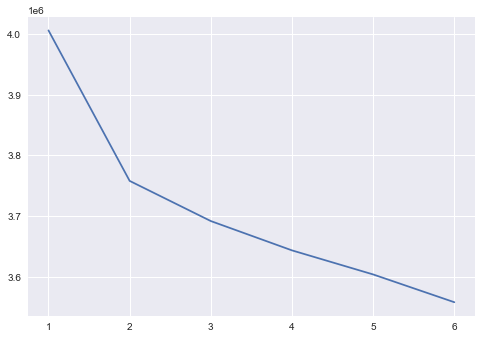

In [187]:
plt.plot(range(1,7), wss)

In [188]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil_score_list=[]
for i in range(2,7):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df3)
    sil_score = silhouette_score(df3,KM.labels_)
    sil_score_list.append(round(sil_score,4))

In [189]:
sil_score_list

[0.1052, 0.0316, 0.0313, 0.0086, 0.0259]

For n_clusters = 2 The average silhouette_score is : 0.10522421426433341
For n_clusters = 3 The average silhouette_score is : 0.03228285948752958
For n_clusters = 4 The average silhouette_score is : 0.017674037026096205
For n_clusters = 5 The average silhouette_score is : 0.005028696550709604
For n_clusters = 6 The average silhouette_score is : 0.019770057219719604


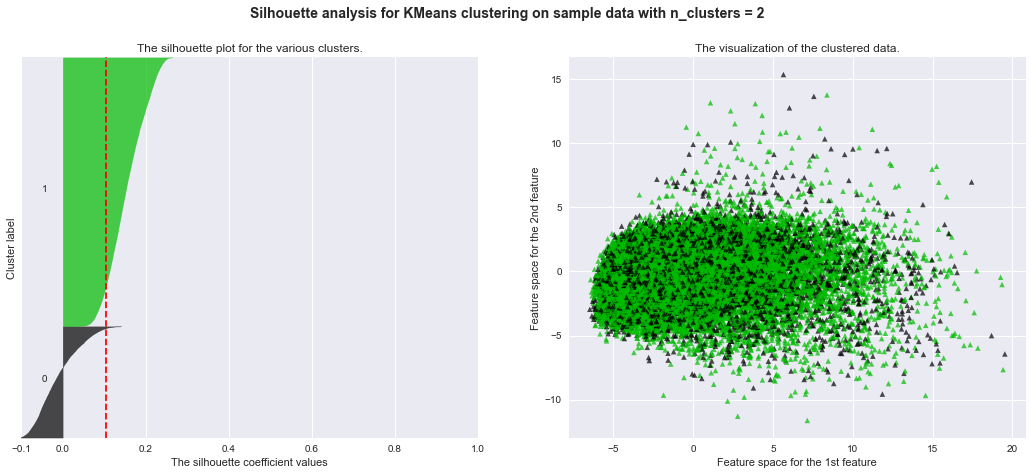

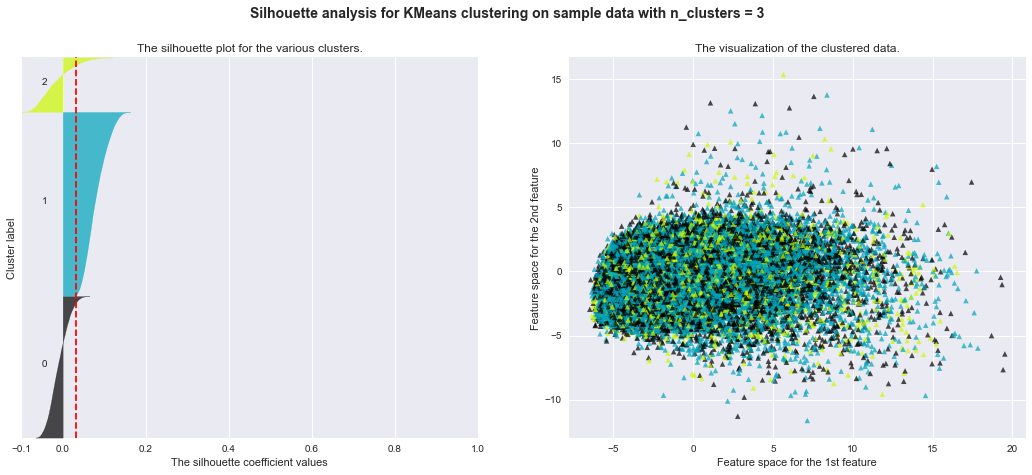

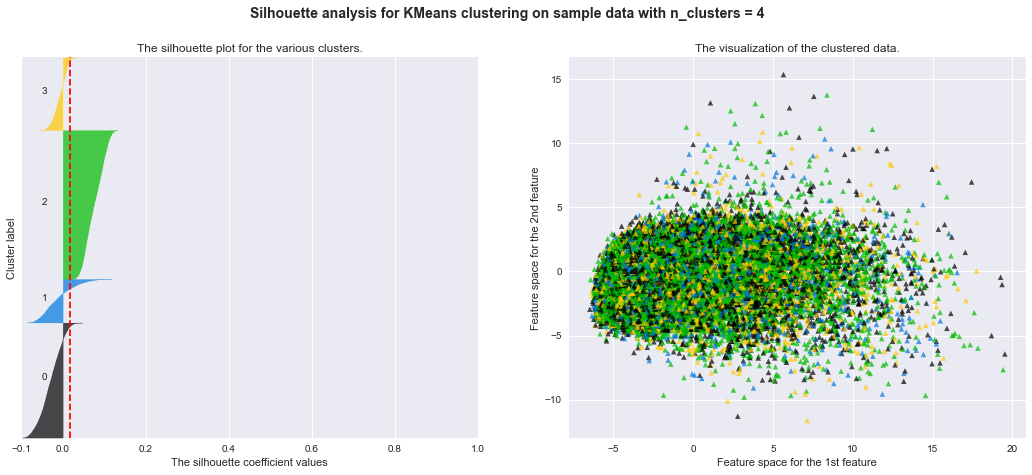

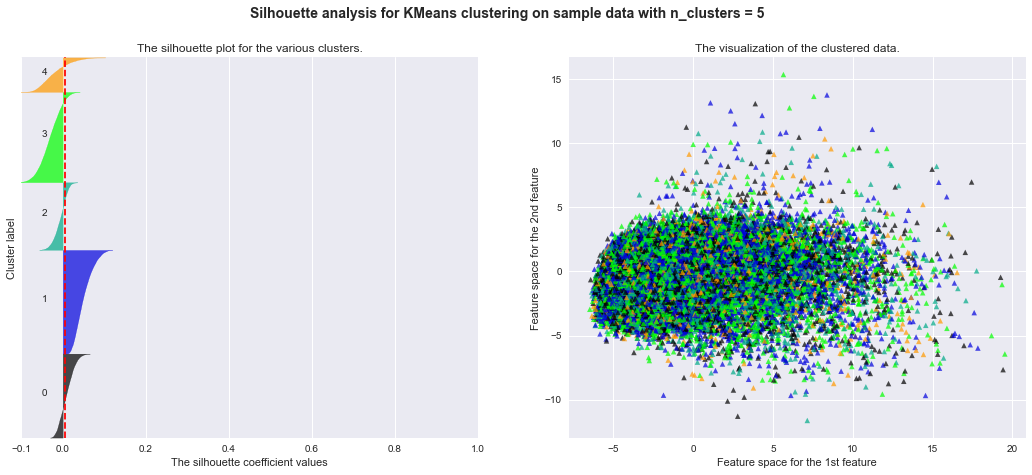

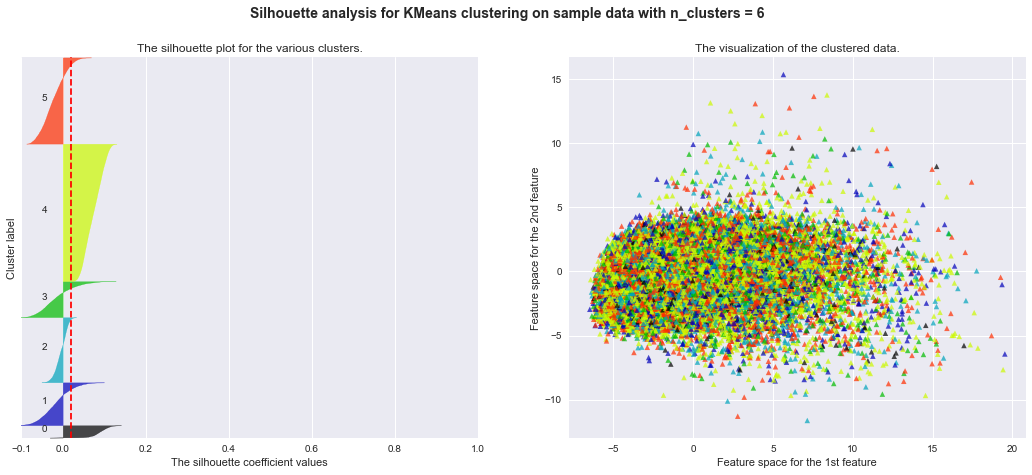

In [190]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df3) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df3)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df3, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        #Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    ax2.scatter(pca_2d[:,0],pca_2d[:,1],marker='^', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [191]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df3)
labels = k_means.labels_

In [192]:
new=X_Linear.columns.to_list()
new.append('Churn')
new

['mou_Mean',
 'totmrc_Mean',
 'rev_Range',
 'mou_Range',
 'change_mou',
 'drop_blk_Mean',
 'drop_vce_Range',
 'owylis_vce_Range',
 'mou_opkv_Range',
 'months',
 'totcalls',
 'eqpdays',
 'custcare_Mean',
 'callwait_Mean',
 'iwylis_vce_Mean',
 'callwait_Range',
 'ccrndmou_Range',
 'adjqty',
 'ovrrev_Mean',
 'rev_Mean',
 'ovrmou_Mean',
 'comp_vce_Mean',
 'plcd_vce_Mean',
 'avg3mou',
 'avgmou',
 'avg3qty',
 'avgqty',
 'avg6mou',
 'avg6qty',
 'opk_dat_Mean',
 'roam_Mean',
 'recv_sms_Mean',
 'blck_dat_Mean',
 'mou_pead_Mean',
 'da_Mean',
 'da_Range',
 'datovr_Mean',
 'datovr_Range',
 'drop_dat_Mean',
 'drop_vce_Mean',
 'adjmou',
 'totrev',
 'adjrev',
 'avgrev',
 'comp_dat_Mean',
 'plcd_dat_Mean',
 'income',
 'asl_flag',
 'refurb_new',
 'age1',
 'age2',
 'models',
 'hnd_price',
 'actvsubs',
 'uniqsubs',
 'forgntvl',
 'mtrcycle',
 'truck',
 'car_buy',
 'crclscod__A',
 'crclscod__A2',
 'crclscod__AA',
 'crclscod__B',
 'crclscod__BA',
 'crclscod__C',
 'crclscod__CA',
 'crclscod__DA',
 'crclscod_

In [193]:
df3=pd.DataFrame(df3,columns=new)

In [194]:
df3['kmeans_clus']=labels

In [195]:
clust_profile=df3
clust_profile_kmeans=clust_profile.groupby('kmeans_clus').mean()
clust_profile_kmeans

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  \
kmeans_clus                                                             
0            0.5879222    0.5145049  0.5283857  0.5051338  -0.0059805   
1           -0.6878212   -0.4633201 -0.4255284 -0.5576237   0.0569170   
2            1.6673151    0.9127163  0.8821645  1.1416135  -0.2091368   
3            0.2036895    0.2066175  0.1715871  0.2561621   0.0288189   

             drop_blk_Mean  drop_vce_Range  owylis_vce_Range  mou_opkv_Range  \
kmeans_clus                                                                    
0                0.4790102       0.4654851         0.4733669       0.3611559   
1               -0.5093906      -0.4198984        -0.4486355      -0.4471382   
2                1.2043719       0.8416652         0.9600726       0.9261151   
3                0.1494242       0.1844381         0.1804888       0.1916580   

                months  ...  csa__SANAUS512  csa__SANMCA210  csa__SANSAN210  \
kmeans_clus             ...                                                   
0           -0.1927322  ...      -0.0032621      -0.0597519      -0.1171074   
1            0.0734190  ...       0.0085532      -0.0313292      -0.0043662   
2            0.0945542  ...      -0.0071011       0.1071011       0.0368057   
3           -0.1332849  ...      -0.0156520       0.0081140      -0.0100086   

             csa__SEASEA206  csa__SFROAK510  csa__SFRSCL408  csa__SFRSFR415  \
kmeans_clus                                                                   
0                 0.1014414      -0.0114749       0.0601130       0.0433130   
1                 0.0017919      -0.0097737      -0.0012651      -0.0308434   
2                 0.0195878      -0.0086945       0.0267682       0.0642636   
3                 0.0044837       0.0010314      -0.0140086       0.0067779   

             csa__SFRSMO650  csa__STLSTL314  Churn  
kmeans_clus                                         
0                 0.1563745      -0.0756376    nan  
1                -0.0017456      -0.0018997    nan  
2                -0.0221872      -0.0152279    nan  
3                -0.0051550      -0.0119206    nan  

[4 rows x 177 columns]

In [196]:
clust_profile_kmeans['eqpdays']

kmeans_clus
0   -0.5568279
1    0.3419215
2   -0.4147058
3   -0.2644830
Name: eqpdays, dtype: float64

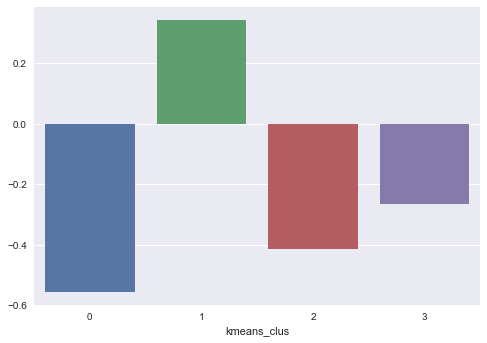

In [197]:
sns.barplot(x=clust_profile_kmeans['eqpdays'].index,y=clust_profile_kmeans['eqpdays'].values)

In [199]:
clust_profile_kmeans['mou_Mean']

kmeans_clus
0    0.5879222
1   -0.6878212
2    1.6673151
3    0.2036895
Name: mou_Mean, dtype: float64

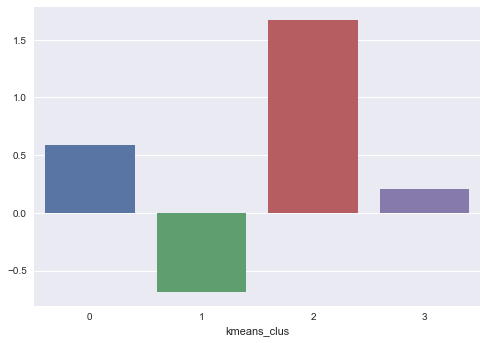

In [200]:
sns.barplot(x=clust_profile_kmeans['mou_Mean'].index,y=clust_profile_kmeans['mou_Mean'].values)

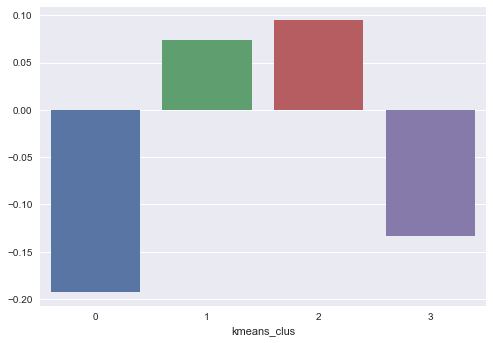

In [201]:
sns.barplot(x=clust_profile_kmeans['months'].index,y=clust_profile_kmeans['months'].values)

# Clustering

In [565]:
sc=StandardScaler()
df_Linear_sc=sc.fit_transform(df_Linear)

In [13]:
pca = PCA(n_components=2).fit(df_Linear_sc)
pca_2d = pca.transform(df_Linear_sc)

In [14]:
from sklearn.cluster import KMeans 
wss=[]
for i in range(1,7):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df_Linear_sc)
    wss.append(KM.inertia_)

In [15]:
wss

[4022855.999999996,
 3773285.51519882,
 3706784.1383139547,
 3642255.119889747,
 3603408.7138673803,
 3578566.682192556]

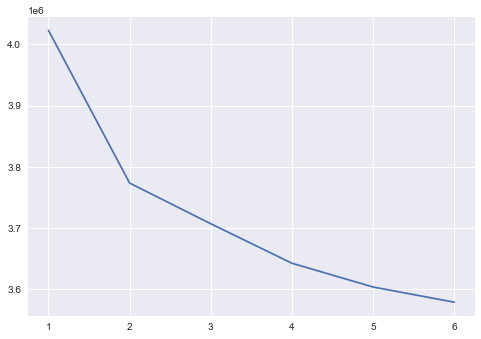

In [16]:
plt.plot(range(1,7), wss)

In [17]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil_score_list=[]
for i in range(2,7):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_Linear_sc)
    sil_score = silhouette_score(df_Linear_sc,KM.labels_)
    sil_score_list.append(round(sil_score,4))

In [18]:
sil_score_list

[0.106, 0.0327, 0.0221, 0.0211, 0.0217]

For n_clusters = 2 The average silhouette_score is : 0.10597881606454358
For n_clusters = 3 The average silhouette_score is : 0.0327066989584968
For n_clusters = 4 The average silhouette_score is : 0.033219032116542084
For n_clusters = 5 The average silhouette_score is : 0.020583715084196406
For n_clusters = 6 The average silhouette_score is : 0.022804775288251547


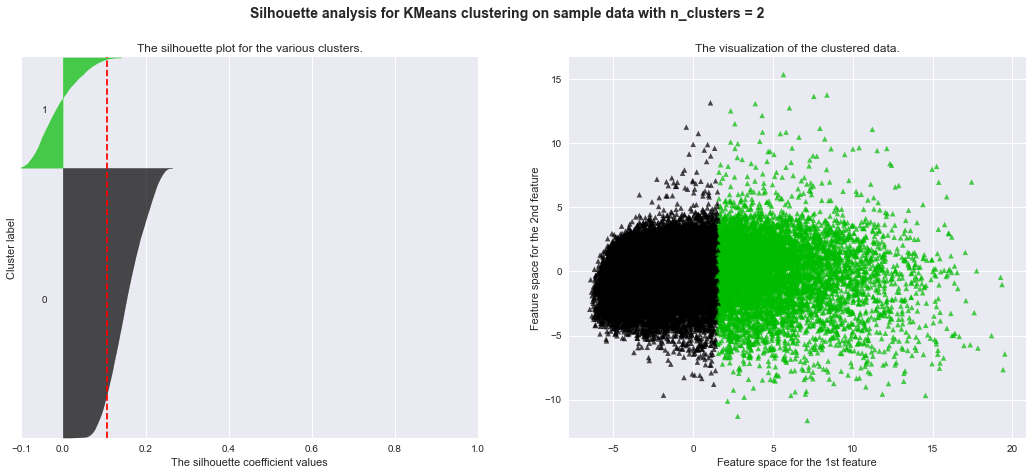

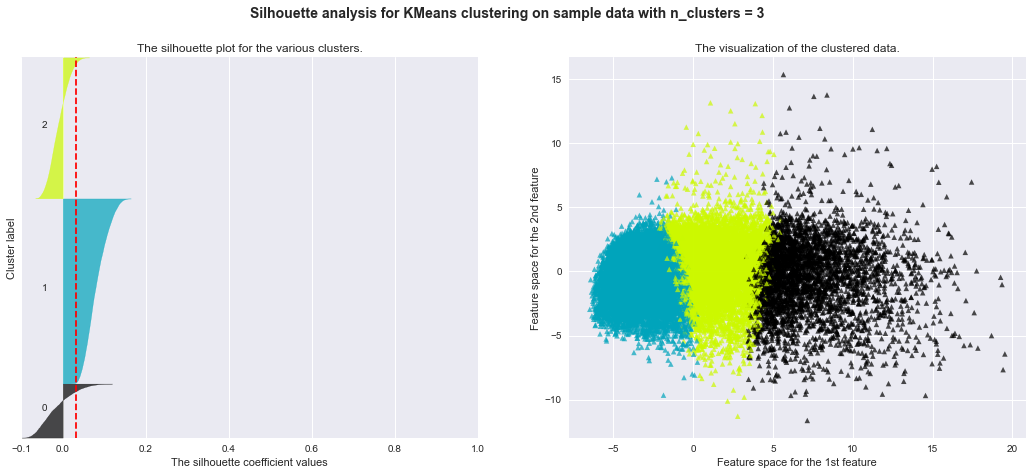

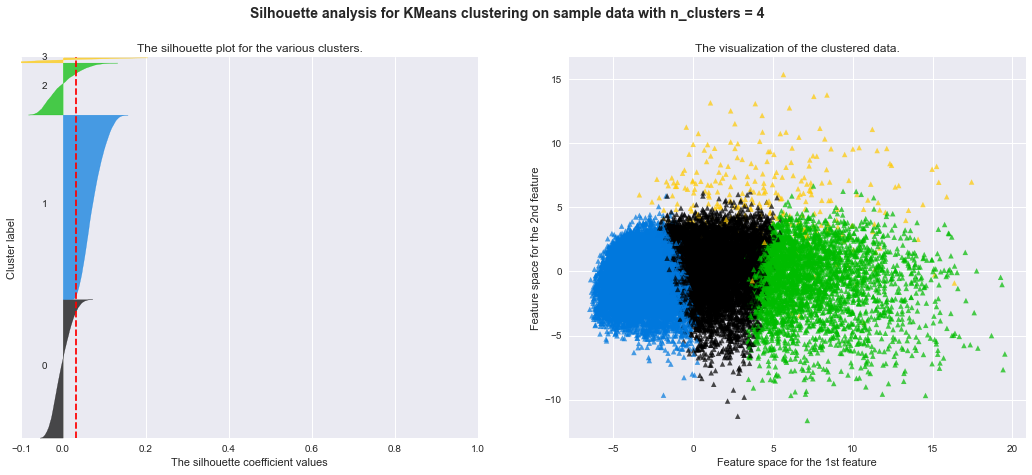

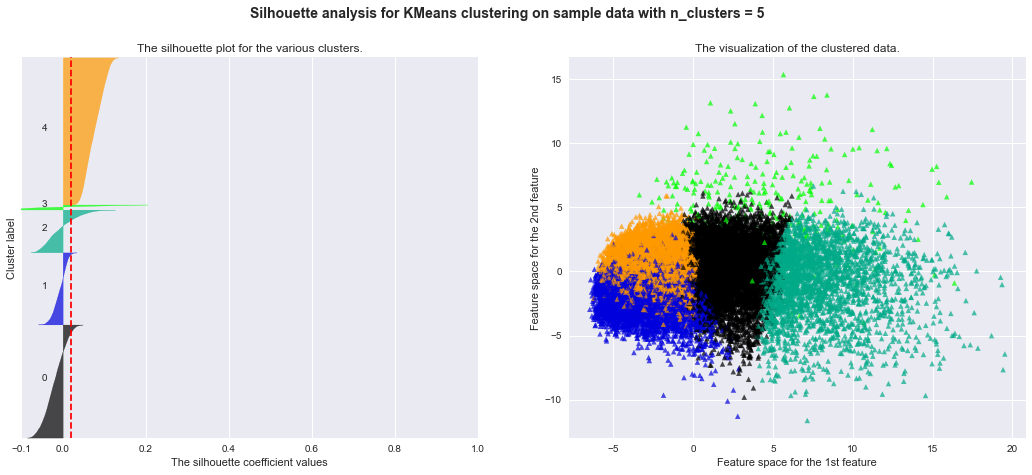

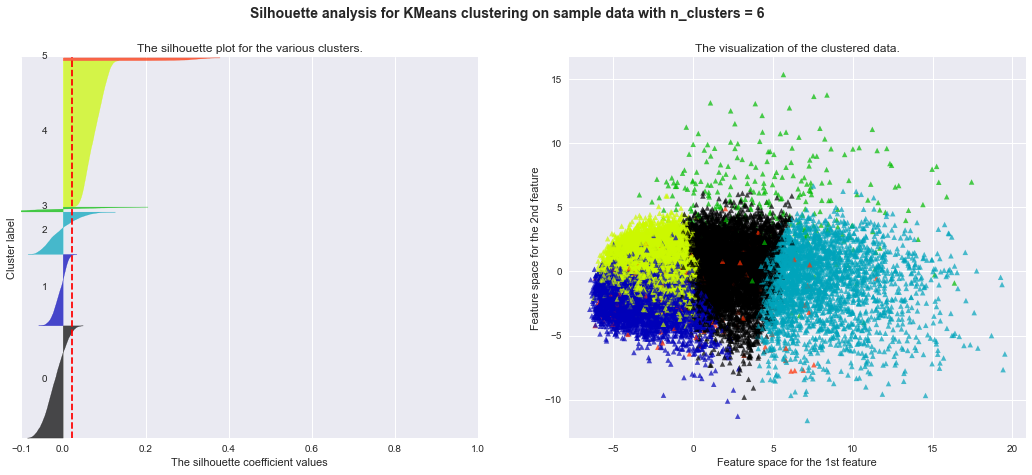

In [19]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_Linear_sc) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_Linear_sc)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_Linear_sc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_Linear_sc, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        #Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    ax2.scatter(pca_2d[:,0],pca_2d[:,1],marker='^', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [39]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_Linear_sc)
labels = k_means.labels_

NameError: name 'KMeans' is not defined

In [21]:
new=X_Linear.columns.to_list()
new.append('Churn')
new

['mou_Mean',
 'totmrc_Mean',
 'rev_Range',
 'mou_Range',
 'change_mou',
 'drop_blk_Mean',
 'drop_vce_Range',
 'owylis_vce_Range',
 'mou_opkv_Range',
 'months',
 'totcalls',
 'eqpdays',
 'custcare_Mean',
 'callwait_Mean',
 'iwylis_vce_Mean',
 'callwait_Range',
 'ccrndmou_Range',
 'adjqty',
 'ovrrev_Mean',
 'rev_Mean',
 'ovrmou_Mean',
 'comp_vce_Mean',
 'plcd_vce_Mean',
 'avg3mou',
 'avgmou',
 'avg3qty',
 'avgqty',
 'avg6mou',
 'avg6qty',
 'opk_dat_Mean',
 'roam_Mean',
 'recv_sms_Mean',
 'blck_dat_Mean',
 'mou_pead_Mean',
 'da_Mean',
 'da_Range',
 'datovr_Mean',
 'datovr_Range',
 'drop_dat_Mean',
 'drop_vce_Mean',
 'adjmou',
 'totrev',
 'adjrev',
 'avgrev',
 'comp_dat_Mean',
 'plcd_dat_Mean',
 'income',
 'asl_flag',
 'refurb_new',
 'age1',
 'age2',
 'models',
 'hnd_price',
 'actvsubs',
 'uniqsubs',
 'forgntvl',
 'mtrcycle',
 'truck',
 'car_buy',
 'crclscod__A',
 'crclscod__A2',
 'crclscod__AA',
 'crclscod__B',
 'crclscod__BA',
 'crclscod__C',
 'crclscod__CA',
 'crclscod__DA',
 'crclscod_

In [22]:
df_Linear_sc=pd.DataFrame(df_Linear_sc,columns=new)

In [23]:
df_Linear_sc['kmeans_clus']=labels

In [30]:
df_Linear['kmeans_clus']=labels

In [24]:
clust_profile=df_Linear_sc
clust_profile_kmeans=clust_profile.groupby('kmeans_clus').mean()
clust_profile_kmeans

mou_Mean  totmrc_Mean  rev_Range  mou_Range  change_mou  \
kmeans_clus                                                            
0           -0.706247    -0.499828  -0.440138  -0.580773    0.049378   
1            0.084829     0.098761   0.124341   0.198969    0.037454   
2            1.802938     0.916181   0.993910   1.254910   -0.235973   
3            0.314689     0.460167   0.155764   0.179792   -0.018555   

             drop_blk_Mean  drop_vce_Range  owylis_vce_Range  mou_opkv_Range  \
kmeans_clus                                                                    
0                -0.514163       -0.427896         -0.463529       -0.460723   
1                 0.086046        0.136379          0.129637        0.175148   
2                 1.356323        0.965626          1.075373        1.091527   
3                 0.136733        0.118073          0.141263        0.018735   

               months  ...  csa__SANAUS512  csa__SANMCA210  csa__SANSAN210  \
kmeans_clus            ...                                                   
0            0.112729  ...        0.001883        0.010499       -0.037820   
1           -0.549267  ...       -0.039356       -0.035096       -0.034830   
2           -0.200559  ...       -0.006657       -0.017615        0.070790   
3            1.044745  ...        0.086501        0.061180        0.126138   

             csa__SEASEA206  csa__SFROAK510  csa__SFRSCL408  csa__SFRSFR415  \
kmeans_clus                                                                   
0                 -0.001587        0.001593       -0.011734       -0.003514   
1                 -0.047709       -0.009030        0.012607       -0.011498   
2                  0.017613        0.033427       -0.003802        0.031023   
3                  0.093447       -0.014936        0.010943        0.007916   

             csa__SFRSMO650  csa__STLSTL314     Churn  
kmeans_clus                                            
0                 -0.028041        0.003300  0.007102  
1                 -0.019910       -0.024602 -0.015215  
2                  0.054083       -0.037822 -0.001201  
3                  0.079143        0.077862  0.013120  

[4 rows x 177 columns]

In [31]:
clust_profile=df_Linear
clust_profile_kmeans=clust_profile.groupby('kmeans_clus').mean()
clust_profile_kmeans

mou_Mean  totmrc_Mean  rev_Range   mou_Range  change_mou  \
kmeans_clus                                                                
0             158.196844    34.273057  12.305260  136.182442    2.702313   
1             460.957343    46.240312  38.876933  358.584151    0.553113   
2            1118.512290    62.582508  79.810083  659.764870  -48.727246   
3             548.929699    53.465687  40.356118  353.114330   -9.541537   

             drop_blk_Mean  drop_vce_Range  owylis_vce_Range  mou_opkv_Range  \
kmeans_clus                                                                    
0                 3.007420        2.052007          5.410131       36.168144   
1                 8.445630        5.036705         14.614597      112.115436   
2                19.955014        9.422957         29.290087      221.566163   
3                 8.904881        4.939875         14.795016       93.433754   

                months  ...  csa__PHXPHX602  csa__SANAUS512  csa__SANMCA210  \
kmeans_clus             ...                                                   
0            19.539110  ...        0.009153        0.013938        0.005409   
1            13.444729  ...        0.005264        0.008821        0.005691   
2            16.654957  ...        0.008348        0.010783        0.015652   
3            28.119315  ...        0.017134        0.019626        0.020872   

             csa__SANSAN210  csa__SEASEA206  csa__SFROAK510  csa__SFRSCL408  \
kmeans_clus                                                                   
0                  0.013106        0.005929        0.008945        0.009465   
1                  0.007825        0.005122        0.011381        0.008678   
2                  0.015304        0.008348        0.009739        0.012870   
3                  0.023988        0.004673        0.011215        0.010592   

             csa__SFRSFR415  csa__SFRSMO650  csa__STLSTL314  
kmeans_clus                                                  
0                  0.008113        0.004889        0.010922  
1                  0.008963        0.002988        0.008678  
2                  0.016696        0.002087        0.010087  
3                  0.019315        0.009969        0.011526  

[4 rows x 177 columns]

In [33]:
clust_profile_kmeans['eqpdays']

kmeans_clus
0    487.747556
1    296.109546
2    262.410435
3    426.557632
Name: eqpdays, dtype: float64

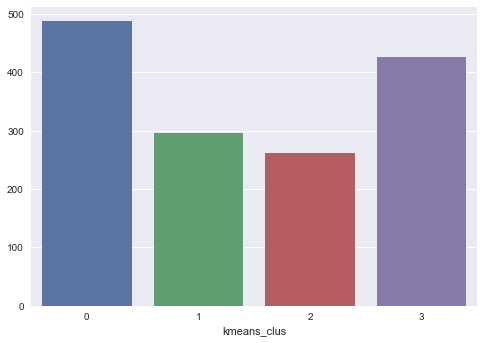

In [145]:
sns.barplot(x=clust_profile_kmeans['eqpdays'].index,y=clust_profile_kmeans['eqpdays'].values,)

In [35]:
clust_profile_kmeans['mou_Mean']

kmeans_clus
0     158.196844
1     460.957343
2    1118.512290
3     548.929699
Name: mou_Mean, dtype: float64

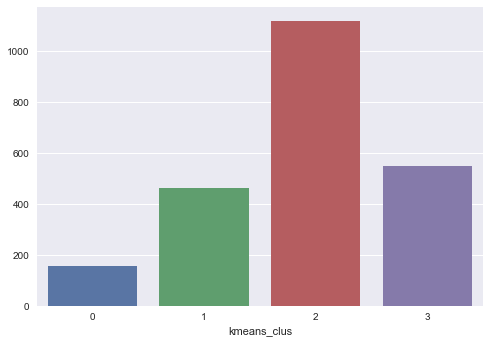

In [146]:
sns.barplot(x=clust_profile_kmeans['mou_Mean'].index,y=clust_profile_kmeans['mou_Mean'].values)

In [36]:
clust_profile_kmeans['months']

kmeans_clus
0    19.539110
1    13.444729
2    16.654957
3    28.119315
Name: months, dtype: float64

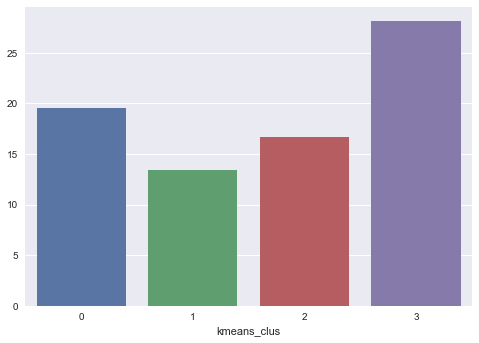

In [147]:
sns.barplot(x=clust_profile_kmeans['months'].index,y=clust_profile_kmeans['months'].values)

In [37]:
clust_profile_kmeans['change_mou']

kmeans_clus
0     2.702313
1     0.553113
2   -48.727246
3    -9.541537
Name: change_mou, dtype: float64

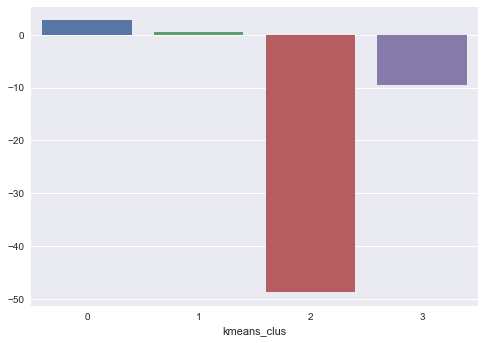

In [148]:
sns.barplot(x=clust_profile_kmeans['change_mou'].index,y=clust_profile_kmeans['change_mou'].values)

In [72]:
clust_profile_kmeans['age1']

kmeans_clus
0    13.280424
1     6.381278
2     7.253217
3    10.731776
Name: age1, dtype: float64

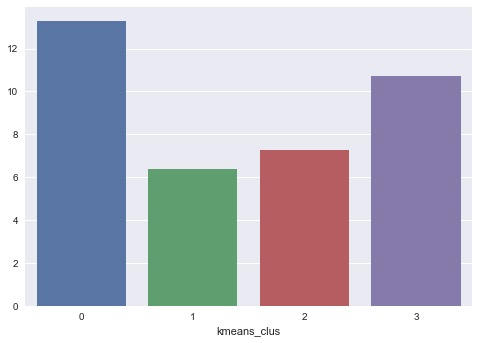

In [149]:
sns.barplot(x=clust_profile_kmeans['age1'].index,y=clust_profile_kmeans['age1'].values)

In [38]:
clust_profile_kmeans['avgqty']

NameError: name 'clust_profile_kmeans' is not defined

In [37]:
sns.barplot(x=clust_profile_kmeans['avgrev'].index,y=clust_profile_kmeans['avgrev'].values)

NameError: name 'clust_profile_kmeans' is not defined

In [150]:
clust_profile_kmeans['avgmou']

kmeans_clus
0   169.5810401
1   457.3689273
2   967.8201530
3   524.7358131
Name: avgmou, dtype: float64

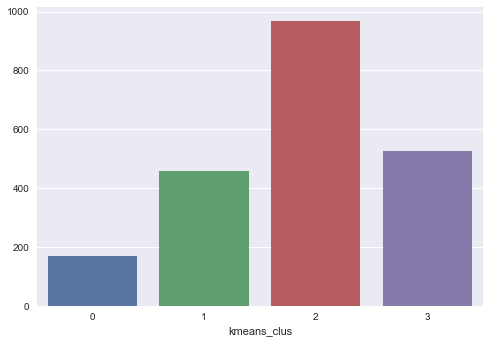

In [151]:
sns.barplot(x=clust_profile_kmeans['avgmou'].index,y=clust_profile_kmeans['avgmou'].values)

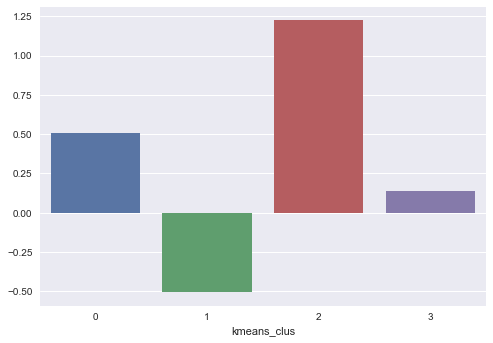

In [207]:
sns.barplot(x=clust_profile_kmeans['drop_vce_Mean'].index,y=clust_profile_kmeans['drop_vce_Mean'].values)

In [152]:
clust_profile_kmeans['churn']

kmeans_clus
0   0.2488038
1   0.2347418
2   0.2177391
3   0.2423676
Name: churn, dtype: float64

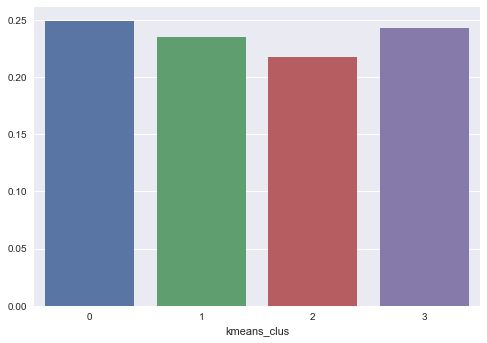

In [153]:
sns.barplot(x=clust_profile_kmeans['churn'].index,y=clust_profile_kmeans['churn'].values)